In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
sns.set_style('darkgrid')

pd.options.display.max_rows = 999

## **Approach and Analysis**
*****
<a href='#I'>**I. Application Dataset: Data cleaning and preparation**</a>
1. Importing the application dataset and understanding
2. Identifying duplicates, nan values, invalid values and treating them
3. Data Imbalance calculation
4. Top 10 correlation for target variable and Understanding the data and Removal of correlated numerical variables
5. Conversion of binary and discrete numerical to categorical variables

<a href='#II'>**II. Application Dataset: Univariate, segmented univariate for categorical columns to identify important categorical variables**</a>
1. Creation of functions for the plot for univariate and segmented univariate analysis
2. Filtering categorical columns based on default rates of features in the categorical column
3. Analysis on each column and inferences from each categorical column

<a href='#III'>**III. Application Dataset: Univariate, segmented univariate for numerical columns to identify important numerical variables**</a>
1. Deriving New columns from the existing dataset
2. Outliers Identification, removal and Creation of function for univariate and segmented univariate analysis
3. Analysis on each column and inferences from each numerical column

<a href='#IV'>**IV. Analyzing previous previous application dataset for important variables**</a> 
1. Importing the dataset - application and understanding
2. Identifying duplicates, nan values, invalid values and treating them
3. Univariate analysis for categorical and numerical variables
5. deriving new variables from the previous application and utilizing them to analyze default rates

<a href='#V'>**V. Statistical evidence using Random Forest Classifier**</a>

<a href='#VI'>**VI Conclusion: Top Numerical and Categorical columns that can impact default rates**</a>
*****

### I. Data Preparation and Cleaning<a id='I'></a>
**Step no. 1: Importing Application Dataset and Understanding**
1. **Please place the dataset in the same location of this file. Else update path of the file**

In [2]:
# importing application data
df_app = pd.read_csv('application_data.csv')

# inspecting the data frame
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# total no of rows and columns of data set
print(df_app.shape)

(307511, 122)


In [4]:
# inspecting structure of the dataset
df_app.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

**Step. no 2: Identifying duplicates, nan values, invalid values and treating invalid values**

In [5]:
# nan % in columns
nan_per = (df_app.isnull().sum()/len(df_app)*100).sort_values(ascending = False)
nan_per = round(nan_per[nan_per >0],4)
print('no. of nan columns is {}'.format(len(nan_per)))
nan_per

# we have 67 columns which have nan values

no. of nan columns is 67


COMMONAREA_MEDI                 69.8723
COMMONAREA_AVG                  69.8723
COMMONAREA_MODE                 69.8723
NONLIVINGAPARTMENTS_MODE        69.4330
NONLIVINGAPARTMENTS_MEDI        69.4330
NONLIVINGAPARTMENTS_AVG         69.4330
FONDKAPREMONT_MODE              68.3862
LIVINGAPARTMENTS_MEDI           68.3550
LIVINGAPARTMENTS_MODE           68.3550
LIVINGAPARTMENTS_AVG            68.3550
FLOORSMIN_MEDI                  67.8486
FLOORSMIN_MODE                  67.8486
FLOORSMIN_AVG                   67.8486
YEARS_BUILD_MEDI                66.4978
YEARS_BUILD_AVG                 66.4978
YEARS_BUILD_MODE                66.4978
OWN_CAR_AGE                     65.9908
LANDAREA_MODE                   59.3767
LANDAREA_AVG                    59.3767
LANDAREA_MEDI                   59.3767
BASEMENTAREA_MEDI               58.5160
BASEMENTAREA_AVG                58.5160
BASEMENTAREA_MODE               58.5160
EXT_SOURCE_1                    56.3811
NONLIVINGAREA_MEDI              55.1792


In [6]:
# nan % in rows
nan_per_row = (df_app.isnull().sum(axis = 1)/len(df_app.columns)*100).sort_values(ascending = False)
nan_per_row = round(nan_per_row[nan_per_row >0],1)
print('no. of nan rows is {}'.format(len(nan_per_row)))
nan_per_row.head(30)

no. of nan rows is 298909


133770    50.0
244833    50.0
150206    50.0
69707     50.0
269786    50.0
269492    50.0
116937    50.0
185713    50.0
197736    50.0
87399     49.2
7077      49.2
115346    49.2
201306    49.2
146561    49.2
68013     49.2
53941     49.2
48839     49.2
36899     49.2
54457     49.2
241006    49.2
290495    49.2
127942    49.2
260125    49.2
109581    49.2
266184    49.2
172595    49.2
271341    49.2
258474    49.2
12087     49.2
193598    48.4
dtype: float64

**Observations on nan values**: 
1. In general, we ignore the columns if the column has very high null values, In this case we may miss the columns which are important. Therefore, we are not removing or imputing any columns here and using the columns for analysis by ignoring nan values
2. we can also delete rows having high % of nans, if these rows are negligible compared to total
3. Imputation is performed on case to case basis. if the distribution is normal then we can impute using mean, if the dataset is highly skewed then we should not impute using mean. sometimes, we may fill the nan values with zero. For categorical variables, we may use mode for imputation

In [7]:
# unique values
df_app.nunique().sort_values(ascending=False)

# the data doesnt contain any duplicates as unique values of SK_ID_CURR is equal to the length of dataframe

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
EXT_SOURCE_1                    114584
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
LIVINGAREA_MODE                   5301
LIVINGAREA_MEDI                   5281
LIVINGAREA_AVG                    5199
TOTALAREA_MODE                    5116
BASEMENTAREA_MODE                 3841
BASEMENTAREA_AVG                  3780
DAYS_LAST_PHONE_CHANGE            3773
BASEMENTAREA_MEDI                 3772
LANDAREA_MODE                     3563
LANDAREA_MEDI                     3560
LANDAREA_AVG                      3527
NONLIVINGAREA_MODE                3327
NONLIVINGAREA_MEDI                3323
NONLIVINGAREA_AVG                 3290
COMMONAREA_MEDI                   3202
COMMONAREA_AVG                    3181
COMMONAREA_MODE          

**Cleaning the dataset with invalid values**

In [8]:
# There are many XNA values which means nan values, replacing them with nan
df_app = df_app.replace('XNA', np.nan)
   
# Making the days columns columns positive
day_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

df_app['DAYS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].replace(365243, np.nan)

df_app[day_columns] = df_app[day_columns].abs()

In [9]:
# creating two dataframes for numerical and object columns

df_app_num = df_app.select_dtypes(include = ['number'])
print('Number of numeric columns is {}'.format(len(df_app_num.columns)))

df_app_obj = df_app.select_dtypes(include = ['object'])
print('Number of object columns is {}'.format(len(df_app_obj.columns)))

Number of numeric columns is 106
Number of object columns is 16


**Step no 3. Identfying data imbalance ratio**

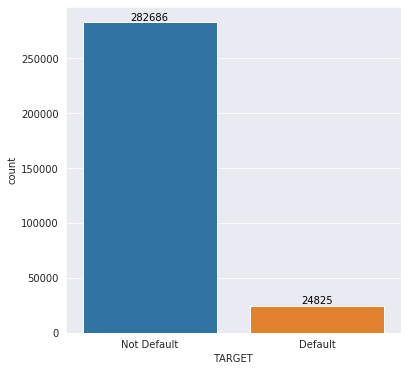

The imbalance ratio of application data for not defaults to defaults is 11.39


In [10]:
# plotting countplot of "TARGET" i.e defaults and non-defaults
fig, ax1 = plt.subplots(1,1,figsize = (6,6))
sns.countplot(x= 'TARGET', data = df_app, ax =ax1)
ax1.set_xticklabels( ('Not Default', 'Default'))
for nr, p in enumerate(ax1.patches):
                height = np.nan_to_num(p.get_height(), 0)
                ax1.text(p.get_x() + p.get_width()*0.5, p.get_y() + height, '{:.0f}'.format(height), 
                     fontsize=10, color='black', ha='center', va='bottom')
plt.show()

# calculating no. of degaults in the total dataset
default_count = df_app['TARGET'].value_counts()

print('The imbalance ratio of application data for not defaults to defaults is {}'.format(round(default_count[0]/default_count[1], 2)))

**Step no. 4: Top 10 correlation for target variable and understanding the data and Removal of correlated numerical variables**

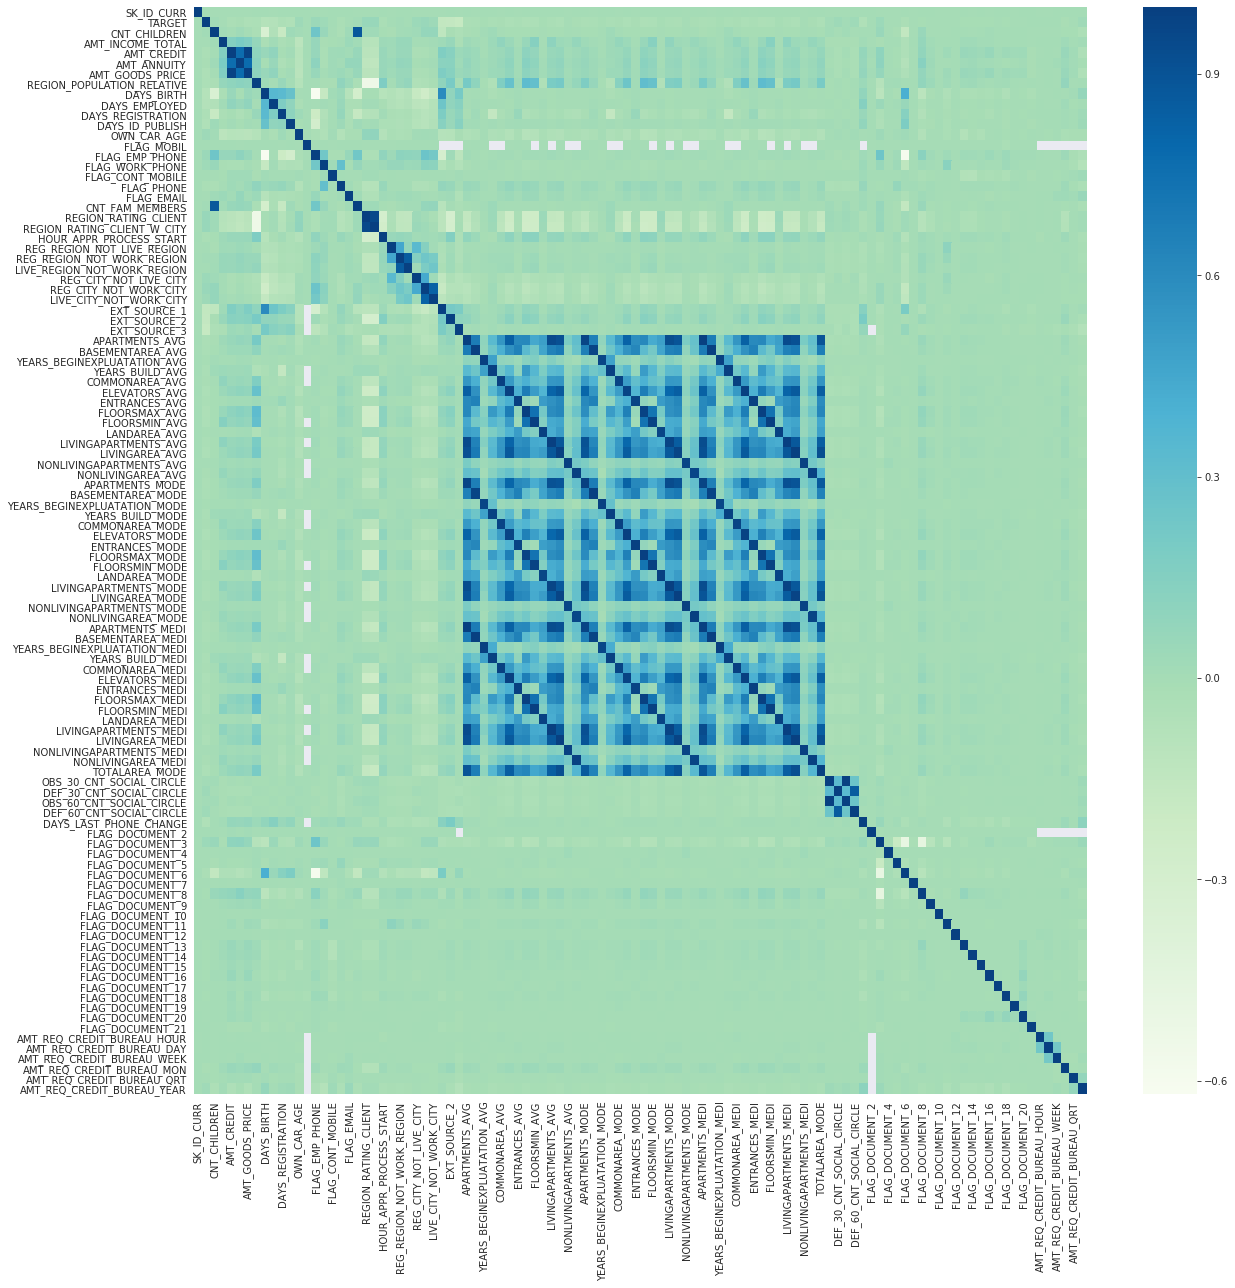

In [11]:
# observing correlattion between numerical variables which can be neglected or combined during the analysis
plt.figure(figsize = (20,20))
sns.heatmap(df_app.corr(), cmap = 'GnBu')
plt.show()

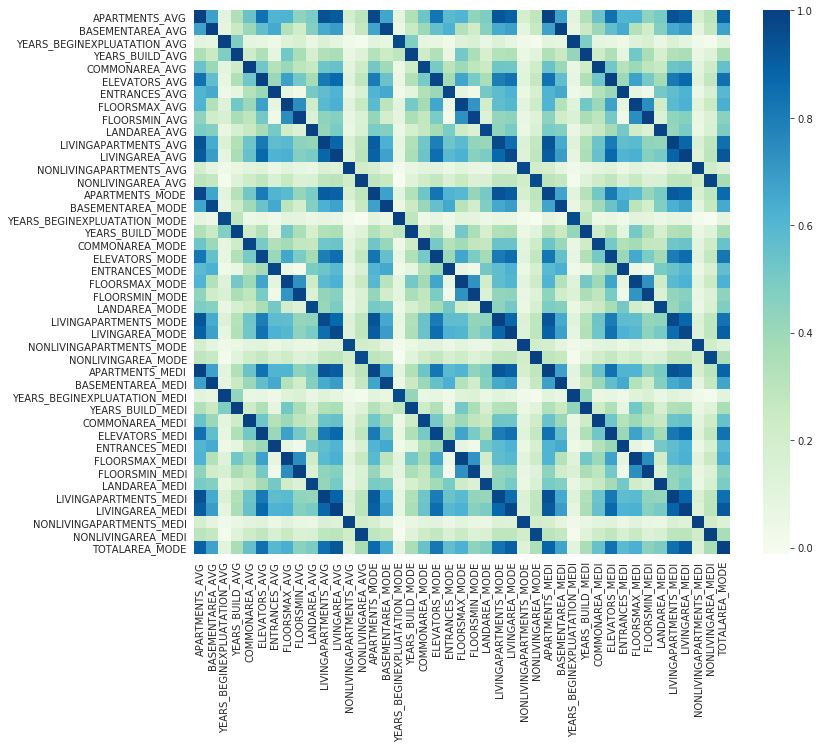

In [12]:
# from the above graph, property columns (avg, median, mode) seems highly correlated, lets evaluate separately
def correlation(pattern_list, df, x, y):
    col_list = []
    for col in df_app.columns:
        if any(re.search(ls, col) for ls in pattern_list):
            col_list.append(col)
    plt.figure(figsize = (x,y))
    sns.heatmap(df[col_list].corr(), cmap = 'GnBu')


correlation(['_AVG', '_MODE', '_MEDI'],df_app,12,10)

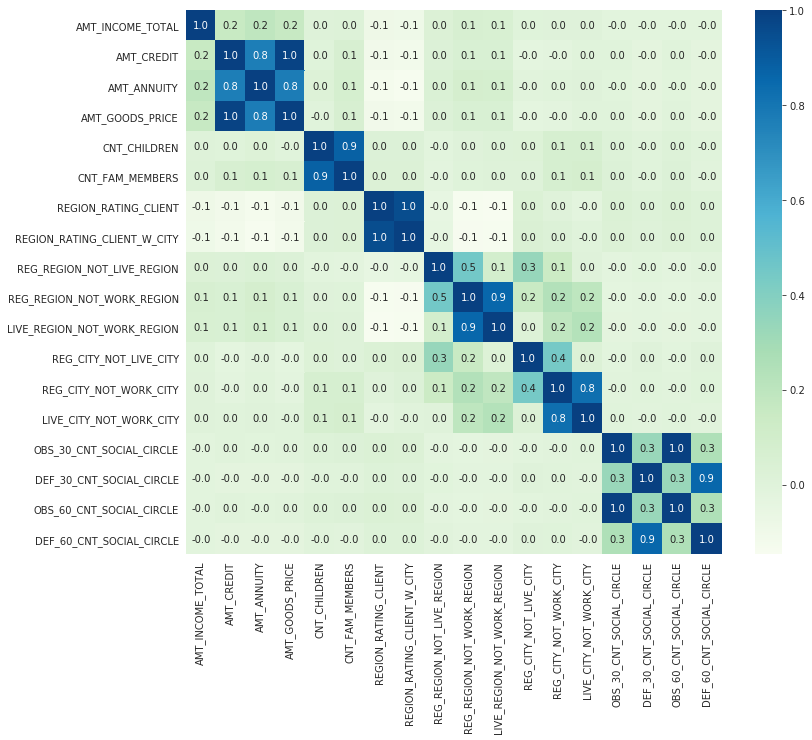

In [13]:
#lets evaluate the columns other than property columns which may have high correlation
plt.figure(figsize = (12,10))

corr_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
            'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
            'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

sns.heatmap(df_app[corr_col].corr(), cmap = 'GnBu', annot = True, fmt = '.1f')
plt.show()

**Inferences from the above heatmap graphs**
1. All property details mean, median, mode are highly correlated. so out of the three sets only one can be considered for analysis
2. OBS_30_SOCIAL_CIRCLE, OBS_60_SOCIAL_CIRCLE are highly correlated
3. DEF_30_SOCIAL_CIRCLE, DEF_60_SOCIAL_CIRCLE are highly correlated
4. CNT CHILDREN and CNT FAMILY are also highly correlated
5. REGION_RATING_CLIENT and REGION_RATING_CLIENT_CITY both are highly correlated

**Below actions are done on the dataframe based on the above inferences and general sense on the domain**

1. Only One set of property details will be considered, other two (AVG/MEDI) will be ignored from the dataset
2. OBS_60_SOCIAL_CIRCLE and DEF_60_SOCIAL CIRCLE will be considered for analysis other two (OBS_30 & DEF_30) will be ignored
3. CNT FAMILY is considered and CNT CHILDREN is ignored
4. REGION_RATING_CLIENT is considered and REGION_RATING_CLIENT_CITY is ignored


In [14]:
# removing medi and avg property details, OBS_30 and DEF_30 (social circle), CNT CHILDREN, and REGION_RATING_CLIENT_CITY columns from the data frame

columns_todrop = ['REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

for col in df_app.columns:
    if (col.find('_AVG') != -1) or (col.find('_MEDI') != -1):
        columns_todrop.append(col)
        
df_app = df_app.drop(columns_todrop, axis = 1)
df_app.shape

(307511, 90)

In [15]:
#Top 10 correlations among variables for default and not default

#creating a new dataframe
df_temp = df_app.copy()
for col in df_temp.columns:
    if (col.find('_MODE') != -1):
        df_temp = df_temp.drop(col, axis = 1)

default = df_temp[df_temp['TARGET'] == 1].corr()
not_default = df_temp[df_temp['TARGET'] == 0].corr()

print('The top 10 correlations ammong variables for default are:')
print(default.unstack().sort_values(ascending=False).drop_duplicates()[1:].head(10))

print('The top 10 correlations ammong variables for not default are:')
print(not_default.unstack().sort_values(ascending=False).drop_duplicates()[1:].head(10))

The top 10 correlations ammong variables for default are:
AMT_CREDIT                  AMT_GOODS_PRICE                0.983103
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.778540
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752699
                            AMT_CREDIT                     0.752195
DAYS_BIRTH                  EXT_SOURCE_1                   0.570054
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497937
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.472052
FLAG_DOCUMENT_6             DAYS_BIRTH                     0.387422
REG_CITY_NOT_LIVE_CITY      REG_REGION_NOT_LIVE_REGION     0.322628
dtype: float64
The top 10 correlations ammong variables for not default are:
AMT_CREDIT                   AMT_GOODS_PRICE               0.987250
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CI

**Step no. 5. Conversion of binary and discrete numerical to categorical variables**

In [16]:
# Some of the columns are converted to object format 
for col in df_app.columns:
    if (col.find('FLAG') != -1) or (col.find('NOT') != -1) or (col.find('RATING_CLIENT') != -1) or (col.find('SOCIAL_CIRCLE') != -1) or (col.find('BUREAU_') != -1):
        df_app.loc[:, col] = df_app.loc[:, col].astype('object')

columns_list = ['SK_ID_CURR', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START']

for col in columns_list:
     df_app.loc[:, col] = df_app.loc[:, col].astype('object')

In [17]:
# creating two dataframes for numerical and object columns

df_app_num = df_app.select_dtypes(include = ['number'])
print('Number of numerical columns are {}'.format(len(df_app_num.columns)))

df_app_obj = df_app.select_dtypes(include = ['object'])
print('Number of object columns are {}'.format(len(df_app_obj.columns)))

Number of numerical columns are 30
Number of object columns are 60


### II. Univariate, segmented univariate and bi-variate analysis for categorical varibales to identify important columns<a id='II'></a>

**step no 1: Creation of functions for plotting univariate and segmented univariate analysis**

In [18]:
def catper_plots(col, df, x = 1, y = 2, annot = 'yes', size = (14,6), ret = 'no'):
    
    # creating default_per (percentage) for different variables in each column
    default = df[['TARGET', col]].groupby(col).sum()
    total = df[['TARGET', col]].groupby(col).count()
    default_per = default/total*100
    default_per.rename(columns = {'TARGET' : 'Default %'}, inplace = True)
    default_per.sort_values('Default %', inplace = True, ascending = False)
    
    # plotting defalut percentage and countplots adjacently
    fig, (ax1,ax2) = plt.subplots(x,y, figsize = size)
    sns.barplot(data = default_per, x = default_per.index, y = 'Default %', ax = ax1, order = default_per.index)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title('Default rate (in %) of {}'.format(col))
    
    sns.countplot(col, data = df, ax = ax2, order = df[col].value_counts().index)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title('Count Plot of {}'.format(col))
    
    if annot == 'yes':
        for nr, p in enumerate(ax1.patches):
                height = np.nan_to_num(p.get_height(), 0)
                ax1.text(p.get_x() + p.get_width()*0.5, p.get_y() + height, '{:.1f}'.format(height), 
                     fontsize=10, color='black', ha='center', va='bottom')
        for nr, p in enumerate(ax2.patches):
                height = np.nan_to_num(p.get_height(), 0)
                ax2.text(p.get_x() + p.get_width()*0.5, p.get_y() + height, '{:.0f}'.format(height), 
                     fontsize=10, color='black', ha='center', va='bottom') 
    plt.tight_layout
    plt.show()
    
    # Merging count and defaults dataframe which will be used for filtering important columns
    count = df[[col, 'TARGET']].groupby(col).count()
    default_per['count'] = count["TARGET"]
    default_per['column name'] = default_per.index.name
    default_per.reset_index(inplace = True)
    default_per.rename(columns = {col : 'variable'}, inplace = True)
    if ret == 'yes':
        return default_per

In [19]:
df_app_obj = df_app.select_dtypes(include = ['object'])
print('Number of object columns are {}'.format(len(df_app_obj.columns)))

Number of object columns are 60


**Step no 2. Filtering categorical columns based on default rates of features in the categorical column**

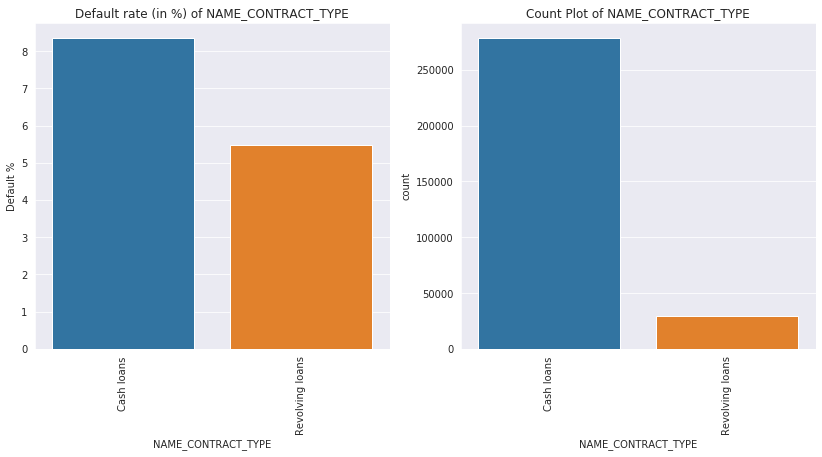

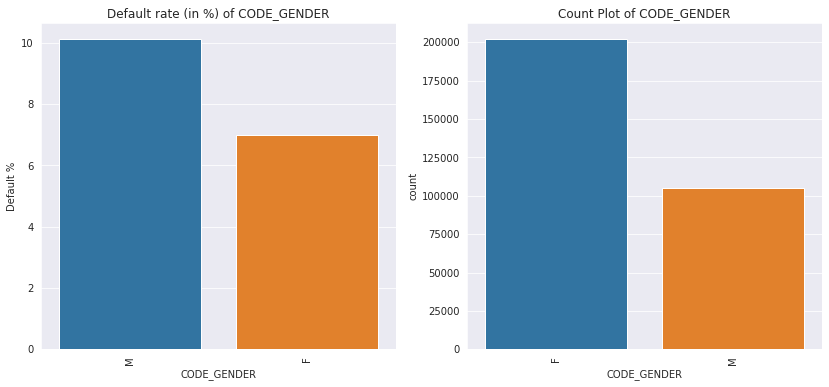

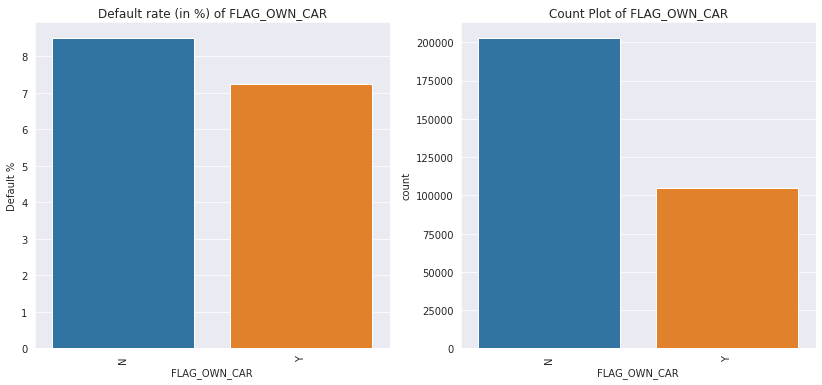

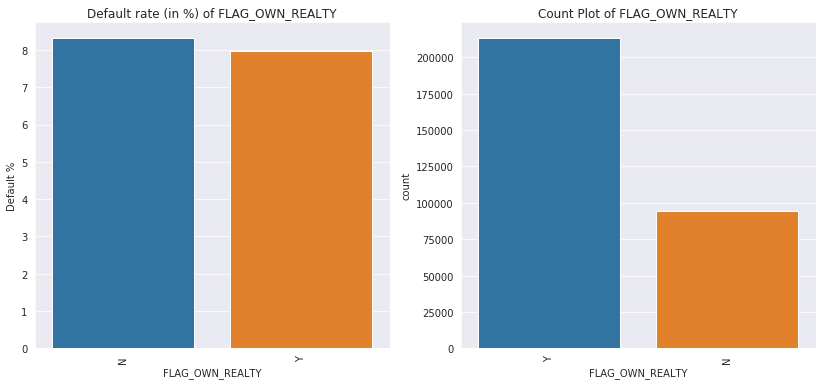

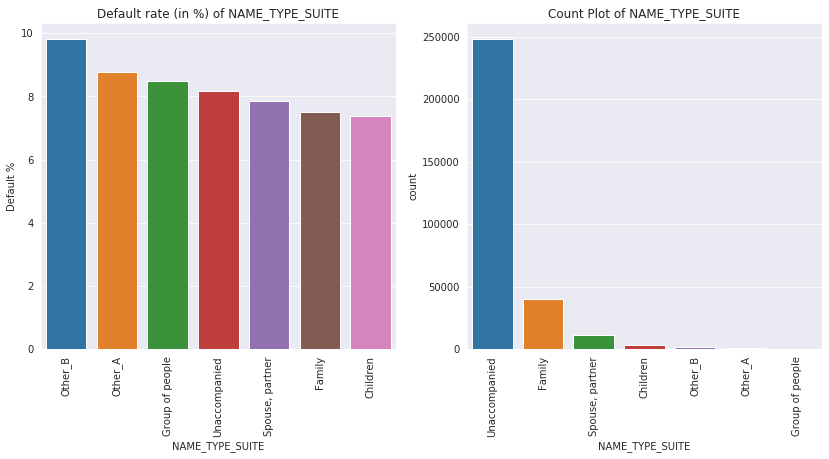

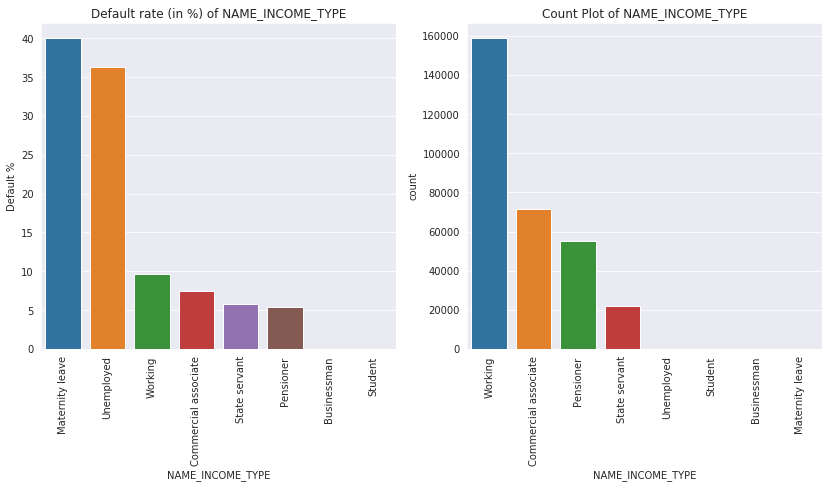

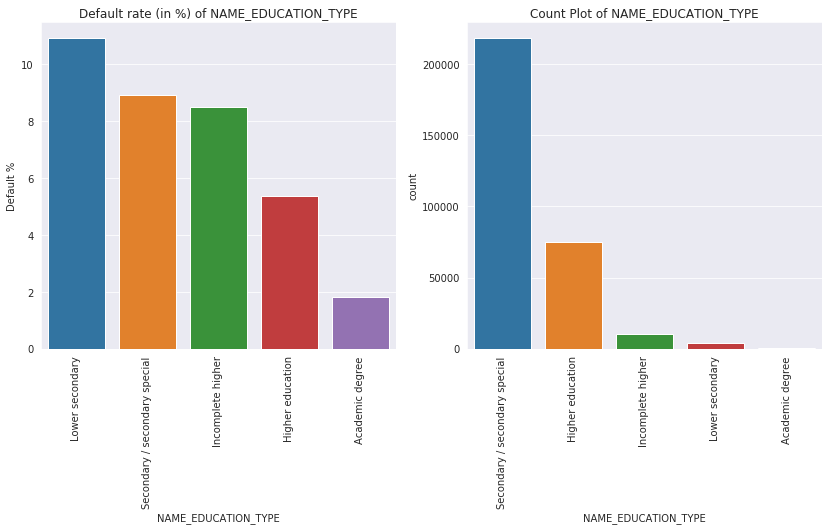

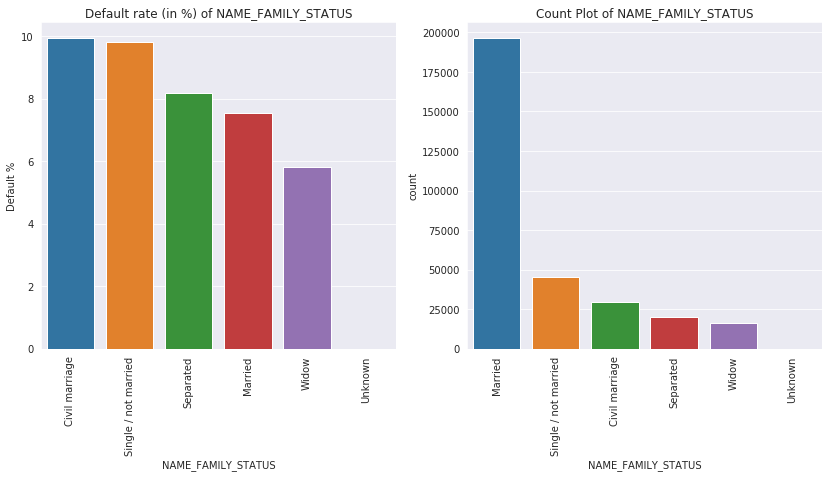

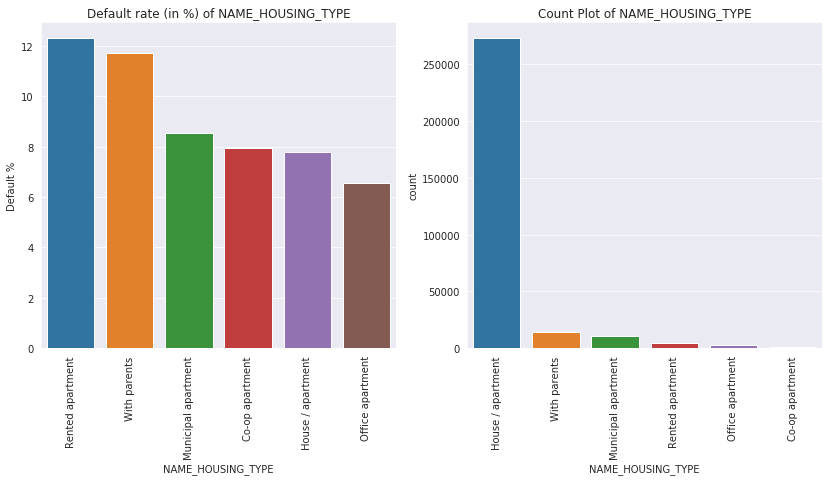

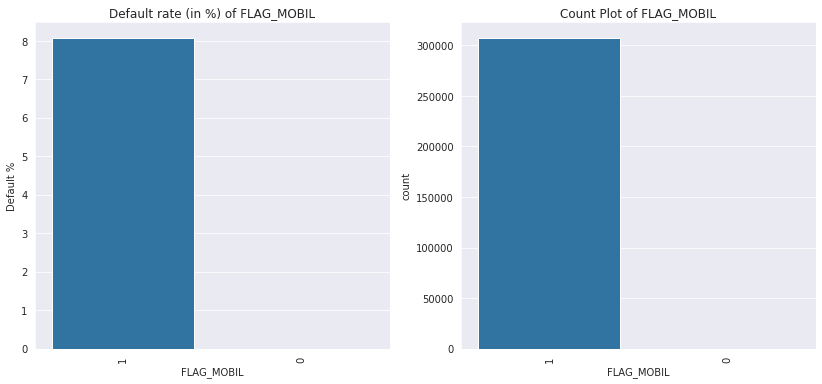

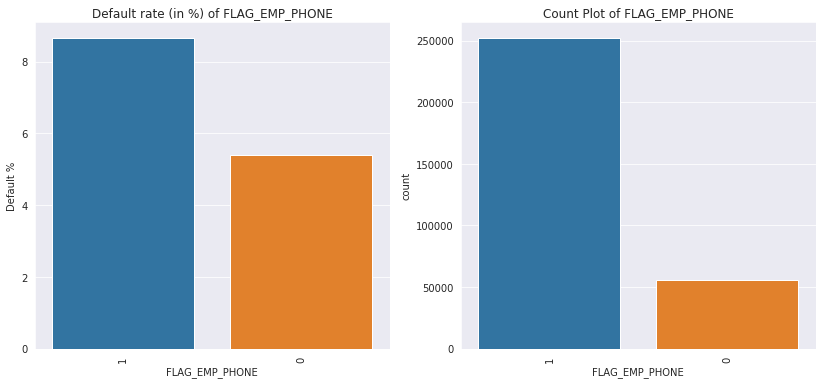

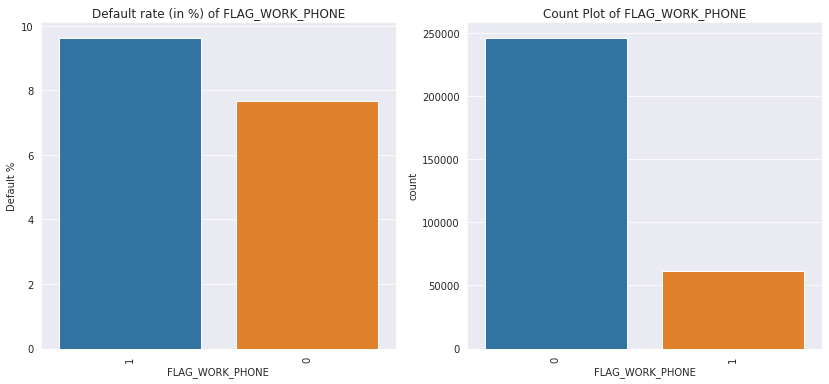

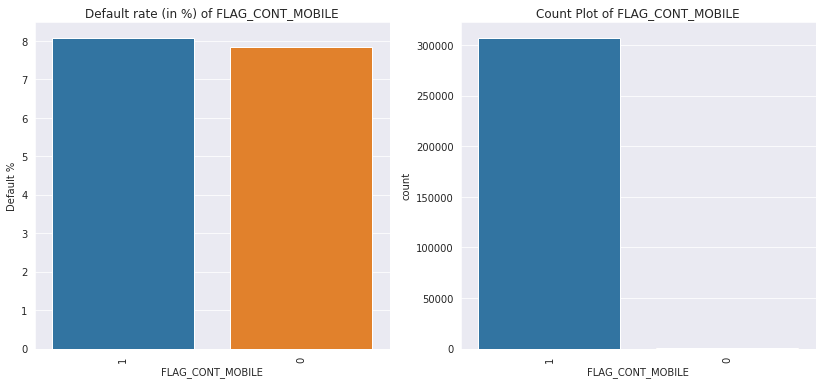

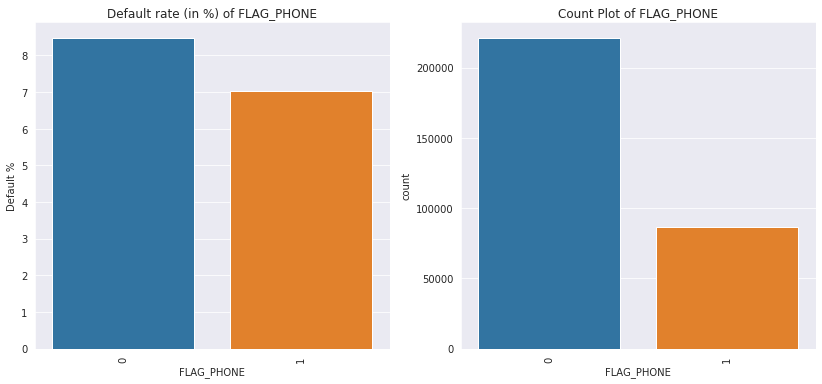

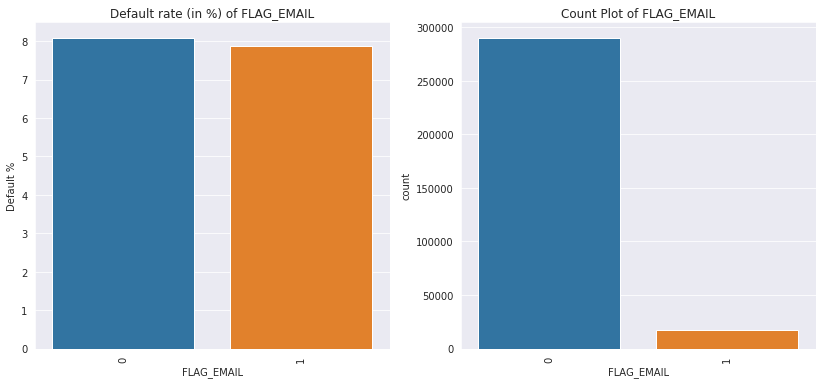

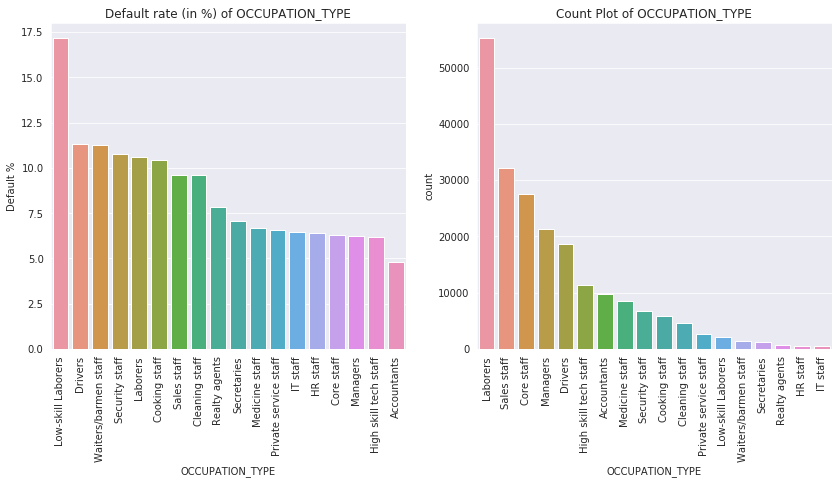

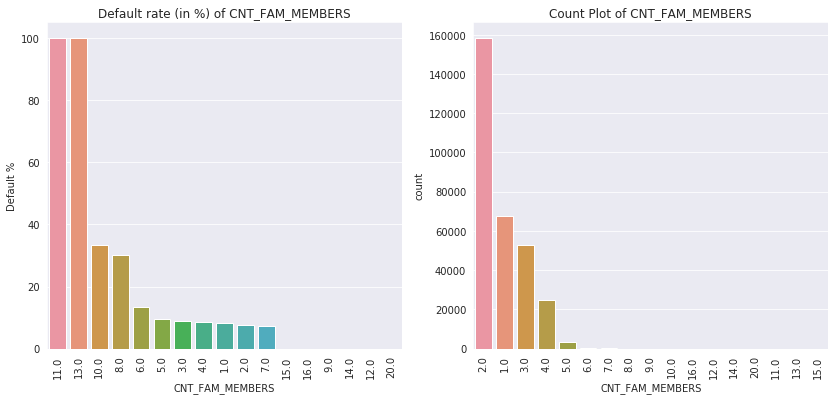

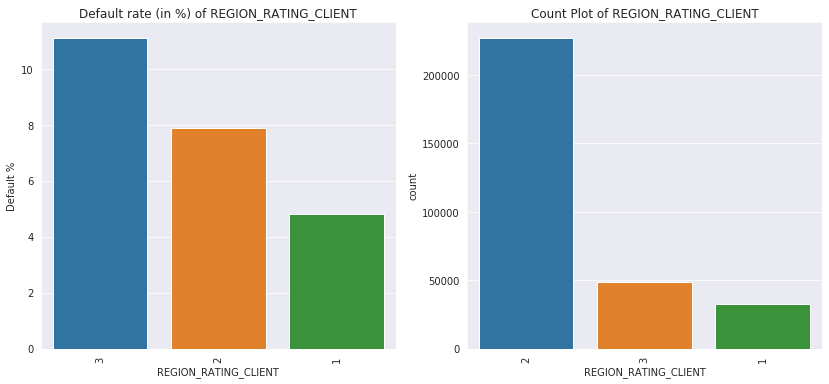

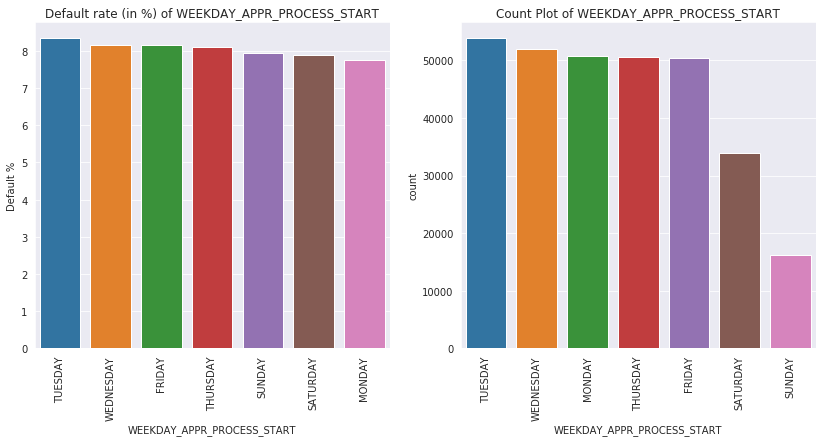

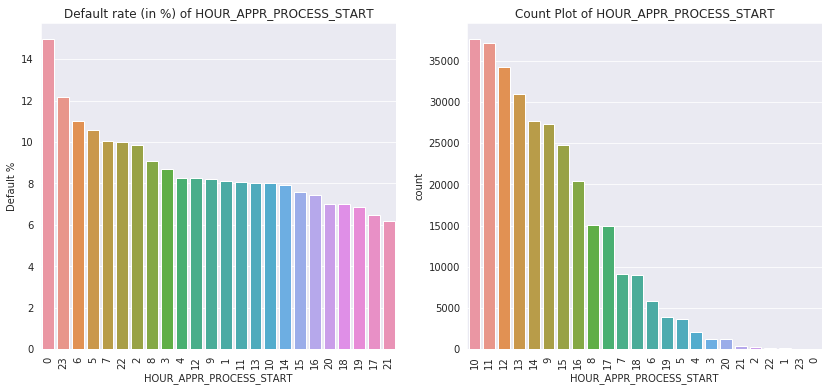

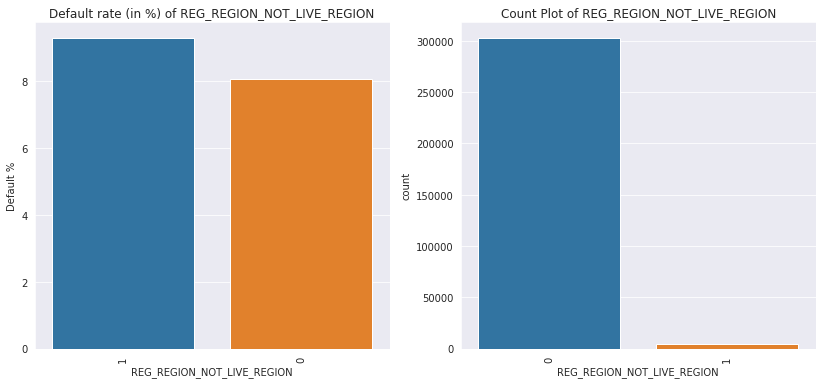

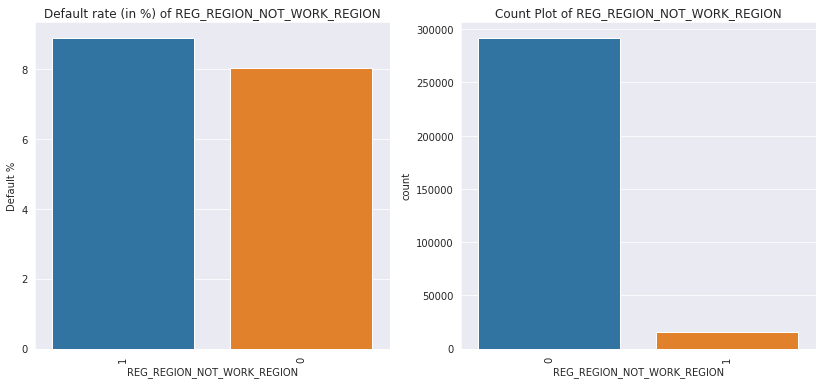

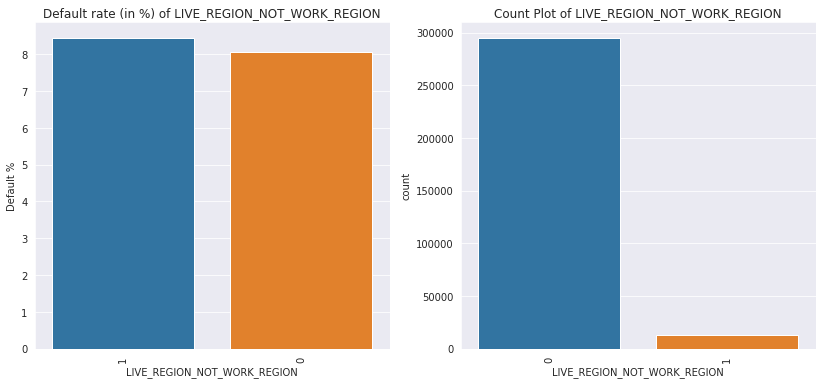

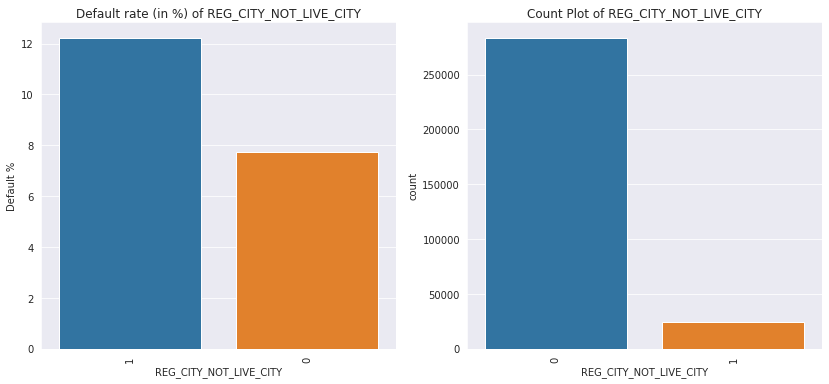

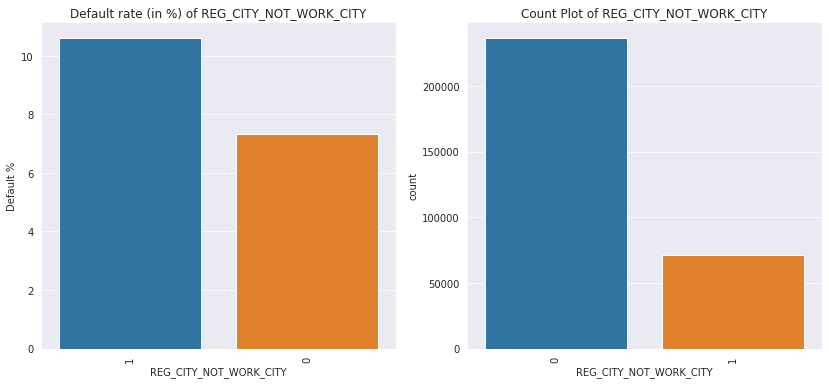

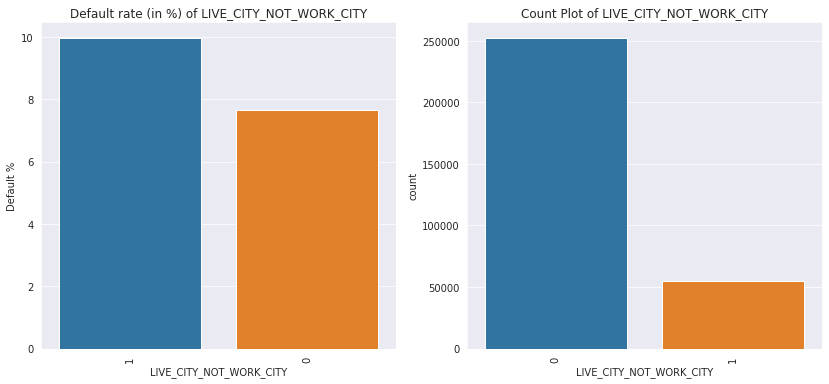

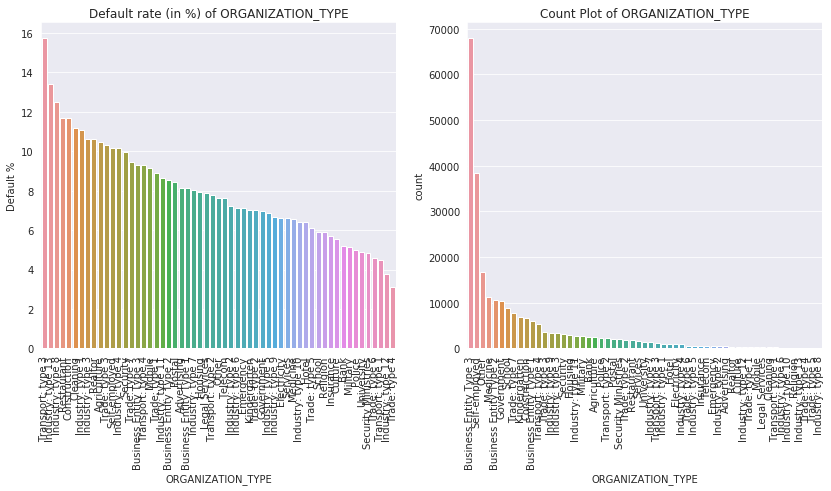

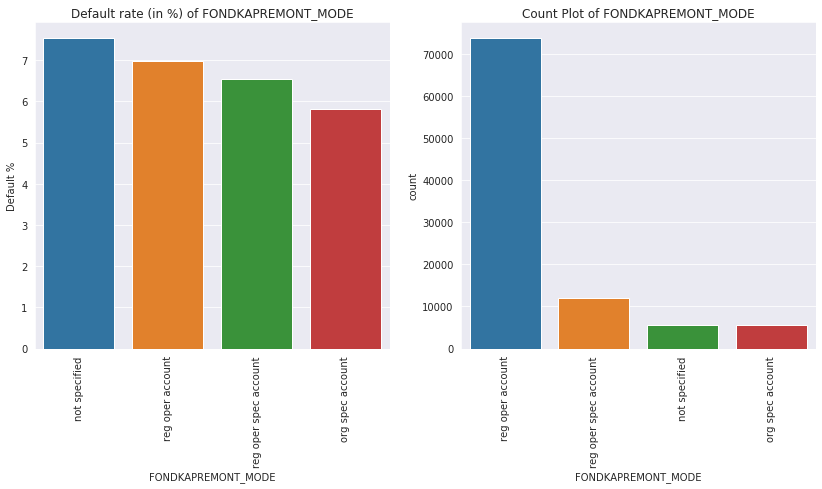

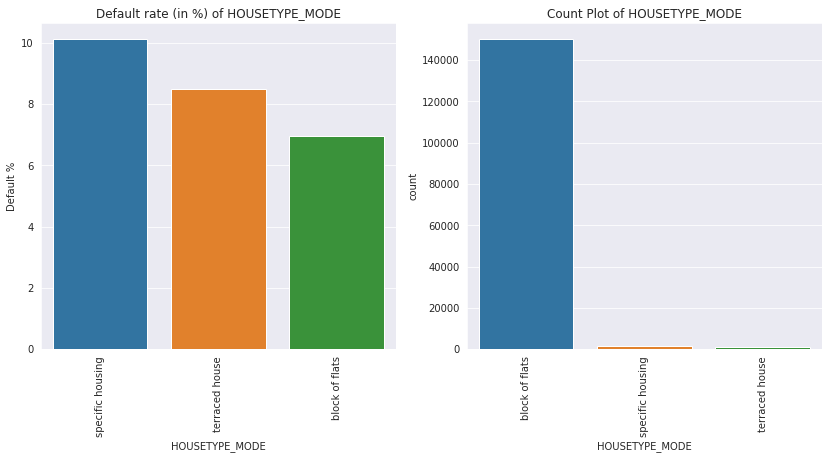

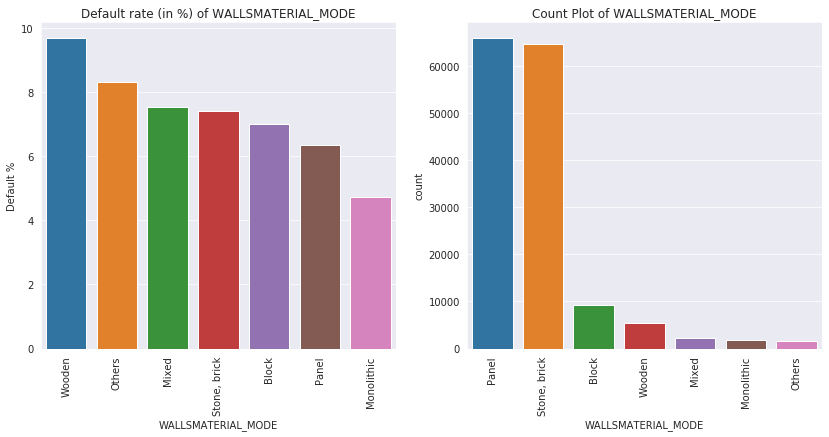

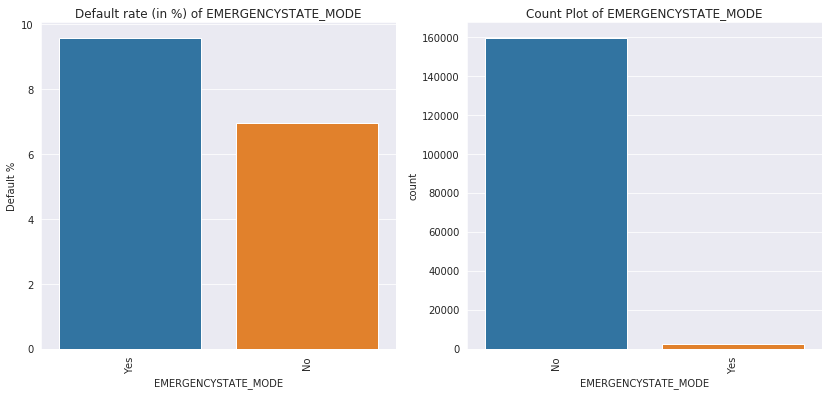

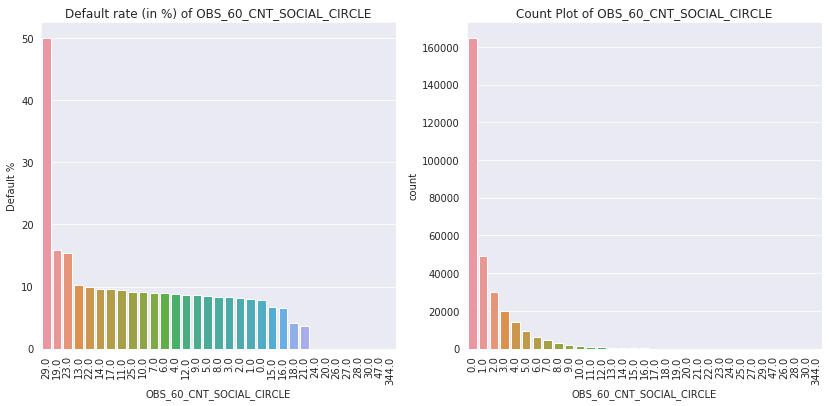

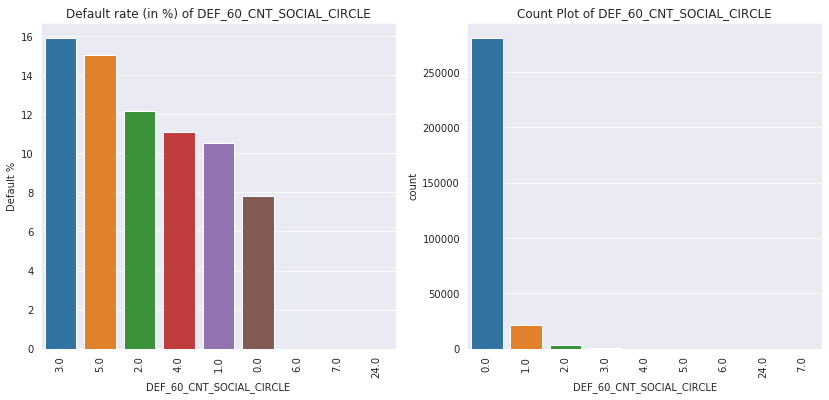

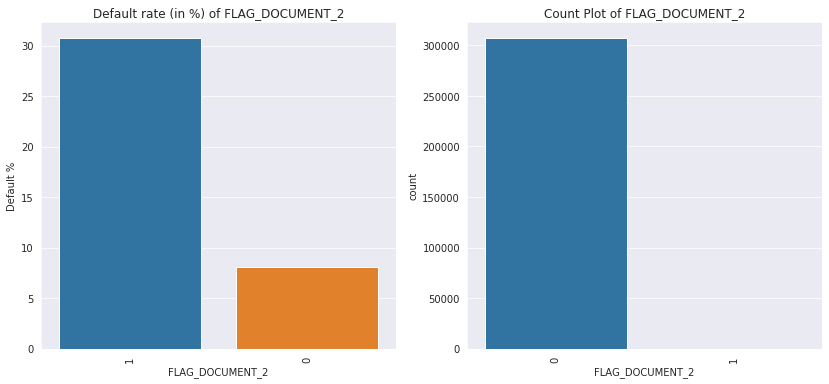

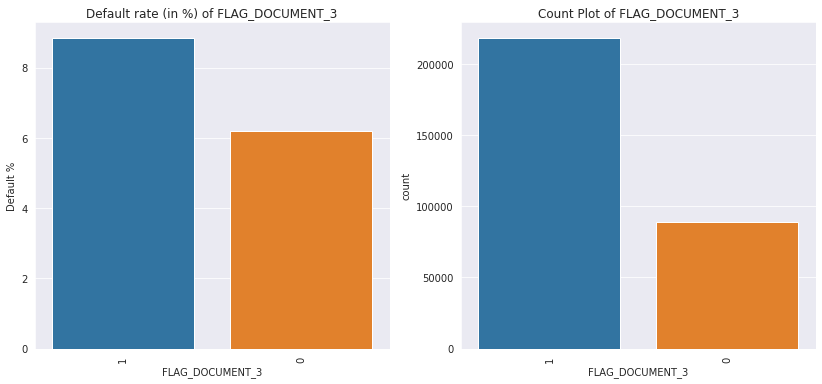

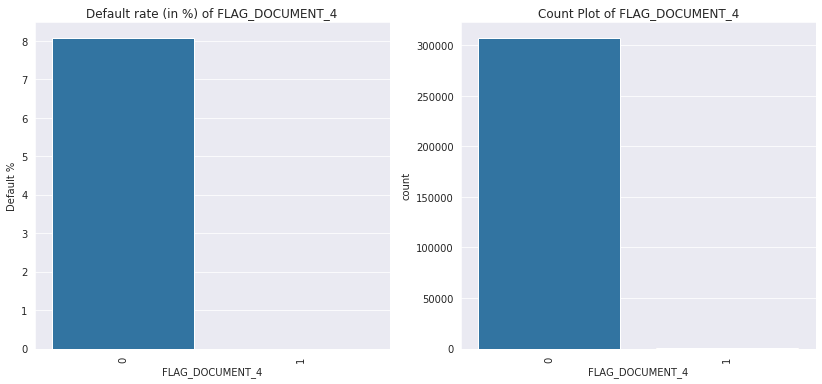

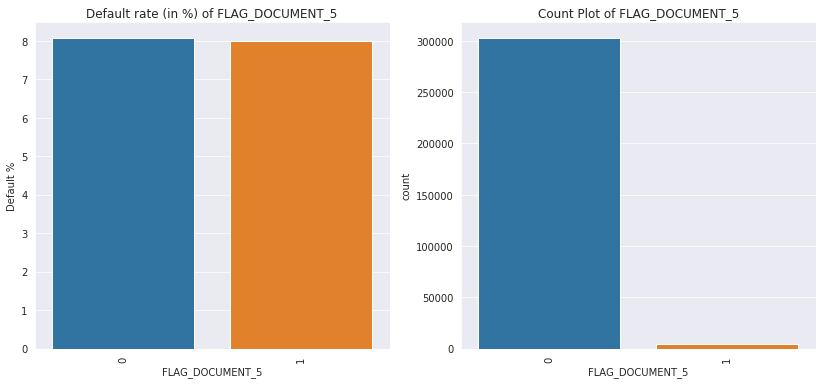

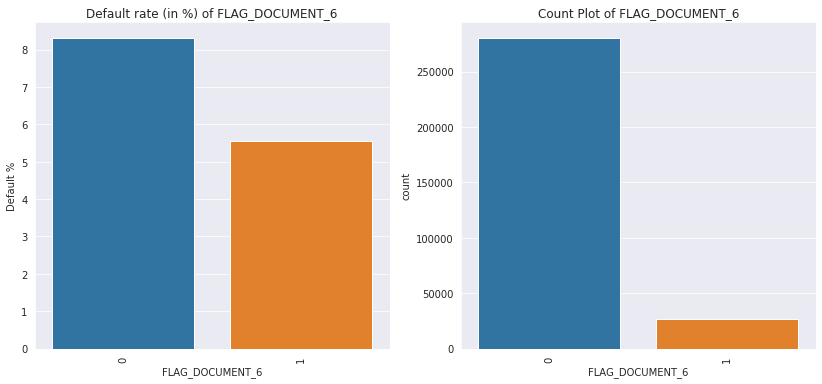

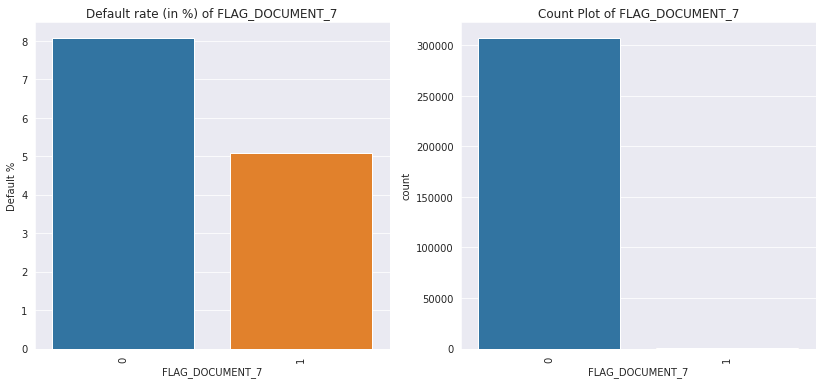

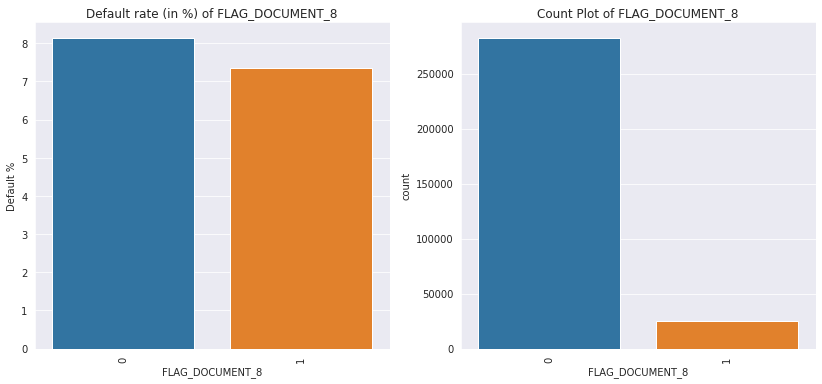

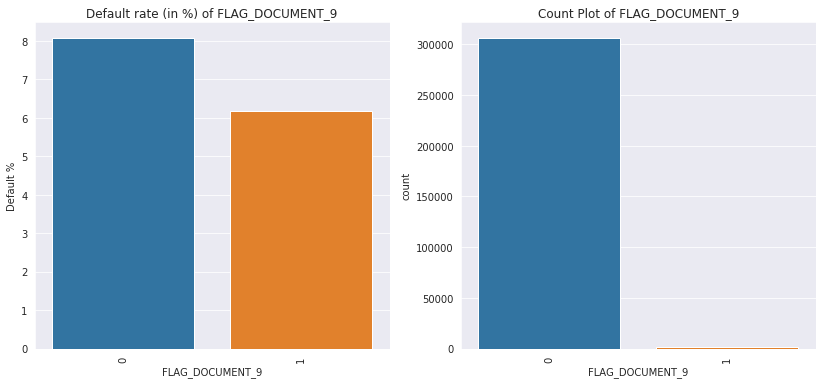

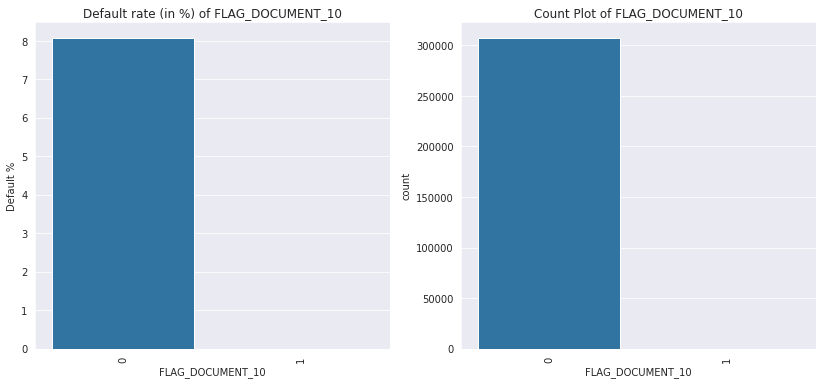

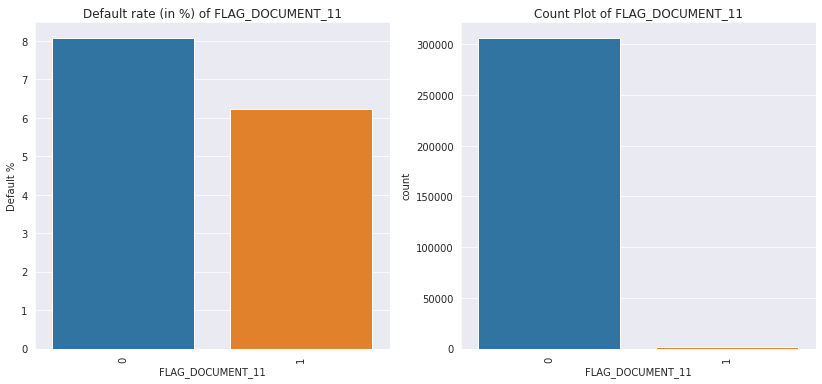

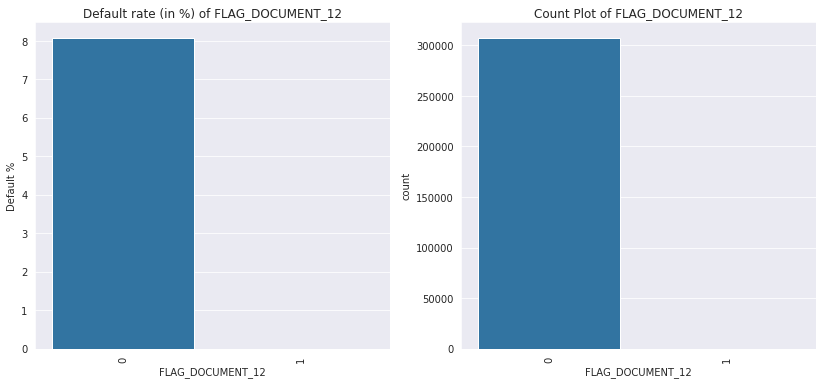

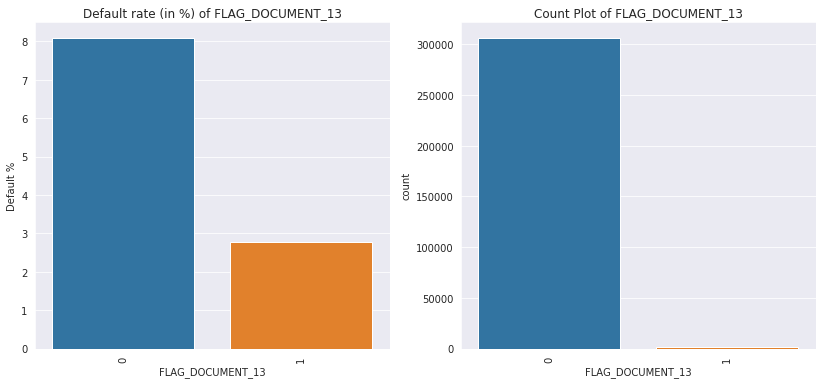

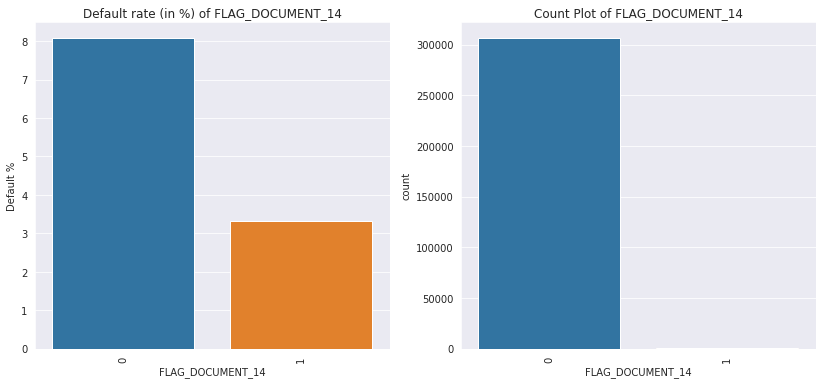

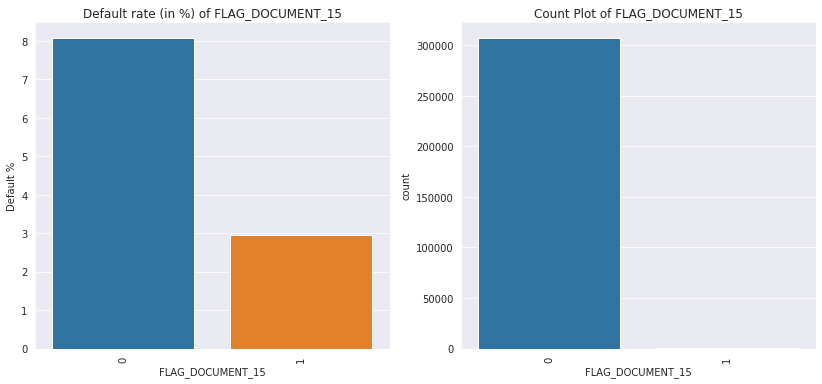

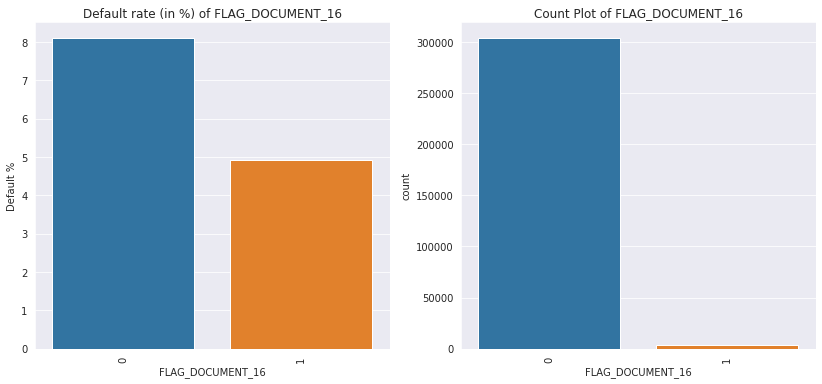

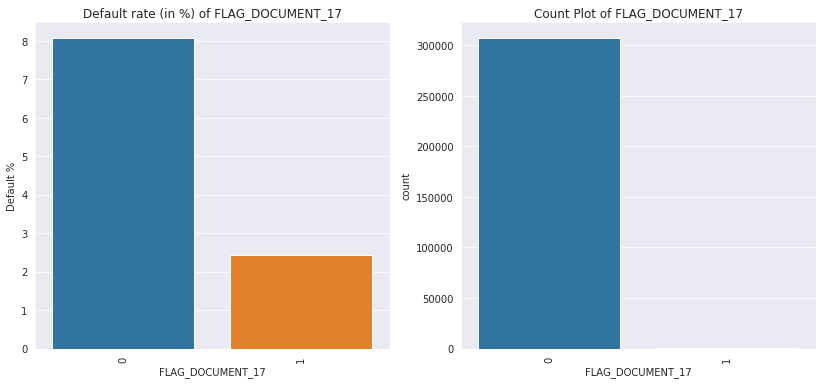

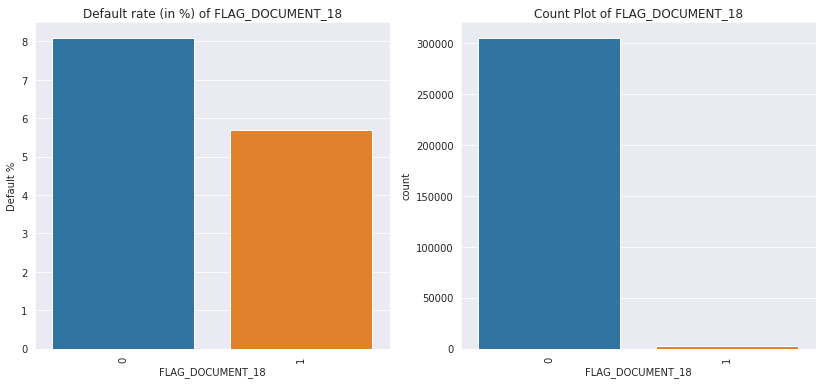

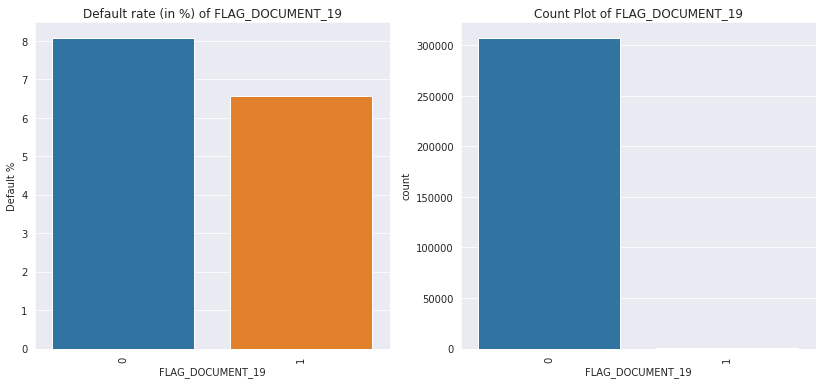

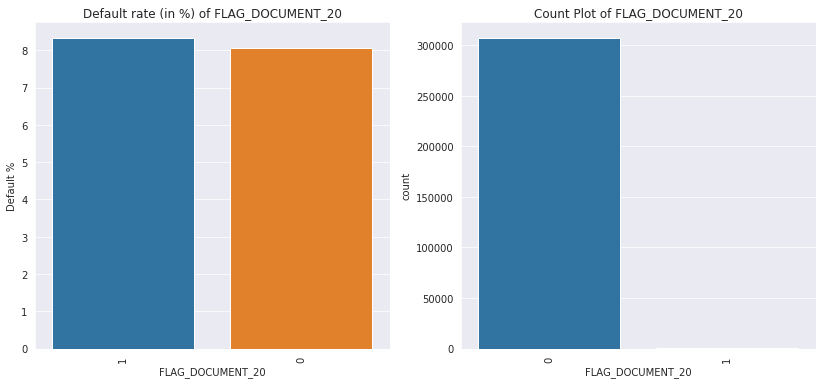

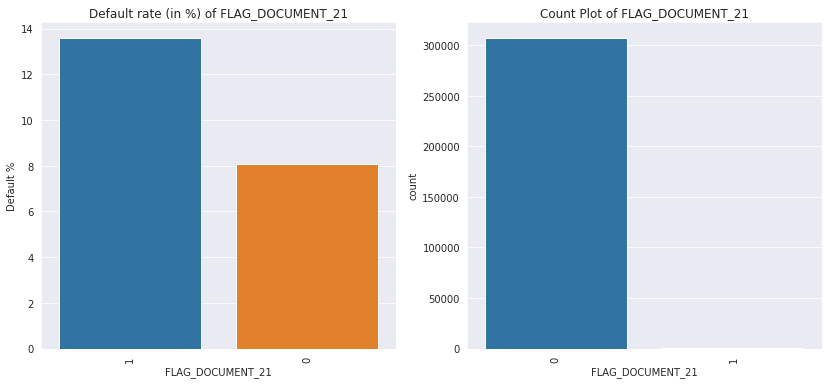

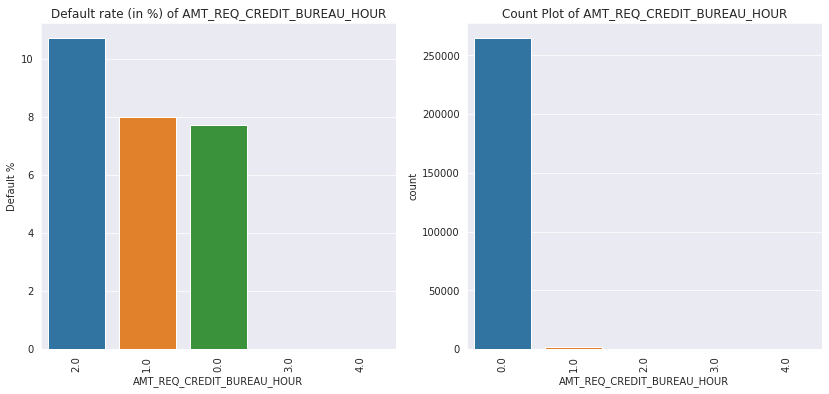

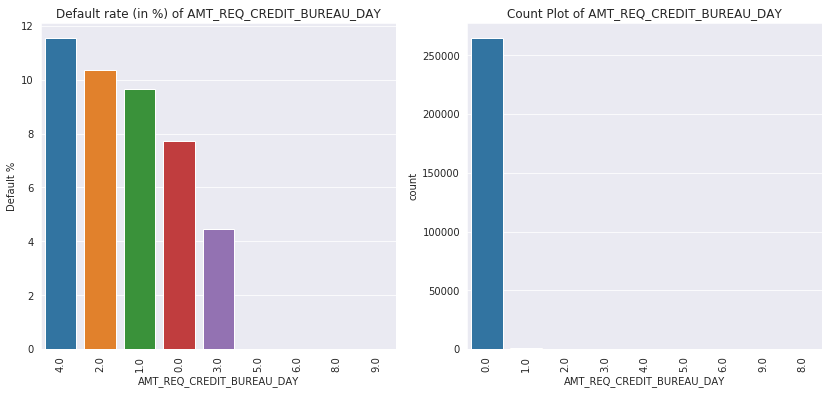

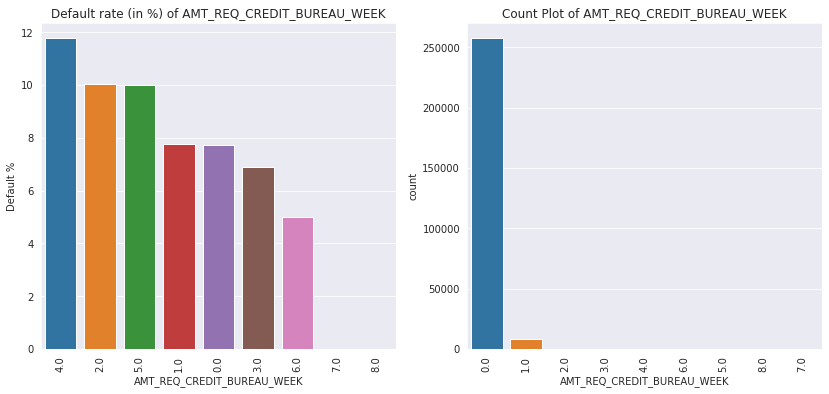

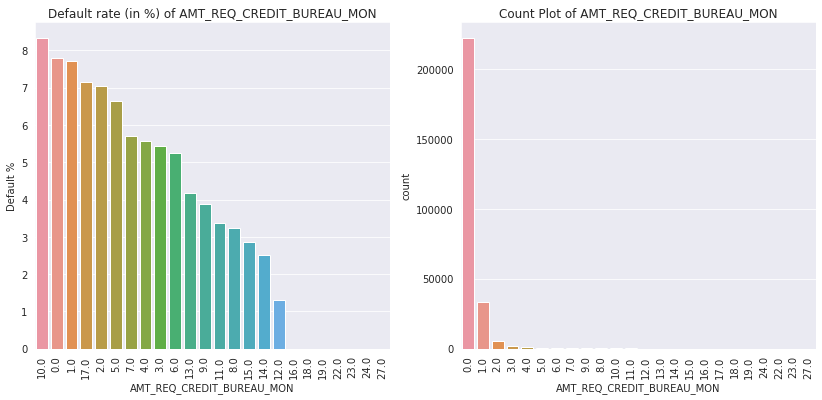

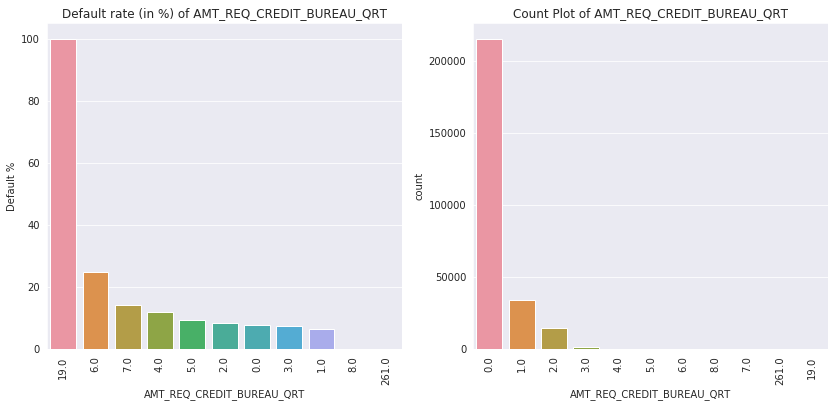

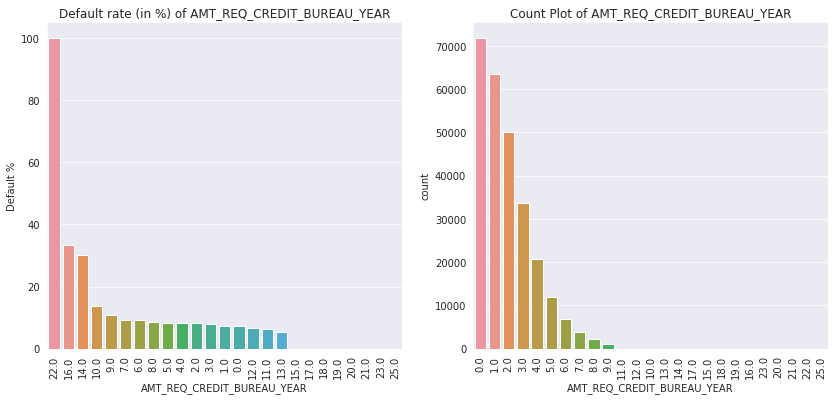

In [20]:
default_percentage = pd.DataFrame()
for col in df_app_obj.columns:
    if col != 'TARGET' and col != 'SK_ID_CURR':
        default_per = catper_plots(col, df_app, annot = 'No', ret  = 'yes')
        default_percentage = pd.concat([default_percentage,default_per], ignore_index = True)

In [21]:
# Filtering important categorical variables based on default rate (%) (<6% or >10%) and count >1000

# Creating high default rates columns (default rate>10%)
def_per_count = default_percentage[default_percentage['count'] > 1000]
high_default_var = def_per_count[def_per_count['Default %'] >10 ]
high_default_var_list = list(high_default_var['column name'].unique())

# Creating low default rates columns (default rate<6%)
low_default_var = def_per_count[def_per_count['Default %'] <6 ]
low_default_var_list = list(low_default_var['column name'].unique())

# Merging both to extract list of columns of high and low default
important_variables = high_default_var_list + low_default_var_list
important_variables = list(set(important_variables))

# Based on the list replacing all bureau (no. of applications) column with Bureau year 
imp_cat_var = [x for x in important_variables if ((x.find('BUREAU') == -1) and (x.find('FONDKAP') == -1)) ]
imp_cat_var.append('AMT_REQ_CREDIT_BUREAU_YEAR')
print(len(imp_cat_var))
print(imp_cat_var)

21
['REGION_RATING_CLIENT', 'FLAG_DOCUMENT_6', 'OCCUPATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_13', 'REG_CITY_NOT_WORK_CITY', 'WALLSMATERIAL_MODE', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE', 'HOUSETYPE_MODE', 'HOUR_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_16', 'NAME_INCOME_TYPE', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_YEAR']


**Step No 3. Analysis on each column and inferences from each categorical column**

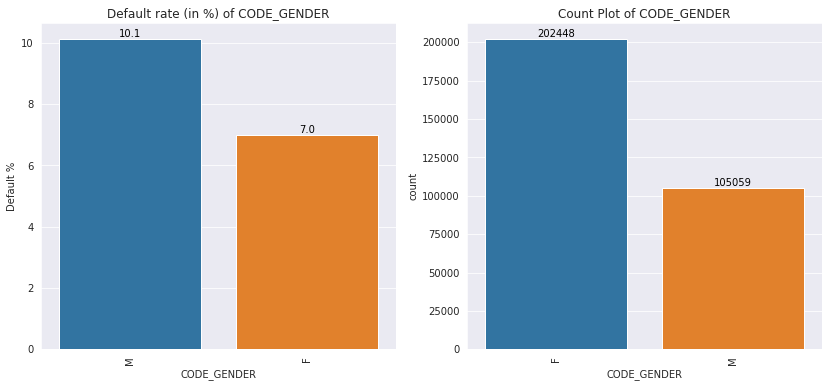

In [22]:
# 1st column : CODE_GENDER 
catper_plots('CODE_GENDER', df_app, annot = 'yes')

**Inferences**: 
1. Out of all the applicants, Female applicants are 65% and male applicants are 35%. 
2. Male applicants have high chance to default (default rate - 10%) when compared to female applicants whose deault rate is 7%

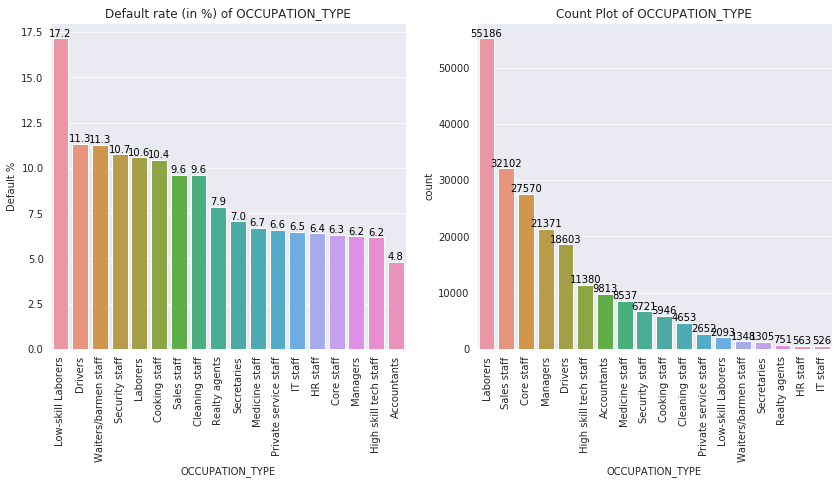

In [23]:
# 2nd column : OCCUPATION TYPE
catper_plots('OCCUPATION_TYPE', df_app)

**Inferences**: 
1. Most occupation types of applicants that are applying for loan are Laborers, Sales Staff, Core Staff, Managers etc.
2. Occupation of applicants have high default rates are low-skilled laborers (17.5%), Drivers (11.3%), barmen staff (11.2%), security staff (10.7%), Laborers (10.6%). 
3. Occupation of applicants have low default rates are Accountants (4.8%), High skill staff (6.15%), Managers(6.2%), Core Staff (6.3%)
4. In-general, occupation could play a major role in defaults, applicants having low income occupations such as low-skilled laborers, Drivers, barmen staff etc. are having high default rates

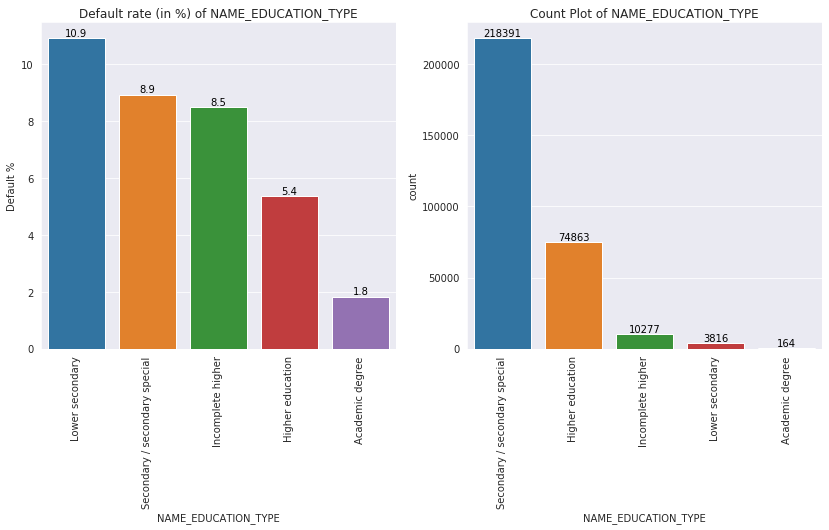

In [24]:
# 3rd column : EDUCATION TYPE
catper_plots('NAME_EDUCATION_TYPE', df_app)

**Inferences**: 
1. Most applicants are secondar/secondary special (71%) and higher education (24%)
2. As the education of the applicant increases the defaut rate decreases Lower secondary (10.9%), Secondary(8.9%), Higher Education (5.4%), Academic degree (1.8%)

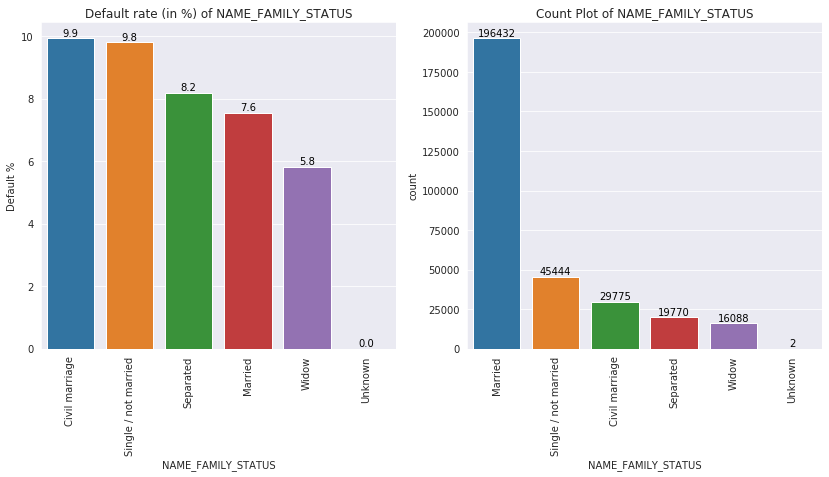

In [25]:
# 4th column : FAMILY STATUS
catper_plots('NAME_FAMILY_STATUS', df_app)    

**Inferences**: 
1. Most applicants are Married (64%), not married (15%) and civil marriage (10%)
2. Single/not married and civili marriage have high default rate of 10%
3. where as widows are having low default rate of 5.8%

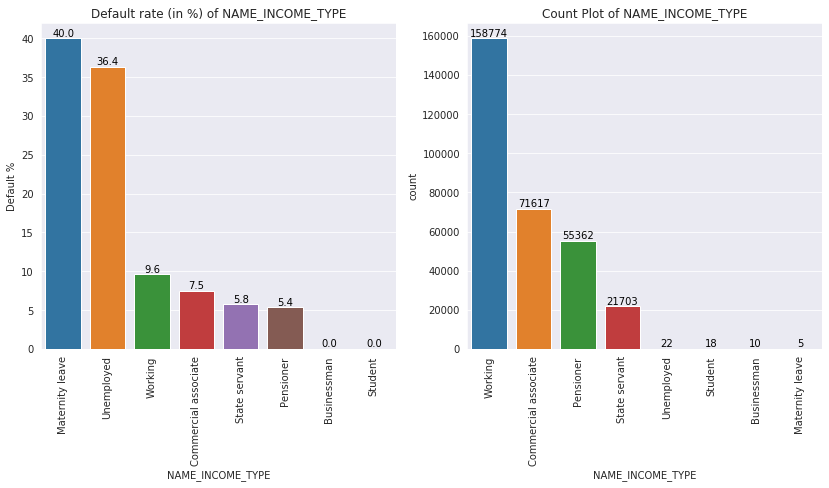

In [26]:
# 5th column : INCOME TYPE
catper_plots('NAME_INCOME_TYPE', df_app)

**Inferences**: 
1. Most applicants are Working (52%), Commercial associate (7.5%), pensioner (18%) and state servant (7%)
2. Maternity leave and unemployed default rates are more than 35% but their counts are very low which means this may not be trend of actual
3. Out of the income types having good count, pensioners and state servant are having low default rate of 5.5% and working applicants have high default rate of 10%

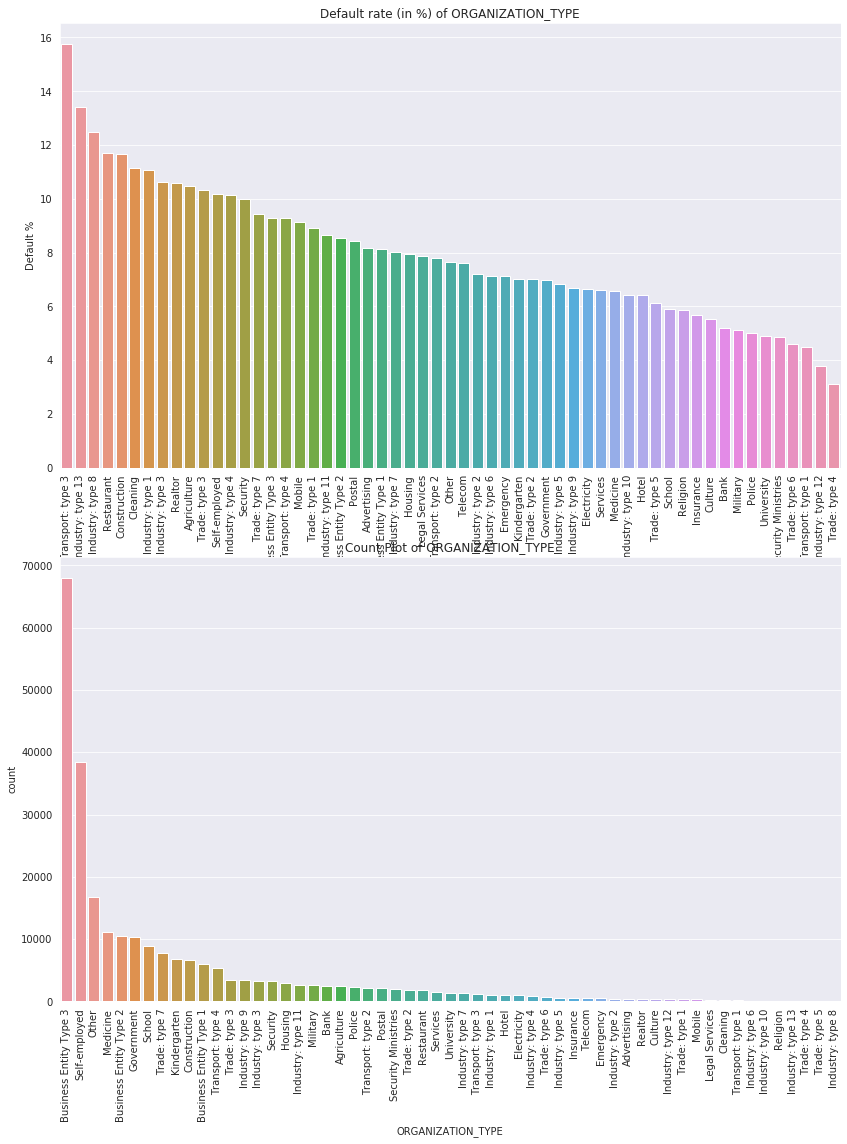

In [27]:
# 6th column : ORGANIZATION TYPE
catper_plots('ORGANIZATION_TYPE', df_app, x = 2, y =1, size = (14,18), annot = 'no')

**Inferences**: 
1. Most applicants are from Industry types - Business (27%), self employed (15%), other (8%)
2. Industry types of applicants with high default rates (more than 10%)  are Transport (type 3), Industries (type - 8,13,1,3), Restaurant, construction, cleaning, self employed
3. Industry types of applicants with low default rates are military, security ministries, police, university etc.
4. The above inferences are inline withour earlier inference that state servicing employees having low default rate
5. Also as indicated early, various low income groups such as low-skilled laborers, Drivers, Barmen have high default rates. These groups have industry types such as construction, transport, restaurant etc. So this also confirms our earlier inference 

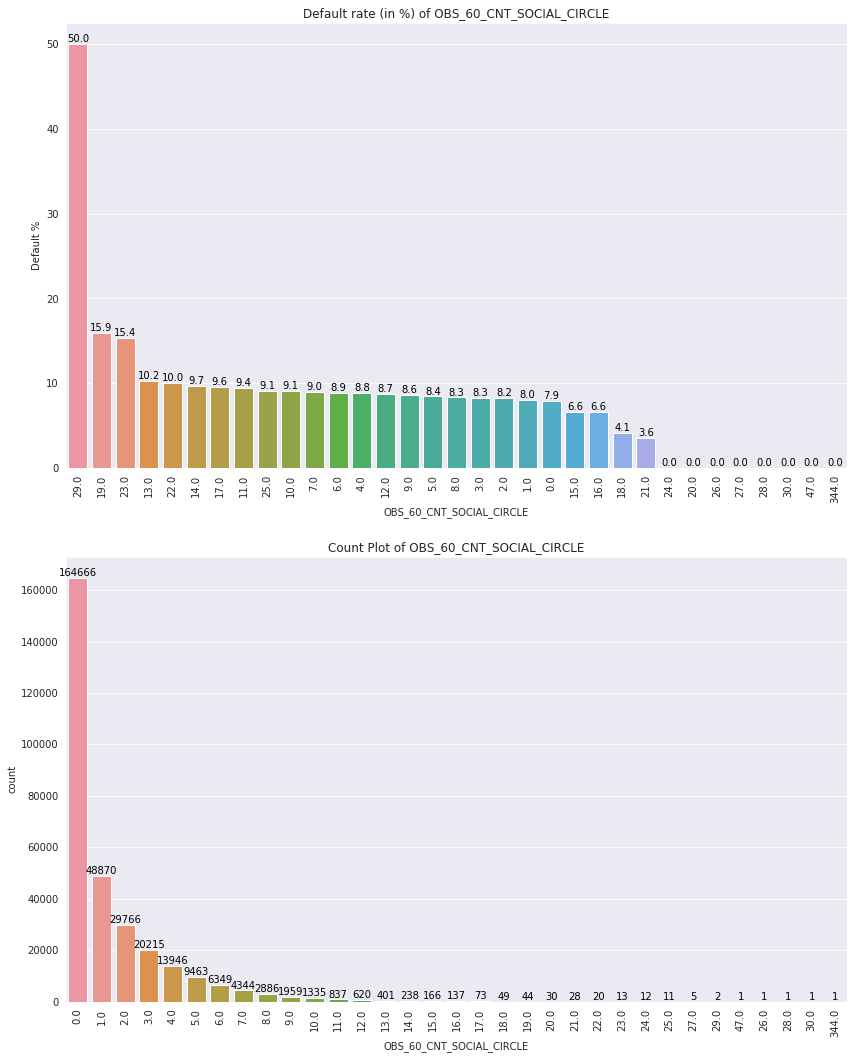

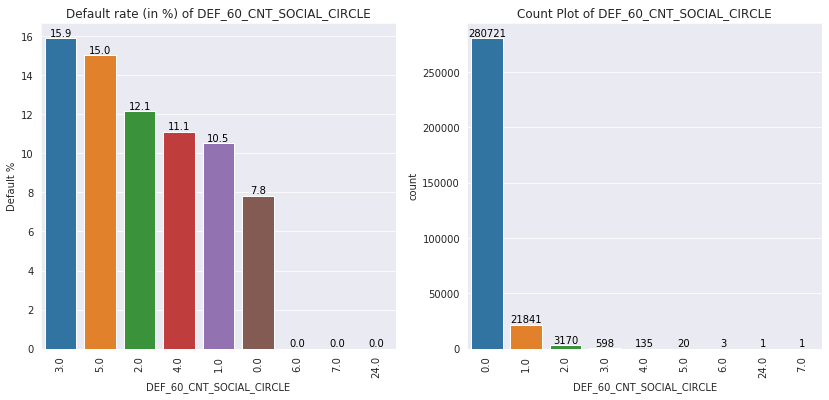

In [28]:
# 7th column : OBSERVED DEFAULTS IN SOCIAL CIRCLE
catper_plots('OBS_60_CNT_SOCIAL_CIRCLE', df_app, x = 2, y =1, size = (14,18), annot = 'yes')

# 8th column : DEFINED DEFAULTS IN SOCIAL CIRCLE
catper_plots('DEF_60_CNT_SOCIAL_CIRCLE', df_app)

**Inferences**: 
1. Most of the applicants have zero and one observed and defined defaults in days past due
2. Ingeneral, as the defaults in the social circle increases the default rate increases
3. The applicants who have more than 2 defaults in the social circle have a default rate of 15%

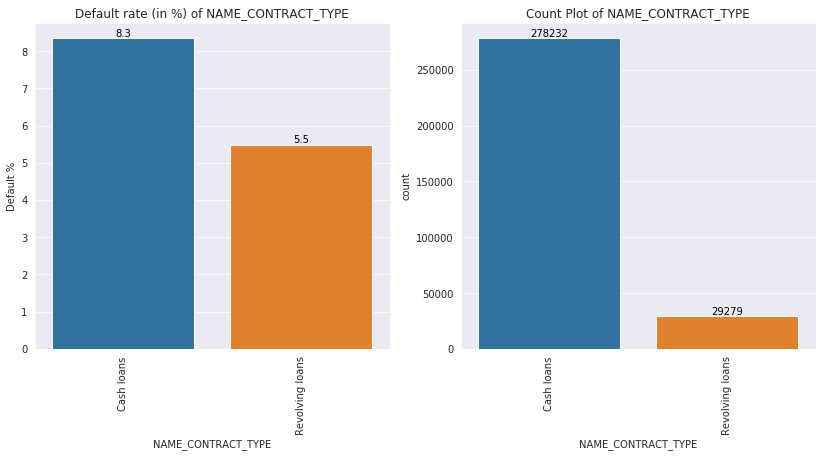

In [29]:
# 9th Column: Name contract type (type of loan)
catper_plots('NAME_CONTRACT_TYPE', df_app)

**Inferences**: 
1. Most applicants are applying for cash loans(90%). Only 10% of customers are applying for revolving loans
2. Revolving loans have a low default rate of 5.5% when compared to all applicants which has a average 8%

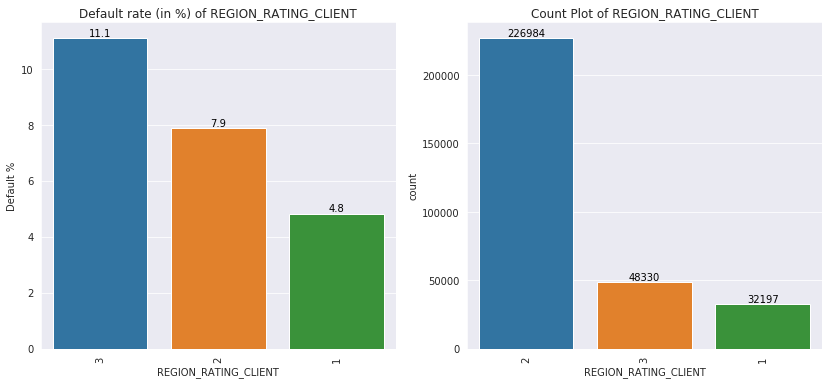

In [30]:
#10th column: Region rating client
catper_plots('REGION_RATING_CLIENT', df_app)

**Inferences**: 
1. Most applicants region are rated 2 (74%) followed by 3 (16%) and rating 1 is around 10%
2. A trend is clearly observable in the above data, the default rate is directly proportional to rating client i.e as the rating increases default rate increases
3. defaul rate has increased from 4.8% (for rating 1) to 11% for rating 3

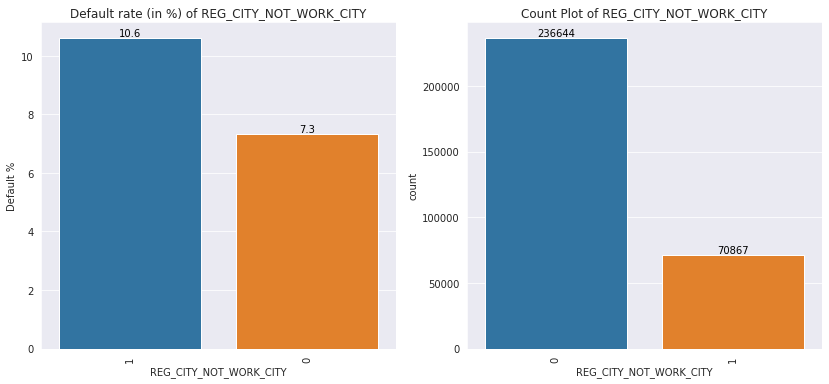

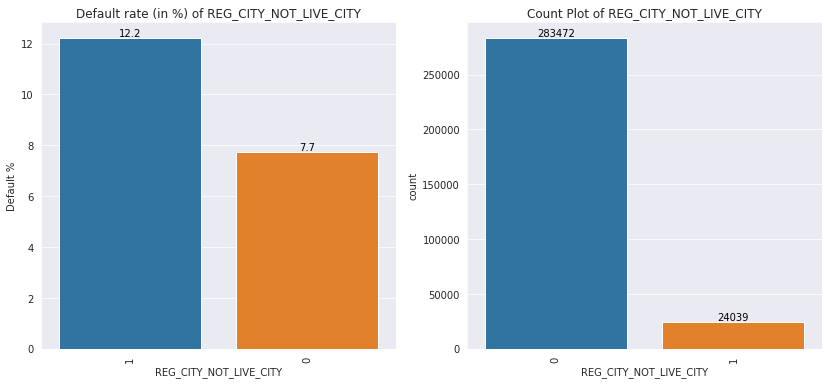

In [31]:
# 11th column : Permanent address not match with work address
catper_plots('REG_CITY_NOT_WORK_CITY', df_app)


#12th Column : permanent address doesnt match with live city
catper_plots('REG_CITY_NOT_LIVE_CITY', df_app)

**Inferences**: 
1. Most applicants have permanent address same as work city (76%), same as live city (92%)
2. Applicants who are not having permanent address same as work city or live city has higher default rates.
3. Applicants who are not having permanent address same as work city is having default rate of 10.6%
4. where as applications who are not having permanent address same as live city is having default rate of 12.2%

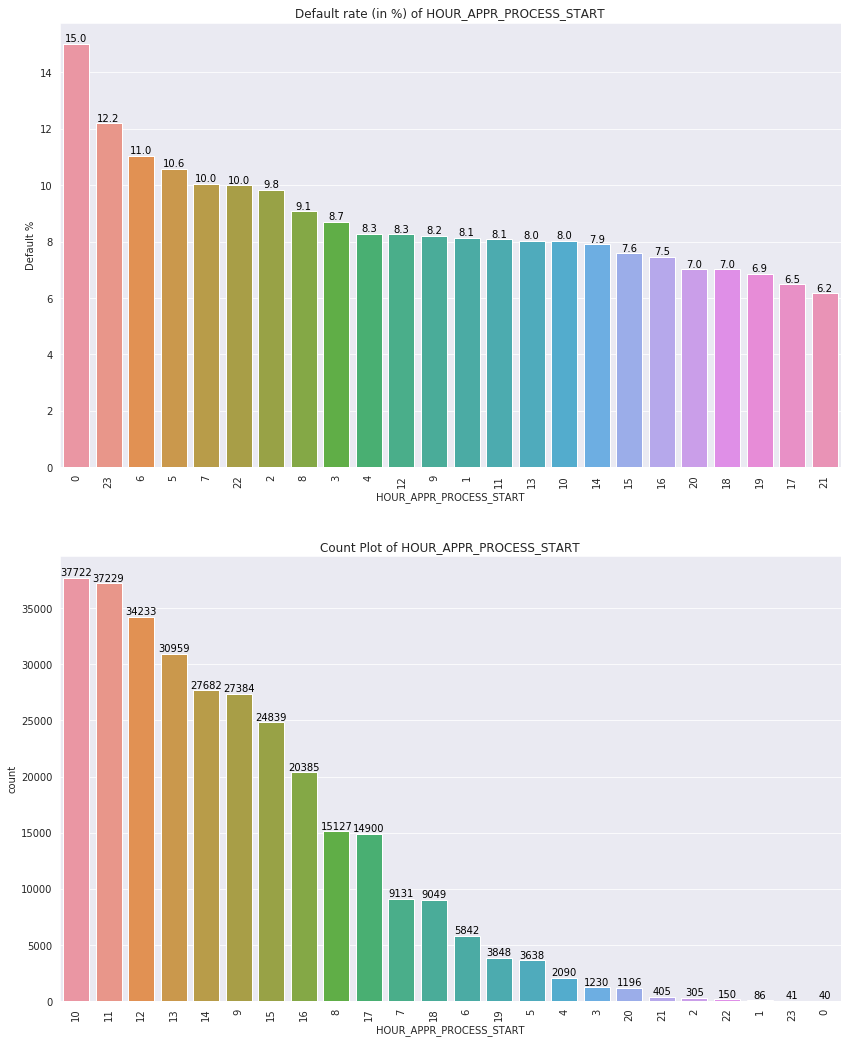

In [32]:
#13th column: Time of application
catper_plots('HOUR_APPR_PROCESS_START', df_app, x = 2, y =1, size = (14,18), annot = 'yes')

**Inferences**: 
1. Most applicants have applied for the loan during normal working hours (i.e 9 to 7 pm)
2. The applicants who apply during 10 PM to till 8 AM are defaulting more. Here the number of applicant applying for the loan is also less

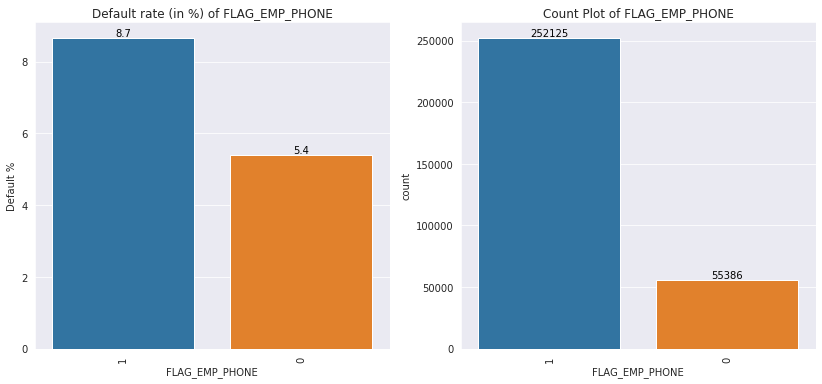

In [33]:
#14th Column: Did client provide employee phone number
catper_plots('FLAG_EMP_PHONE', df_app)

**Inferences**: 
1. Most of the applicants around 82% has provided employer phone number to the bank
2. The applicants who have provided employer phone nos. have more chances to default than the applicants who didnt share phone number

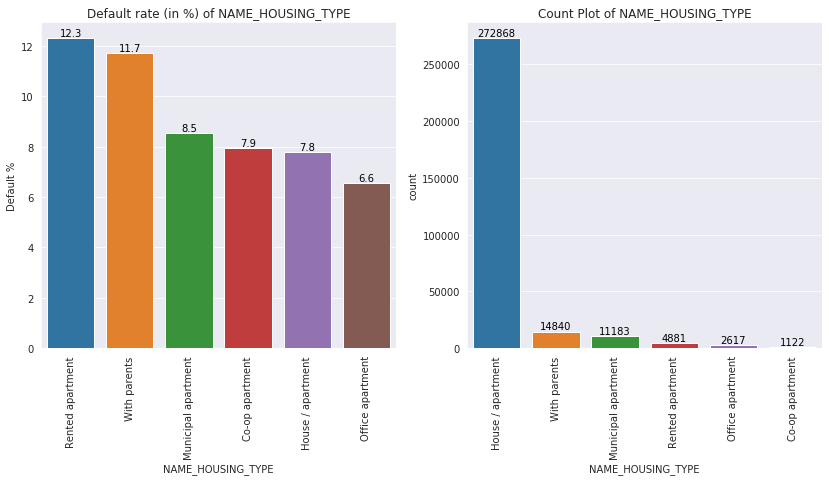

In [34]:
# 15th column : HOUSING TYPE
catper_plots('NAME_HOUSING_TYPE', df_app)

**Inferences**: 
1. Most applicants have housing type of house/apartment (88%)
2. Rent apartment has high default rates of 12% while office apartment has low default rate of 6.6%

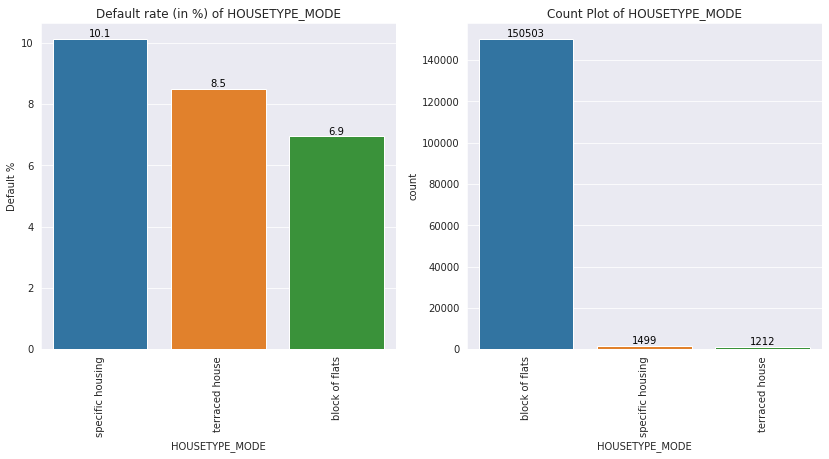

In [35]:
# 16th column : HOUSING TYPE MODE
catper_plots('HOUSETYPE_MODE', df_app)

**Inferences**: 
1. Most applicants have housing type mode of block of flats, folllowed by specific housting
2. Out of the three house types, applicants with specific housing are having a default rate of 10.1% while block of flats have a default rate of 6.9%

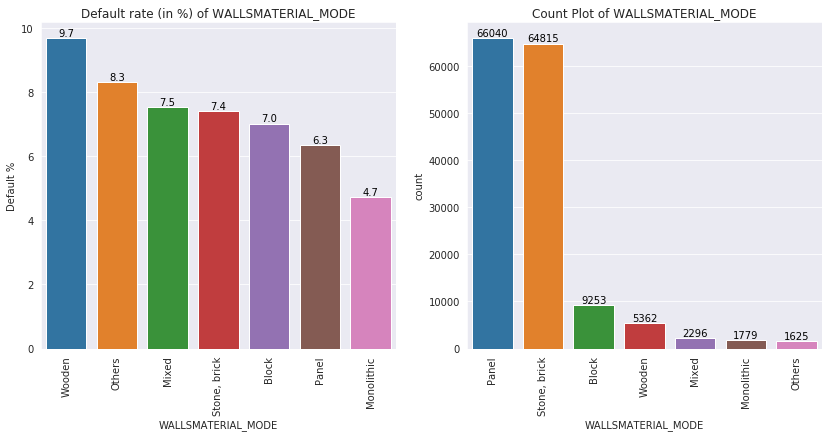

In [36]:
#17th Column
catper_plots('WALLSMATERIAL_MODE', df_app)

**Inferences**: 
1. Most applicants have walls material type of panel, followed by stone, brick, block, wooden etc.
2. Out of the house wall materials, applicants with wooden wall materials are having a default rate of 9.7% % while walls with monolithic materials are having a default rate of 4.7%

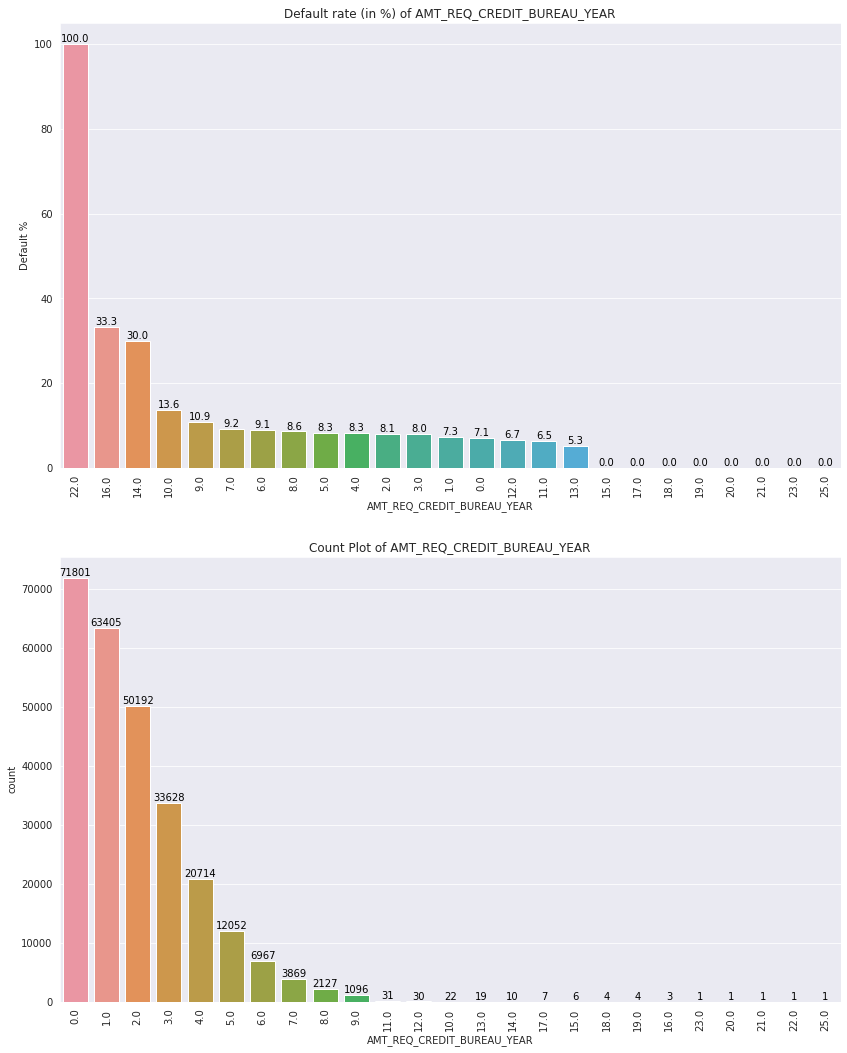

In [37]:
#18th Column
catper_plots('AMT_REQ_CREDIT_BUREAU_YEAR', df_app, x = 2, y =1, size = (14,18), annot = 'yes')

**Inferences**: 
1. Most applicants have sent less than 5 applications to the bureau in last one year (excluding last three months)
2. As the number of applications increase, the default rate increases.

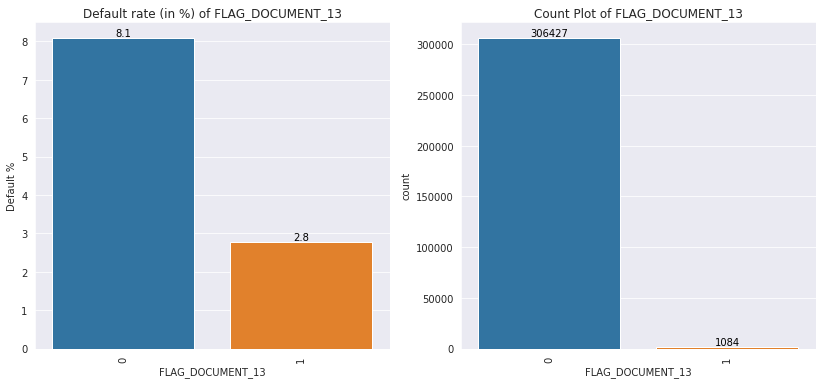

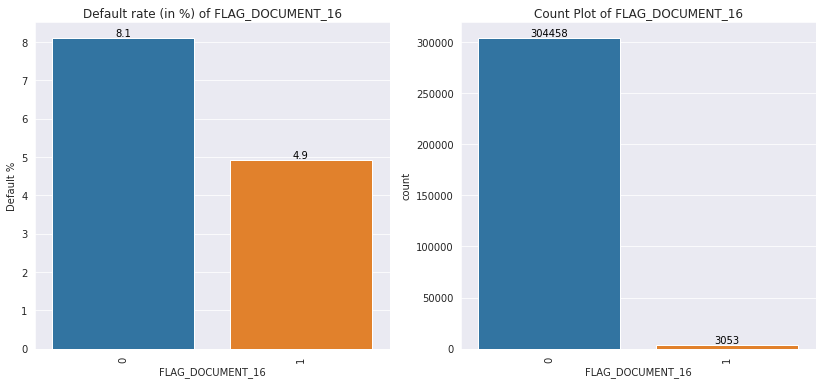

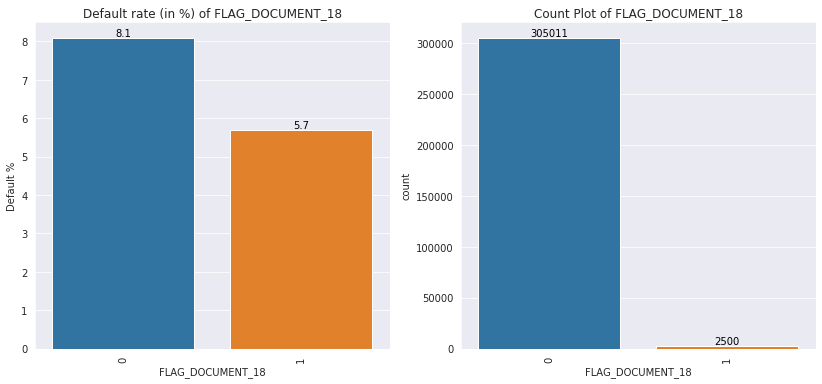

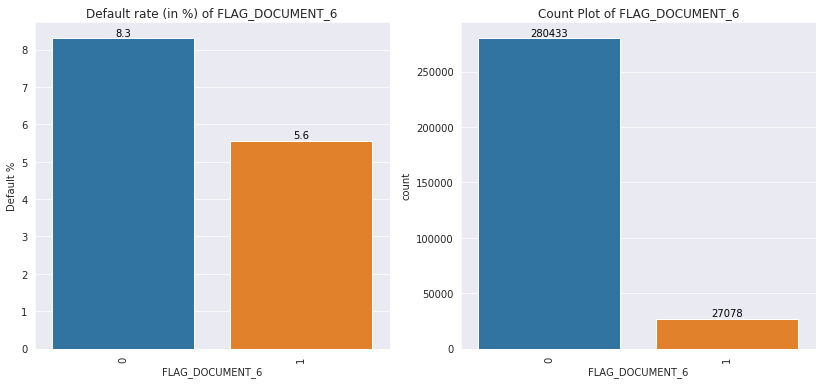

In [38]:
# Univariate and segmented univaraite analysis for flag document columns on the filtered columns
#19th Column
catper_plots('FLAG_DOCUMENT_13', df_app)

#20st Column
catper_plots('FLAG_DOCUMENT_16', df_app)

#21st Column
catper_plots('FLAG_DOCUMENT_18', df_app)

#22nd column
catper_plots('FLAG_DOCUMENT_6', df_app)

**Inferences**: 
1. The applicants who have submitted Document_13, Document 16, Documnent 18 and Document 6 all are having default rate of less than or equal to 6%

### III. Univariate, segmented univariate for numerical columns to identify important numerical variables<a id='III'></a>

**Step No 1:Deriving New columns from the existing**

In [39]:
# deriving new columns from the existing data set
 
df_app['ANNUITY/INCOME'] = df_app['AMT_ANNUITY']/df_app['AMT_INCOME_TOTAL']
df_app['CREDIT/GOODS_PRICE'] = df_app['AMT_CREDIT']/df_app['AMT_GOODS_PRICE']
df_app['ANNUITY/GOODS_PRICE'] = df_app['AMT_ANNUITY']/df_app['AMT_GOODS_PRICE']
df_app['CREDIT/ANNUITY'] = df_app['AMT_CREDIT']/df_app['AMT_ANNUITY']

In [40]:
# Checking number of numerical columns in the data set
df_app_num = df_app.select_dtypes(include = ['number'])

df_app_num.columns

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'ANNUITY/INCOME',
       'CREDIT/GOODS_PRICE', 'ANNUITY/GOODS_PRICE', 'CREDIT/ANNUITY'],
      dtype='object')

**Step No 2: Outliers Identification, removal and Creation of function for univariate and segmented univariate analysiss**

**How to remove outliers**:
1. The distribution highly skewed for columns such as Income, Goods Price, Annuity and Credit which means there are outliers
2. Depending up on the domain, we can remove outliers using IQR. IQR is generally defined as Q75-Q25 which is generally 0.675* std.dev for normal distribution
3. We remove outliers on both sides by considering upperlimit and lower limit for values based on IQR
4. Generally, we use Q3+1.5*(IQR) for upper limit and Q2-1.5*(IQR) for lower limit
5. In this case most of the distriution are right skewed, hence considered only upper limit
6. Also we defined IQR based (QB-QA) based on the distribution graph

In [41]:
# Creating function for treatment of outliers
# Function treats outliers based on IQR range defined (IQR = QB-QA)
# we observed most of the outliers are on the right side so removing outliers that are lying at 4std.dev or Q95+2*IQR
def remove_outliers(column_trt, QA=0.05, QB = 0.95,df = df_app):
    Q5 = df[column_trt].quantile(QA)
    Q95 = df[column_trt].quantile(QB)
    IQR = Q95 - Q5 
    limit = Q95+2*IQR
    df_mod= df[(df[column_trt] <= limit)]
    df_mod = df_mod[[column_trt,'TARGET']]
    return df_mod

In [42]:
def numdist_plots(col, df_app):
    df_def = df_app.loc[df_app['TARGET'] == 1, [col]]
    df_def = df_def[df_def[col].notnull()]
    df_ndef = df_app.loc[df_app['TARGET'] == 0, [col]]
    df_ndef = df_ndef[df_ndef[col].notnull()]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
    
    # creating distplots for defaults and non defaults
    sns.distplot(df_def[col], ax = ax1, hist = False, kde_kws={"color": "r"},hist_kws={"color": "r"}, label = 'Default')
    sns.distplot(df_ndef[col], ax = ax1, hist = False, kde_kws={"color": "g"},hist_kws={"color": "g"}, label = 'Not Default')
    ax1.set_title('Distribution of {}'.format(col))
    
    sns.boxplot(x="TARGET", y=col, data=df_app, ax = ax2)
    ax2.set_title('Box plot for TARGET for {}'.format(col))
    ax2.set_xticklabels( ('Not Default', 'Default'))
    
    sns.boxplot(x="TARGET", y=col, data=df_app, ax = ax3)
    ax3.set_title('log scale Box plot for TARGET for {}'.format(col))
    ax3.set_xticklabels( ('Not Default', 'Default'))
    ax3.set_yscale('log')
    plt.show()
    df_q = df_def.quantile([0.25, 0.5, 0.75,0.95])
    df_q.rename(columns = {col: 'default'}, inplace = True)
    df_q ['not default'] = df_ndef.quantile([0.25, 0.5, 0.75,0.95])
    df_q.index.name = 'quartile'
    return df_q

def univaraite_bin(col, df_app, bins = 10):
    df_def = df_app.loc[df_app['TARGET'] == 1, [col]]
    df_def = df_def[df_def[col].notnull()]
    df_ndef = df_app.loc[df_app['TARGET'] == 0, [col]]
    df_ndef = df_ndef[df_ndef[col].notnull()]
    fig, (ax1,ax2) = plt.subplots(1,2, figsize =(12,6))
    sns.distplot(df_def[col], bins = 10, kde = False, ax = ax1)
    ax1.set_title('histogram - defaults of {}'.format(col))
    sns.distplot(df_ndef[col], bins = 10, kde = False, ax = ax2)
    ax2.set_title('histogram - not defaults of {}'.format(col))

In [43]:
# dividining the entire columns into three groups - amt_columns, day_columns & property_columns
amt_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','ANNUITY/INCOME', 'CREDIT/GOODS_PRICE', 'ANNUITY/GOODS_PRICE',
             'CREDIT/ANNUITY', 'REGION_POPULATION_RELATIVE','OWN_CAR_AGE','EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']

property_columns =  ['APARTMENTS_MODE', 'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE','COMMONAREA_MODE', 
                     'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 
                     'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
                     'TOTALAREA_MODE']
day_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']


**Step No 3: Analysis on each column and inferences from each numerical column**

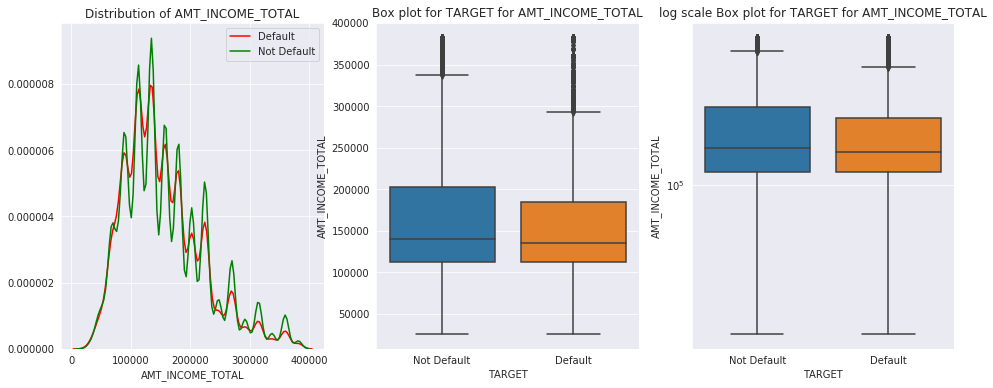

default  not default
quartile                       
0.25      112500.0     112500.0
0.50      135000.0     139500.0
0.75      184500.0     202500.0
0.95      270000.0     292500.0

In [44]:
# amt_columns : Total income of applicant
col = amt_columns[0]
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. From the distplots and box plots, we observe that q2 and q3 of defaults occur at low income values than non-defaults
2. Therefore, majority of the defaults are from low income. Aprox 95% of defaults occur at income less than 2,70,000
3. Low income people tend to have more defaults

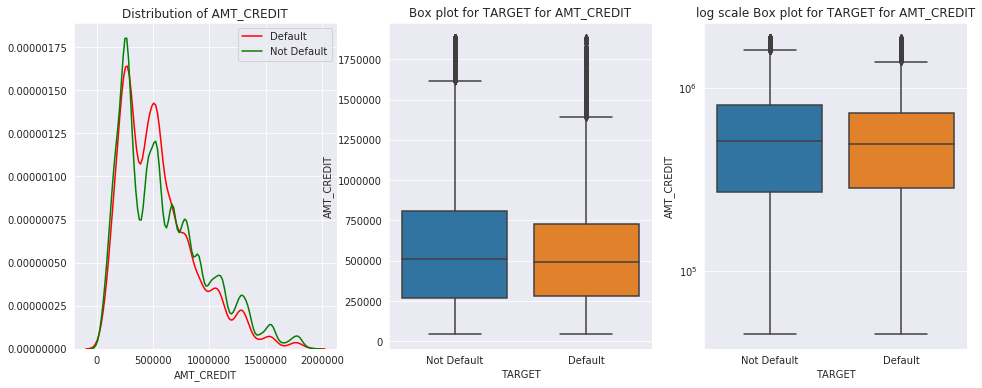

default  not default
quartile                        
0.25       284400.0     270000.0
0.50       495000.0     509602.5
0.75       728460.0     808650.0
0.95      1235862.0    1319269.5

In [45]:
# AMOUNT CREDIT
col = amt_columns[1]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(QA-QB)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. From the distplots and box plots, we observe that only q3 of defaults occur at low credit values than non-defaults.
2. Therefore, majority of the defaults are from low credit values. Approx 95% of defaults occur at credit less than 1235862 

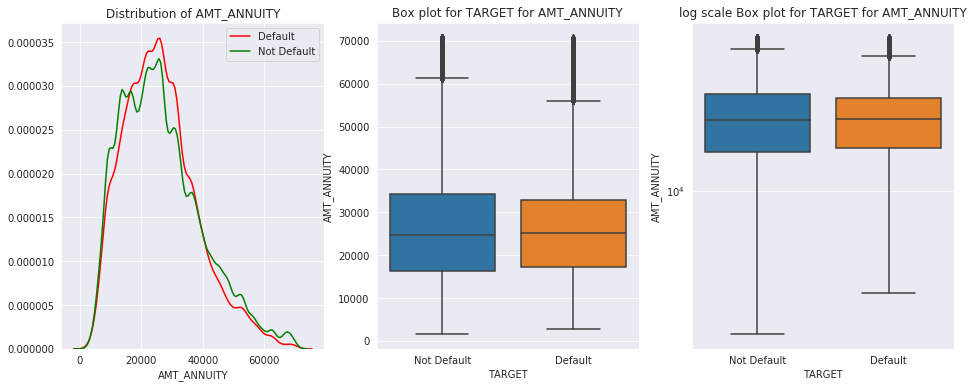

default  not default
quartile                       
0.25      17300.25      16375.5
0.50      25195.50      24718.5
0.75      32809.50      34335.0
0.95      48871.35      51948.0

In [46]:
# AMOUNT ANNUITY OF THE APPLICANT
col = amt_columns[2]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. For annuity, we observe that both default and not default distribution is almost similar
2. Therefore Annuity amount doesnt impact default rates

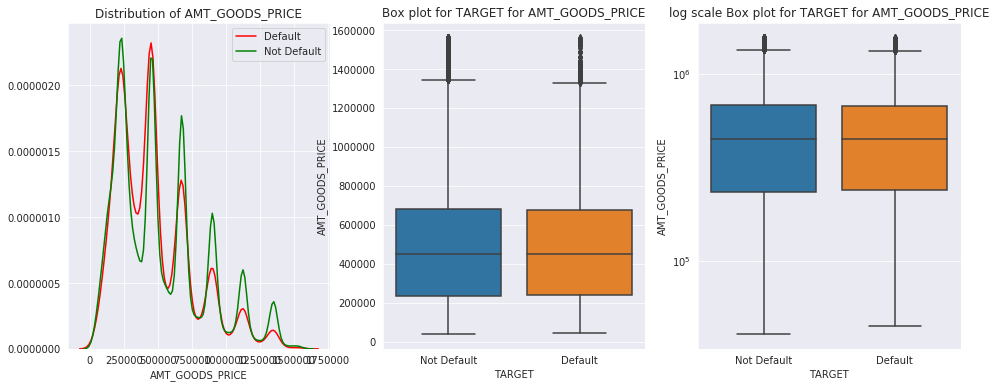

default  not default
quartile                        
0.25       238500.0     234000.0
0.50       450000.0     450000.0
0.75       675000.0     679500.0
0.95      1106775.0    1129500.0

In [47]:
# GOODS PRICE
col = amt_columns[3]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. For goods price, we observe that both default and not default distribution is almost similar
2. Therefore goods price amount doesnt impact default rates

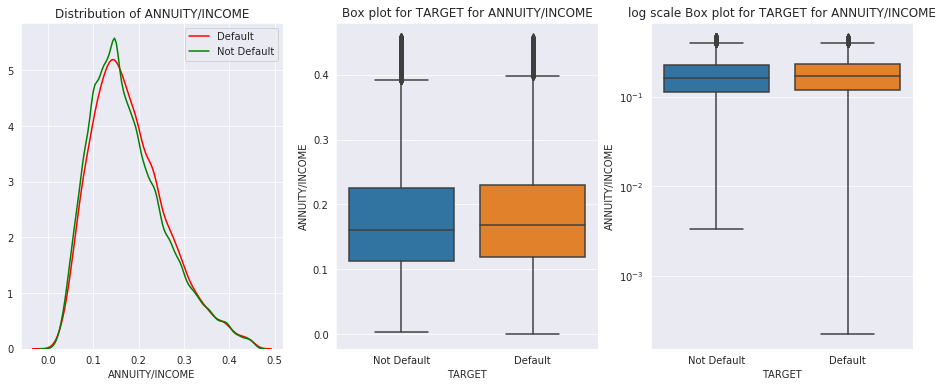

default  not default
quartile                       
0.25      0.119320     0.113357
0.50      0.167980     0.160978
0.75      0.230767     0.224929
0.95      0.337976     0.337850

In [48]:
# ANNUITY/INCOME: what is the annuity % interms of income of the applicant
col = amt_columns[4]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. For Annuity/Income, we observe that both default and not default distribution is almost similar
2. So, Annuitu/Income doesnt impact default rates majorly

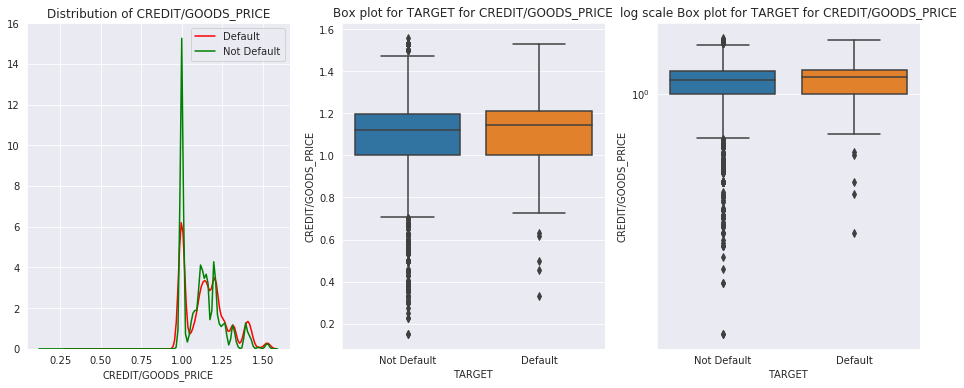

default  not default
quartile                       
0.25      1.000000       1.0000
0.50      1.145200       1.1188
0.75      1.211202       1.1980
0.95      1.422396       1.3960

In [49]:
# CREDIT/GOODS PRICE: Ratio of the loan amount to goods price (high ratio means taking loan more than required)
col = amt_columns[5]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. For Credit/Goods price, we observe that both default is slightly having higher ratio across the distribution (q2,q3,q4) compared to non-defaults
2. So having high credit/Goods price may lead to high defaults

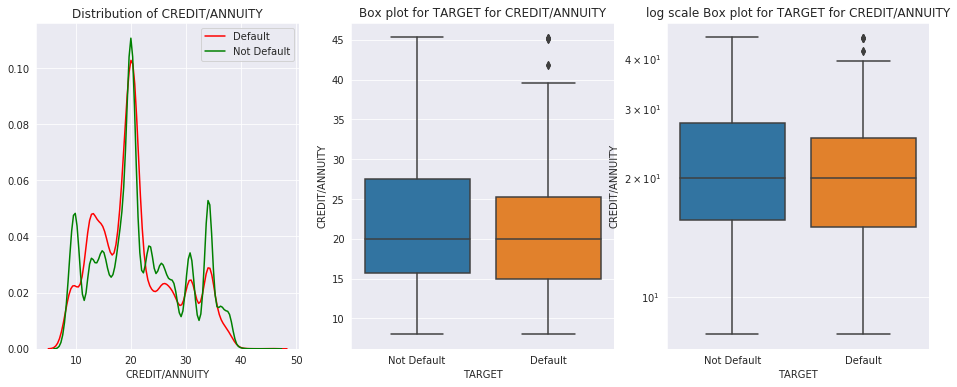

default  not default
quartile                        
0.25      14.964086    15.649452
0.50      20.000000    20.000000
0.75      25.217130    27.551388
0.95      34.103633    34.658041

In [50]:
# CREDIT /ANNUITY: Indicates No. of installments or term of the loan
col = amt_columns[7]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**: 
1. For CREDIT/ANNUITY which indicates the term or number of installments of the loan, the distribution is similar till q2, but in the q3 region the defaults are high
2. so there may be change that loans in the ratio of 20 to 25 may default more when compared to other CREDIT/ANNUITY ratios and the applicants have high tenure are defaulting less

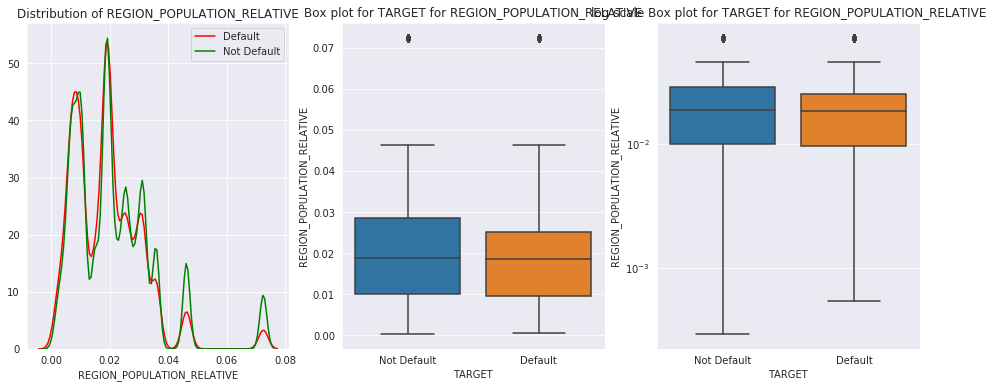

default  not default
quartile                       
0.25      0.009630     0.010006
0.50      0.018634     0.018850
0.75      0.025164     0.028663
0.95      0.035792     0.046220

In [51]:
# REGION_POPULATION: High number indicates high population
col = amt_columns[8]
# since the column is normailzed no need of removing any outliers
def_per = numdist_plots(col, df_app)
def_per

**Inferences**
1. For relative population, the distibution is similar till q2, but in the q3,q4 region the region population is lower for defaults when compared to not defaults
2. so loans having population factors in the region of 0.025 to 0.035 may have higher default rates and regions above q3 have low defaults rate

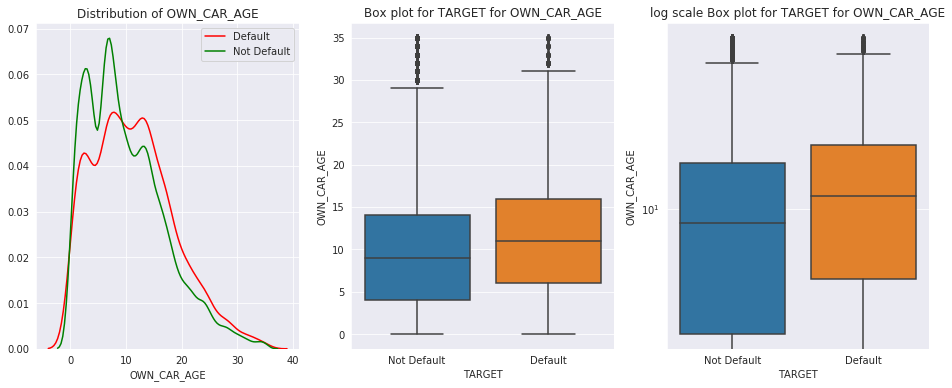

default  not default
quartile                      
0.25          6.0          4.0
0.50         11.0          9.0
0.75         16.0         14.0
0.95         25.0         24.0

In [52]:
# OWN CAR Age: age of the car owned
col = amt_columns[9]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(Q75-Q5)
df_mod = remove_outliers(col, QA=0.25, QB = 0.75,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**
1. For cars own age, from q1 and q2 low defaults are observed for applicants having low car ages and applicants having car ages having high car ages are defaulting more

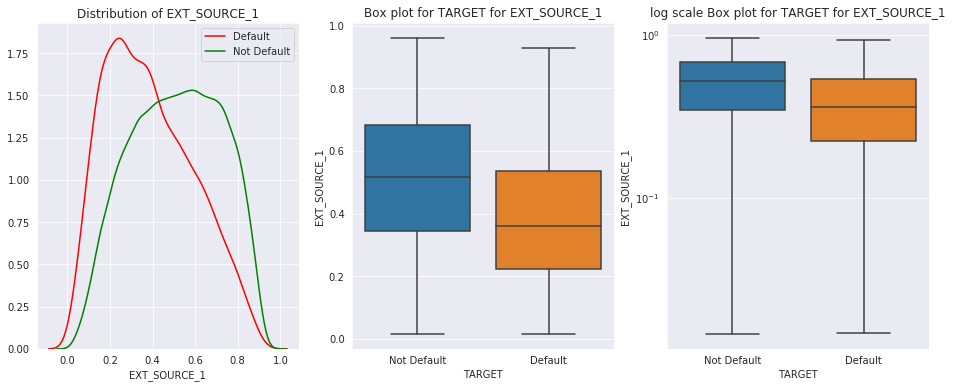

default  not default
quartile                       
0.25      0.221847     0.345430
0.50      0.361675     0.517452
0.75      0.537508     0.682839
0.95      0.758009     0.835143

In [53]:
# EXT_SOURCE_1: It may be credit score by a external source
col = amt_columns[10]
# since the column is normailzed no need of removing any outliers
def_per = numdist_plots(col, df_app)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. The above point and graphs give clear indication that applicants having low ext_source score are defulating more and the applicants having high external score are not defaulting more
2. Particularly customers having score of less than 0.2 are defaulting more

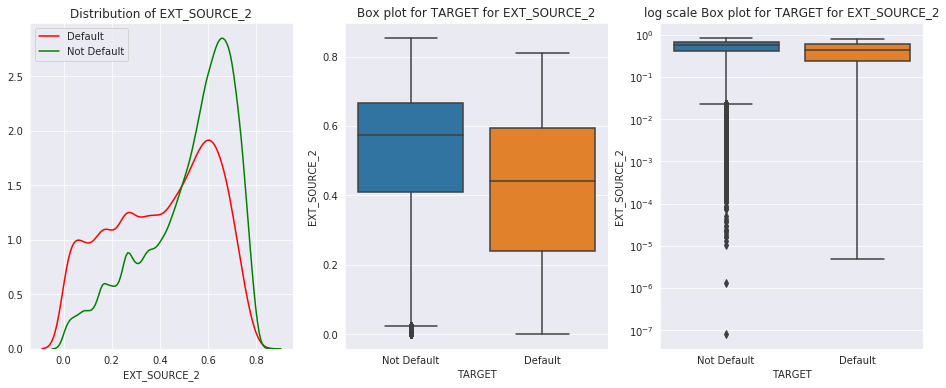

default  not default
quartile                       
0.25      0.238568     0.409787
0.50      0.440381     0.573905
0.75      0.594190     0.667705
0.95      0.709450     0.749528

In [54]:
# EXT_SOURCE_2 It may be credit score by a external source
col = amt_columns[11]
# since the column is normailzed no need of removing any outliers
def_per = numdist_plots(col, df_app)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. The above graphs give clear indication that applicants having low ext_source score are defaulting more and the applicants having high external score are not defaulting more
2. Particularly customers having score of less than 0.4 are defaulting more

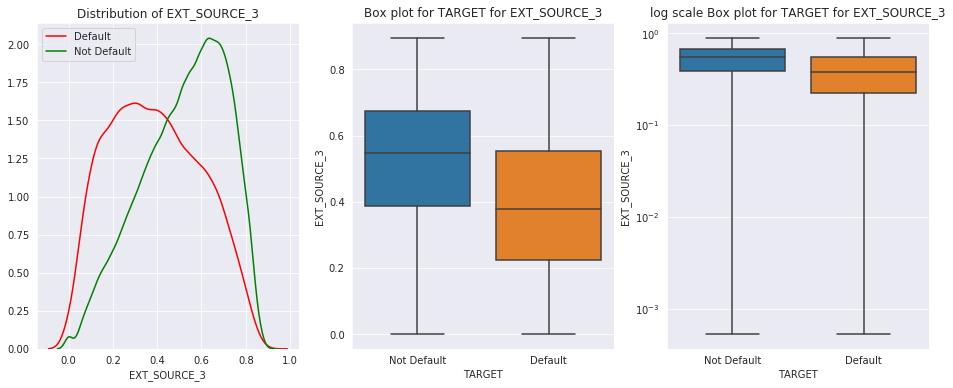

default  not default
quartile                       
0.25      0.223831     0.385915
0.50      0.379100     0.546023
0.75      0.553165     0.673830
0.95      0.739412     0.789880

In [55]:
# EXT_SOURCE_3 It may be credit score by a external source
col = amt_columns[12]
# since the column is normailzed no need of removing any outliers
def_per = numdist_plots(col, df_app)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. The above graphs give clear indication that applicants having low ext_source score are defaulting more and the applicants having high external score are not defaulting more
2. Particularly customers having score of less than 0.4 are defaulting more

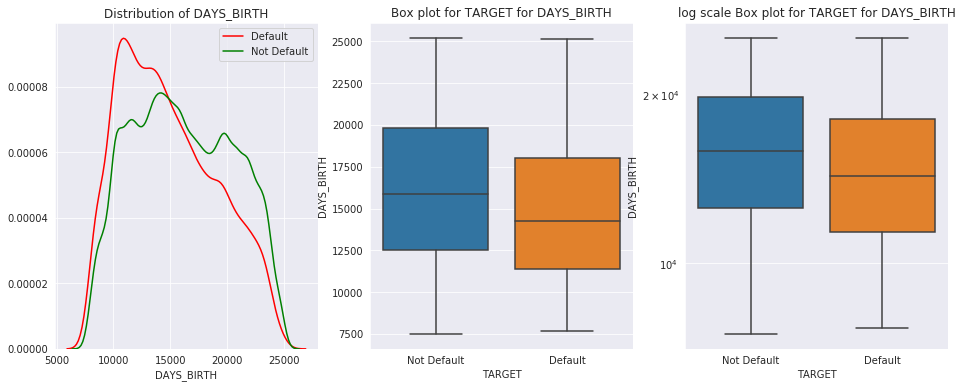

default  not default
quartile                      
0.25      11396.0     12536.00
0.50      14282.0     15877.00
0.75      18037.0     19793.75
0.95      22489.0     23246.00

In [56]:
# DAYS_BIRTH : Indicate the age of the person
col = day_columns[0]
def_per = numdist_plots(col, df_app)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. This means the people with low age are defaulting more and the people with high age are defaulting less
3. Applicants with age less than approx. 15000 days (40 years) are defaulting more where as applicants with age greater than age 40 are defaulting less

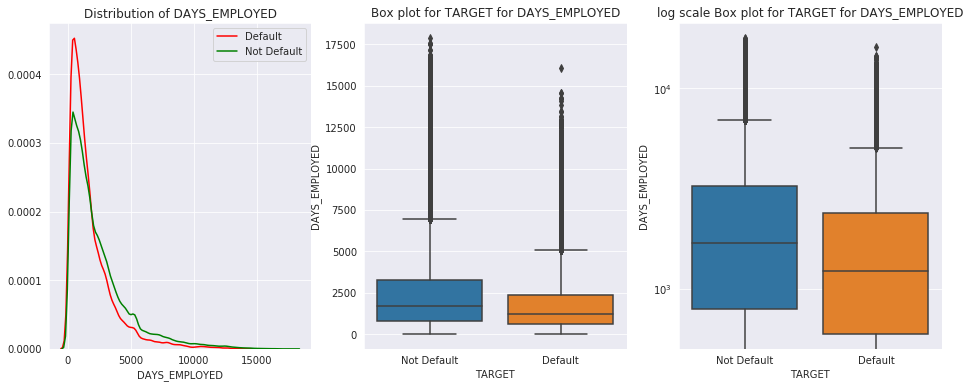

default  not default
quartile                      
0.25        594.0        789.0
0.50       1230.0       1691.0
0.75       2380.5       3254.0
0.95       5417.3       7408.0

In [57]:
# DAYS_Employed: current job duration
col = day_columns[1]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(QB-QA)
df_mod = remove_outliers(col, QA=0.05, QB = 0.95,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. This means the applicants who joined the job recently or having joined the job less than 3 years are defaulting more and the applicants who had joined the job more than 3 years

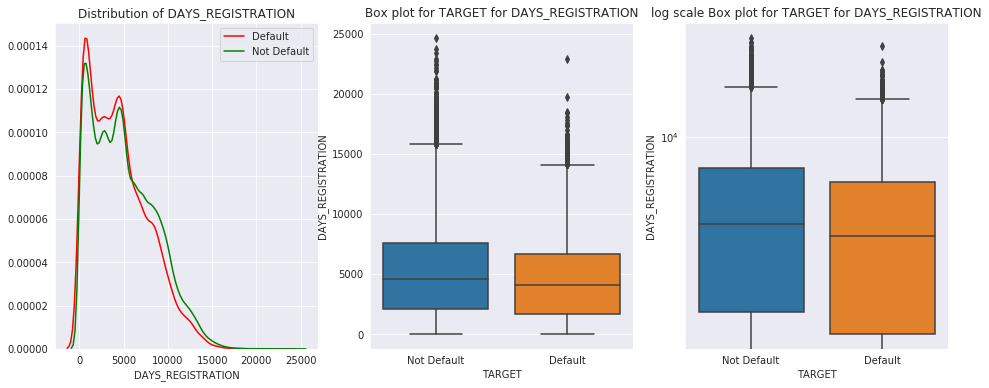

default  not default
quartile                      
0.25       1671.0       2045.0
0.50       4056.0       4544.0
0.75       6646.0       7550.0
0.95      10604.4      11477.0

In [58]:
# DAYS_REGISTRATIOn : days before registration changed
col = day_columns[2]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(QB-QA)
df_mod = remove_outliers(col, QA=0.05, QB = 0.95,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default lower than non-default
2. This means the applicants who changed the registration recently are defaulting more than the applicants who changed the registration long back

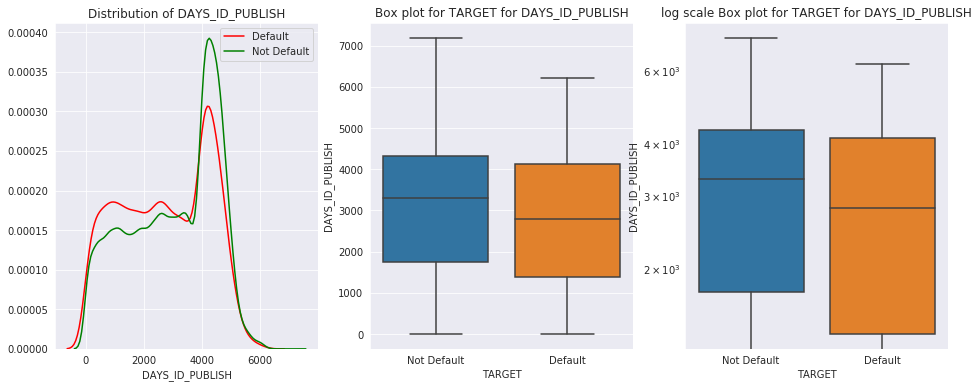

default  not default
quartile                      
0.25       1392.0       1755.0
0.50       2797.0       3295.0
0.75       4119.0       4313.0
0.95       4861.0       4949.0

In [59]:
# ID Publish : days before ID changed
col = day_columns[3]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(QB-QA)
df_mod = remove_outliers(col, QA=0.05, QB = 0.95,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are lower than non-default
2. This means the applicants who changed the ID recently are defaulting more than the applicants who changed theID long back
3. To be specific the default rates are high close to 15% to 20% for the for applicants who changed the ID below 10 years back

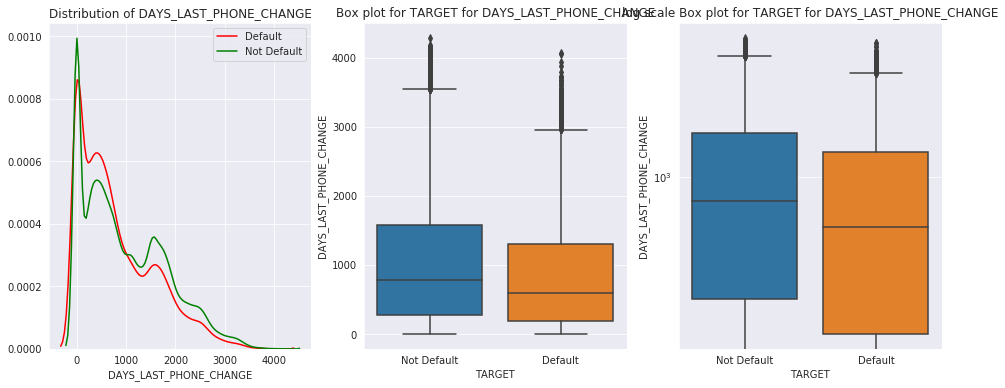

default  not default
quartile                      
0.25        194.0        281.0
0.50        594.0        776.0
0.75       1301.0       1586.0
0.95       2320.0       2535.0

In [60]:
# Days last change phone
col = day_columns[4]
# As the data is skewed on the right side, remove outliers on the upperside i.e greater than Q95+2*(QB-QA)
df_mod = remove_outliers(col, QA=0.05, QB = 0.95,df = df_app)
def_per = numdist_plots(col, df_mod)
def_per

**Inferences**
1. The q1, q2 and q3 quartile numbers of default are much lower than non-default
2. This means the applicants who changed phone recently are defaulting more than others

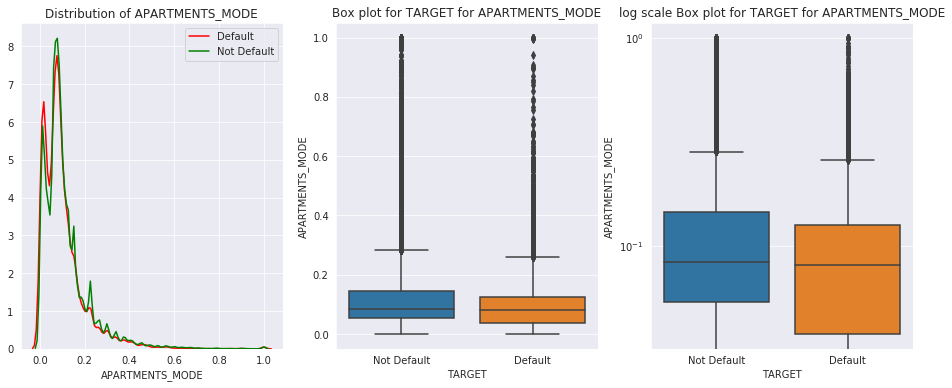

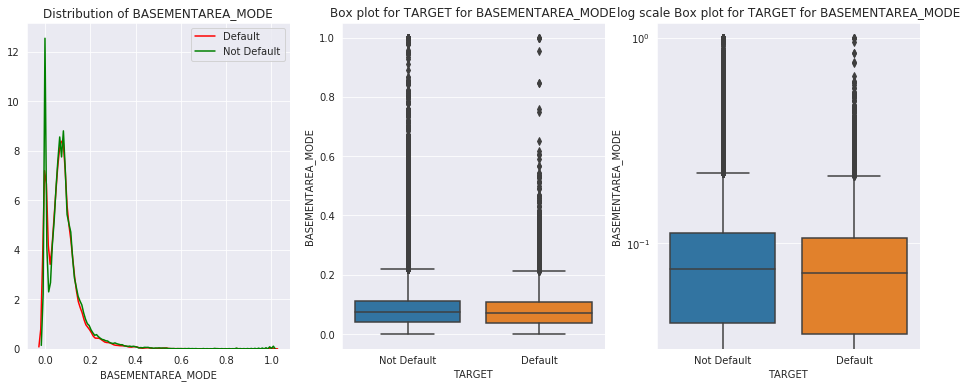

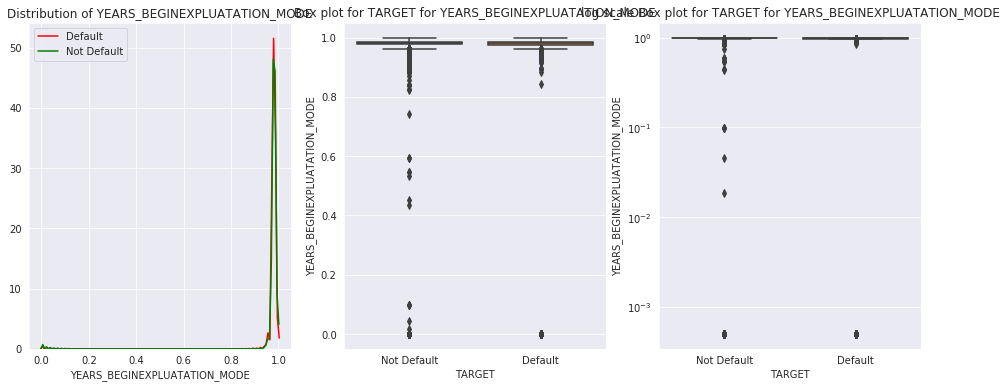

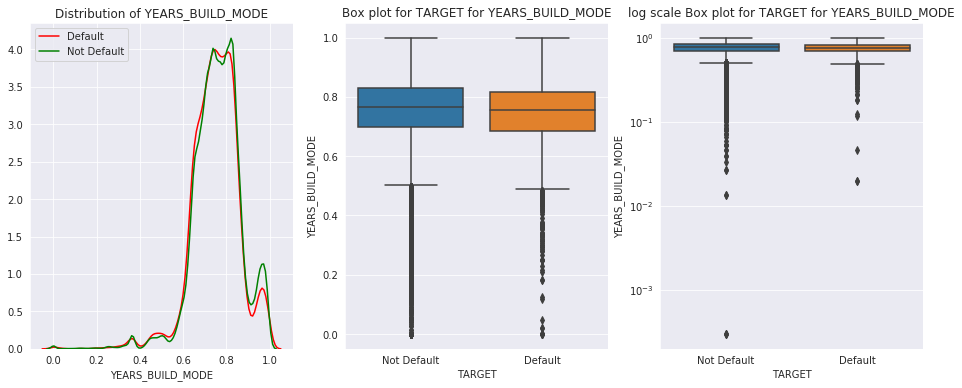

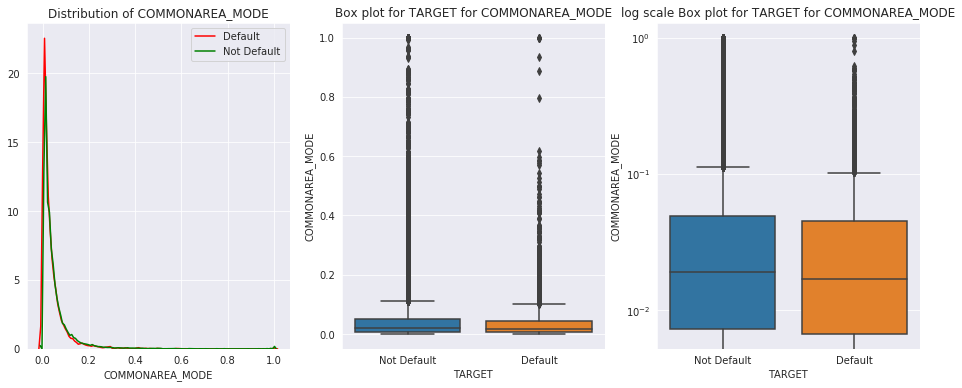

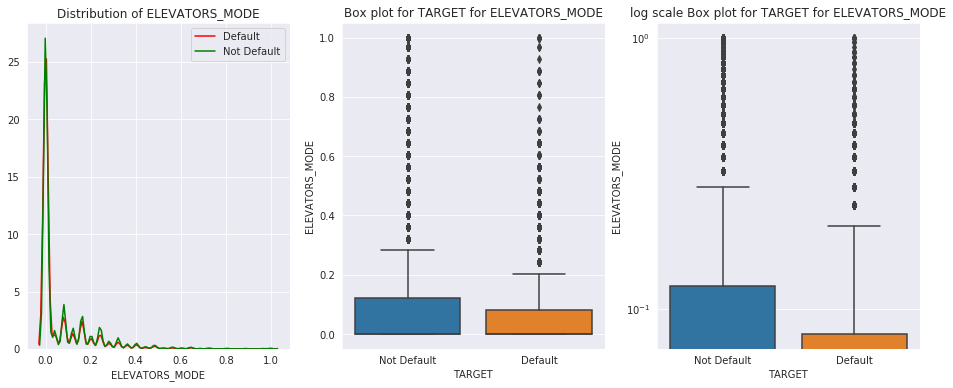

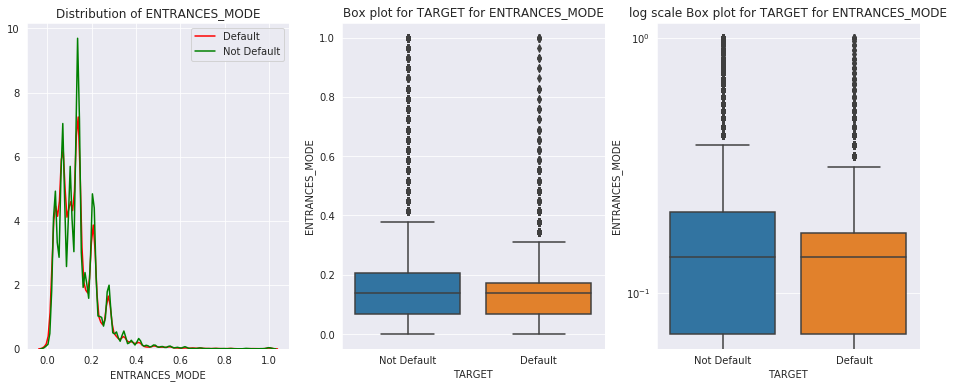

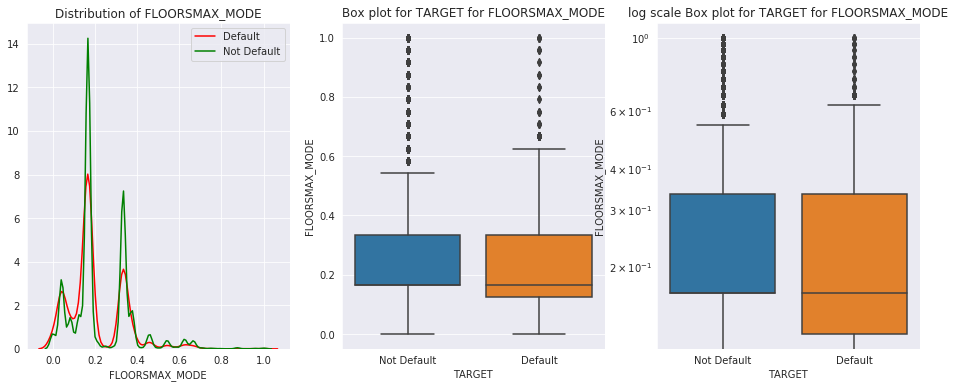

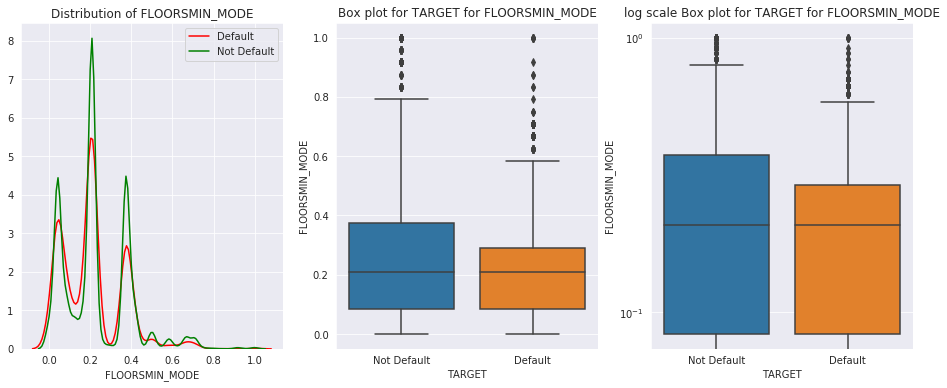

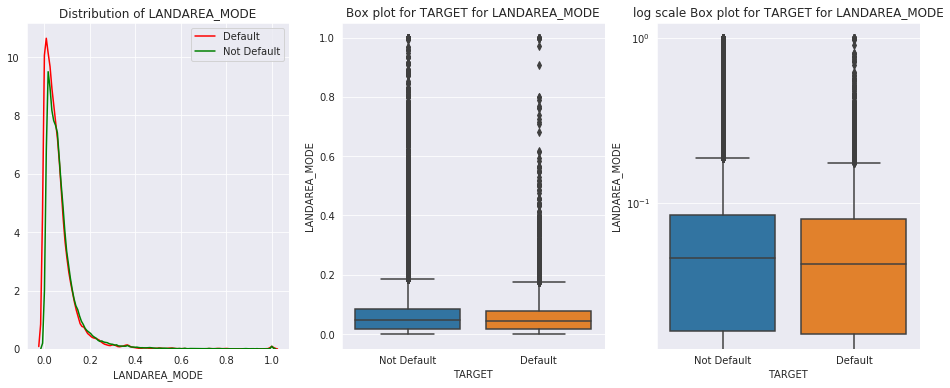

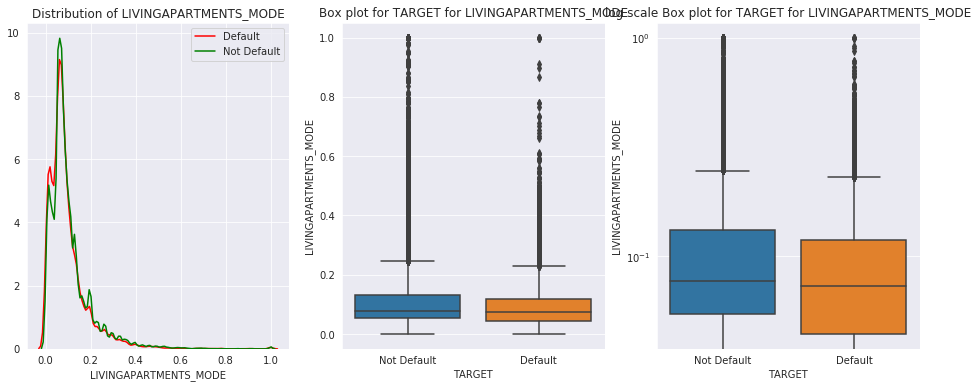

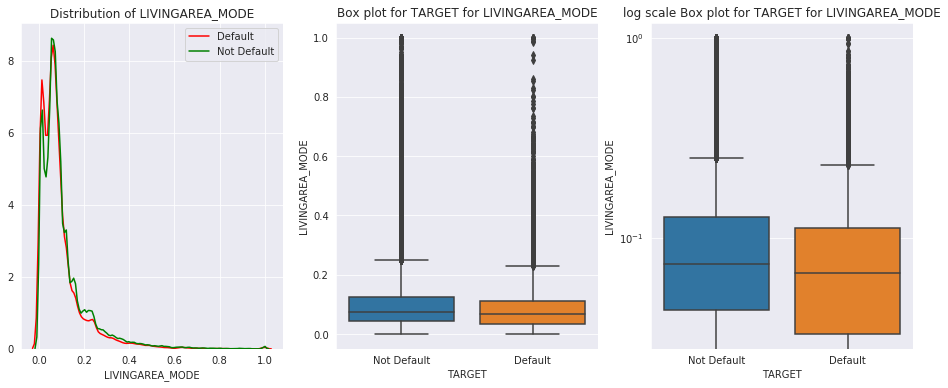

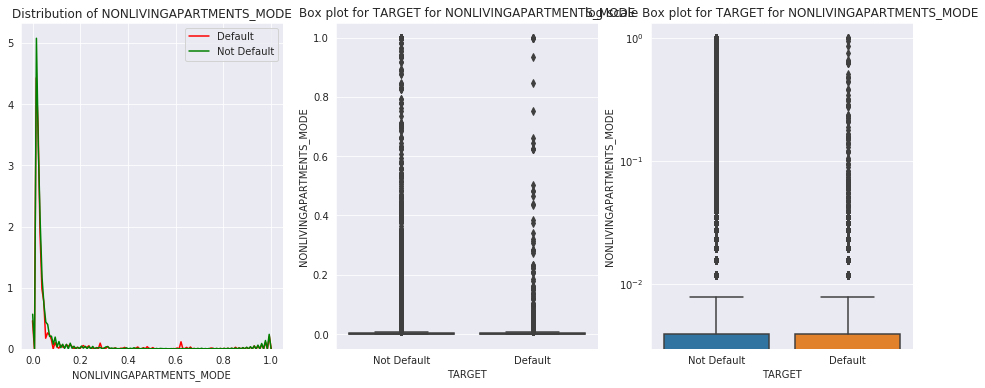

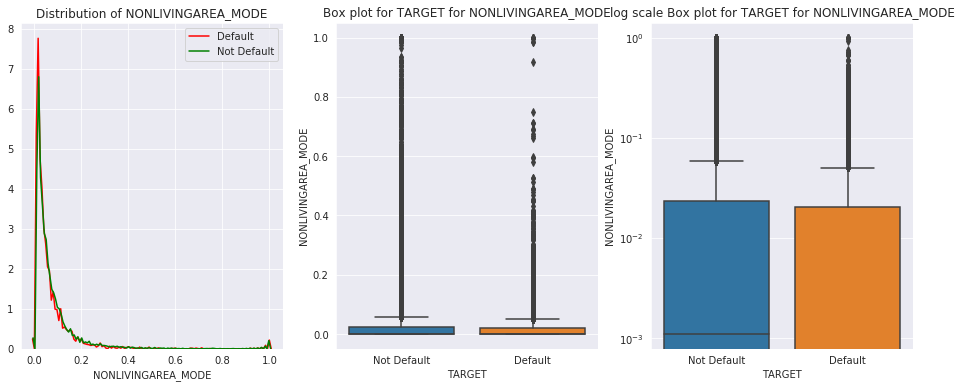

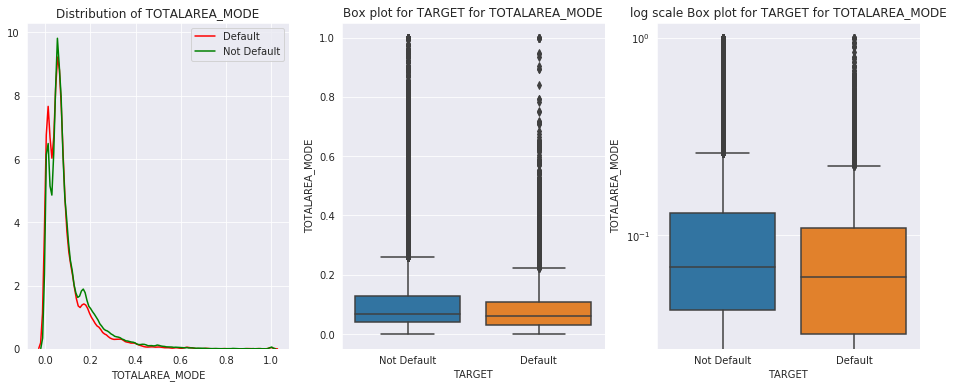

In [61]:
# Checking distrbutions for any pattern in property columns
for col in property_columns:
     numdist_plots(col, df_app)

**Inferences for property columns**
1. Applicants having low_apparatments may have high defalut rates but the difference may not be that high
2. Applicants having less elevetars, less entrances, less total area, less min floors, less max floors also have hgih default rates but the difference may not be that high
3. Other factors doesnt effect default rates

### IV. Analyzing previous application dataset for important variables<a id='IV'></a>

**Step no 1. Importing Previous Application dataset and understanding**
1. **Please place the dataset in the same location of this file. Else update path of the file**

In [62]:
# importing the previous application dataset
df_pre = pd.read_csv('previous_application.csv')

# total no of rows of data set
df_pre.shape

(1670214, 37)

In [63]:
df_pre.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [64]:
df_pre.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          

**Step No 2. Identifying duplicates, nan values, invalid values and treating invalid values**

In [65]:
# nan % in columns
nan_per = (df_pre.isnull().sum()/len(df_pre)*100).sort_values(ascending = False)
nan_per = nan_per[nan_per > 0]
print('no. of nan columns is {}'.format(len(nan_per)))
print(nan_per)

# we have 16 columns which have nan values

no. of nan columns is 16
RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
RATE_DOWN_PAYMENT            53.636480
AMT_DOWN_PAYMENT             53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64


In [66]:
# dropping Rate_INTEREST_PRIVILAGED and Rate_interest_primary columns as they contain high nan values
for col in df_pre.columns:
    if (col.find('RATE_INTEREST') != -1):
        df_pre.drop(col,axis = 1, inplace = True)
df_pre.shape

(1670214, 35)

In [67]:
# unique values
df_pre.nunique().sort_values()

# no duplicates since the SK_ID_PREV matches with the length of previous dataframe

NFLAG_INSURED_ON_APPROVAL            2
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_STATUS                 4
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
NAME_TYPE_SUITE                      7
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE                     2873
DAYS_FIRST_DUE                    2892
DAYS_DECISION            

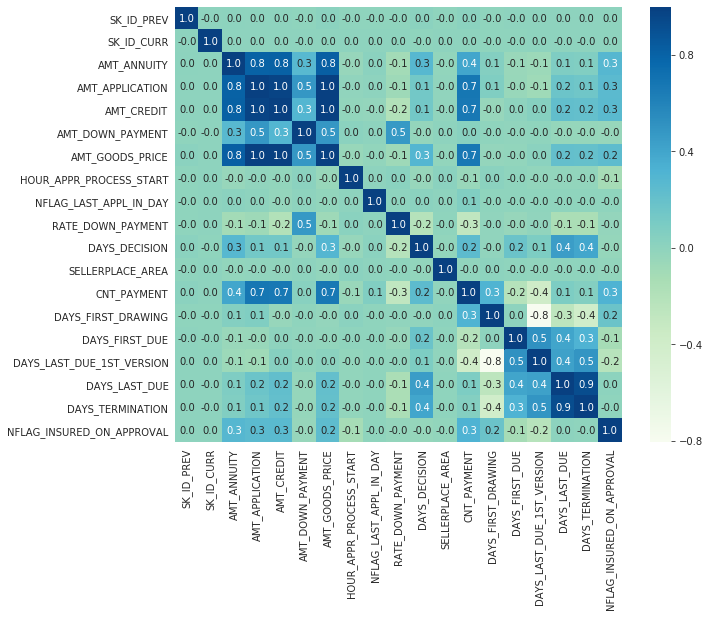

In [68]:
# identifying correlation between numerical variables
plt.figure(figsize = (10,8))
sns.heatmap(df_pre.corr(), cmap = 'GnBu', annot = True, fmt = '0.1f')
plt.show()

# amount application, amoun credit and amout and amount goods price are highly correlated
# Days termination and days last are also correlated

In [69]:
# creating two dataframes for numerical and object columns

df_pre_num = df_pre.select_dtypes(include = ['number'])
print('Number of numerical columns is {}'.format(len(df_pre_num.columns)))

df_pre_obj = df_pre.select_dtypes(include = ['object'])
print('Number of categorical columns is {}'.format(len(df_pre_obj.columns)))

Number of numerical columns is 19
Number of categorical columns is 16


In [70]:
# treating invalid values and replacing by them nan
for col in list(df_pre.columns): 
    if (col.find('DAYS') != -1) and ((col.find('FIRST') != -1) or (col.find('LAST') != -1) or (col.find('TERMINA') != -1)):
        df_pre[col] = df_pre[col].replace(365243, np.nan)
        
# converting hours , 'SK_ID_PREV' and 'SK_ID_CURR' into objects
for col in list(df_pre.columns): 
    if (col.find('HOUR_APPR_PROCESS_START') != -1): 
        df_pre[col] = df_pre[col].astype('object')
        
    if col in ['SK_ID_PREV','SK_ID_CURR']:
        df_pre[col] = df_pre[col].astype('object')

df_pre['FLAG_LAST_APPL_PER_CONTRACT'] = df_pre['FLAG_LAST_APPL_PER_CONTRACT'].replace('Y', 1)
df_pre['FLAG_LAST_APPL_PER_CONTRACT'] = df_pre['FLAG_LAST_APPL_PER_CONTRACT'].replace('N', 0)
df_pre['FLAG_LAST_APPL_PER_CONTRACT'] = df_pre['FLAG_LAST_APPL_PER_CONTRACT'].astype('int64')      

#replacing 'XNA', 'XAP' with nan values
df_pre = df_pre.replace('XNA', np.nan)
df_pre = df_pre.replace('XAP', np.nan)

In [71]:
df_pre_num = df_pre.select_dtypes(include = ['number'])
print('Number of numerical columns is {}'.format(len(df_pre_num.columns)))

df_pre_obj = df_pre.select_dtypes(include = ['object'])
print('Number of categorical columns is {}'.format(len(df_pre_obj.columns)))

Number of numerical columns is 20
Number of categorical columns is 15


**Step No 3. Univaraite analysis for categorical and numerical variables**

In [72]:
#  Creating function for count plot of univar categorical columns
def countplot(df,i, x =10, y =6):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (x,y))
    col = univar_cat_col[i]
    sns.countplot(x = col, data = df_pre, ax = ax1, order = df[col].value_counts().index)
    for nr, p in enumerate(ax1.patches):
        height = np.nan_to_num(p.get_height(), 0)
        ax1.text(p.get_x() + p.get_width()*0.5, p.get_y() + height, '{:.0f}'.format(height), 
                     fontsize=10, color='black', ha='center', va='bottom') 
    ax1.set_title('Countplot of {}'.format(col))
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    temp_df = df[col].value_counts()
    total = df[col].value_counts().sum()
    temp_df = temp_df.to_frame()/total*100
    sns.barplot(x = temp_df.index, y = col, data = temp_df, ax = ax2)
    ax2.set_title('percentage plot of {}'.format(col))
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    for nr, p in enumerate(ax2.patches):
        height = np.nan_to_num(p.get_height(), 0)
        ax2.text(p.get_x() + p.get_width()*0.5, p.get_y() + height, '{:.0f}'.format(height), 
                     fontsize=10, color='black', ha='center', va='bottom') 
    
    plt.show()

#  Creating function for distplot for numerical columns
def dist_numplot(df, col):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (16,6))
    temp_df = df.loc[df[col].notnull(), [col]]
    sns.distplot(temp_df[col],ax = ax1)
    ax1.set_title('Distribution plot of {}'.format(col))
    
    sns.boxplot(y = col, data = temp_df, ax = ax2)
    ax2.set_title('Box plot of {}'.format(col))
    
    sns.boxplot(y = col, data = temp_df, ax = ax3)
    ax3.set_title('log scale Box plot of {}'.format(col))
    ax3.set_yscale('log')
    
    plt.show()

In [73]:
#  based on understanding of pre_application data and utilization for the target variable (default or not default)
univar_cat_col = ['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON',
                  'NAME_CLIENT_TYPE', 'NFLAG_INSURED_ON_APPROVAL']

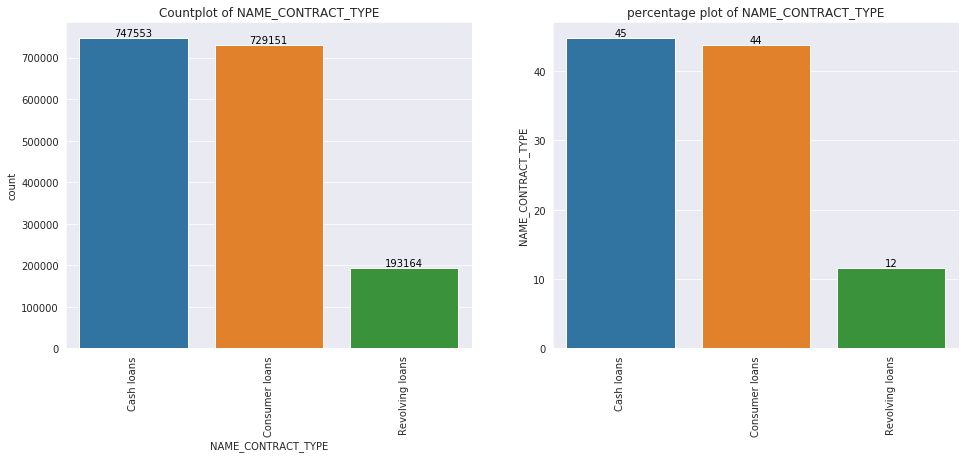

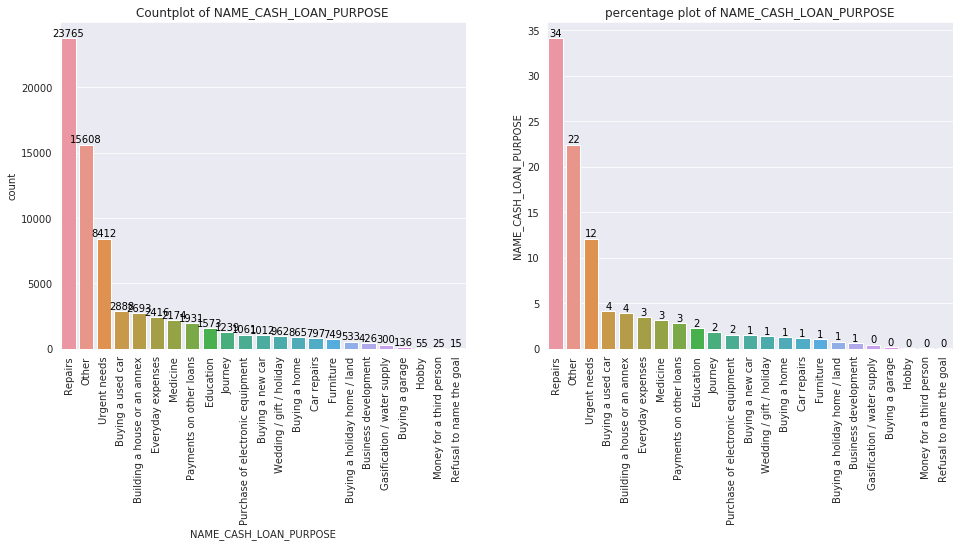

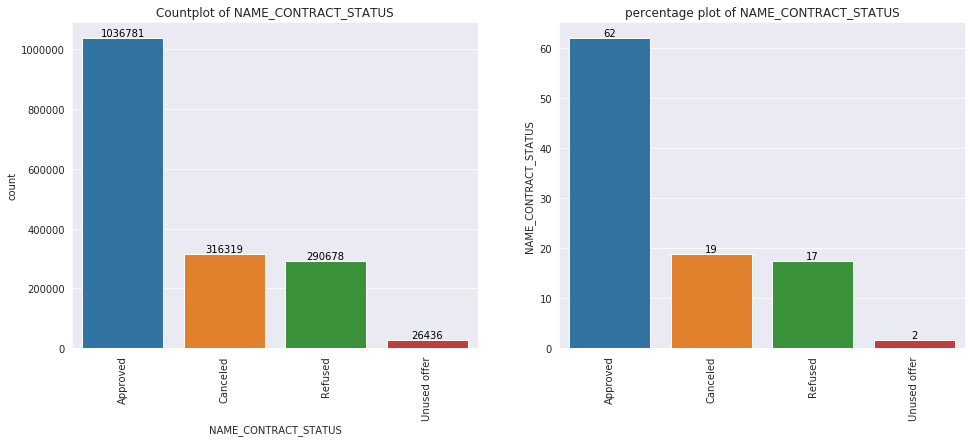

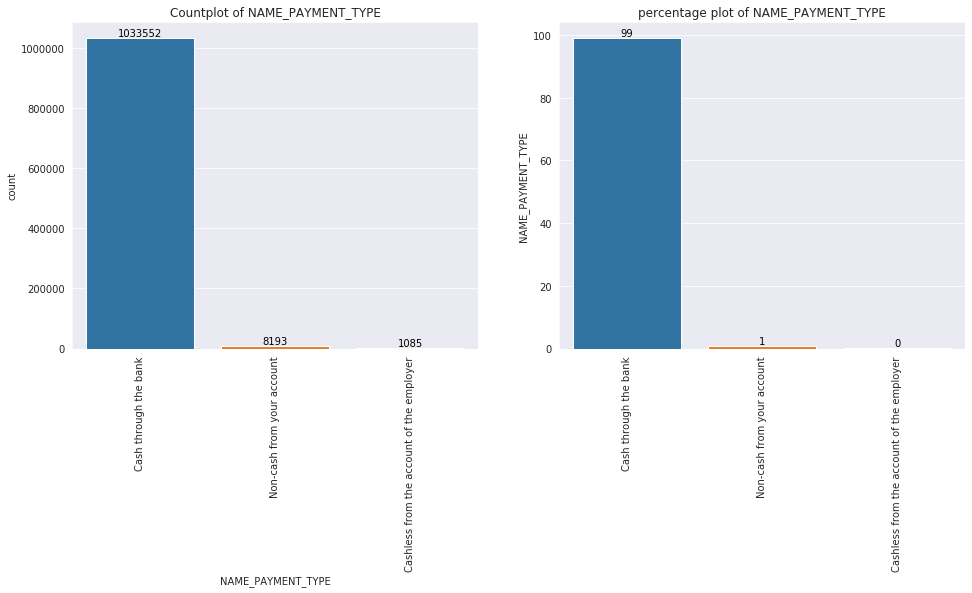

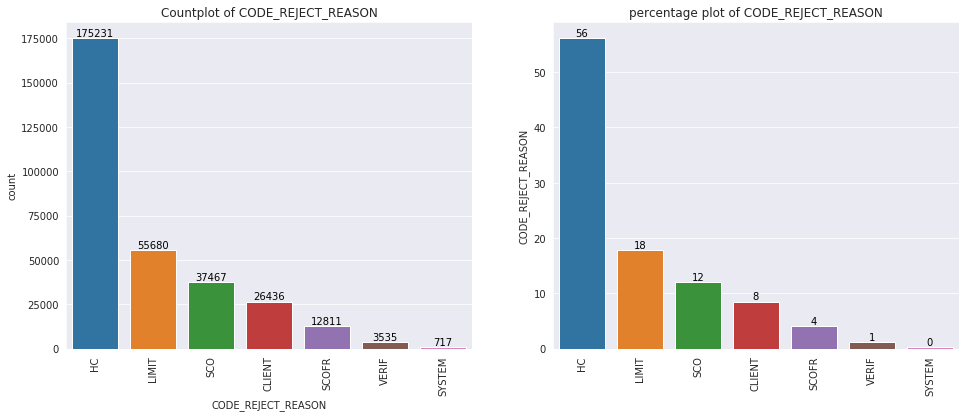

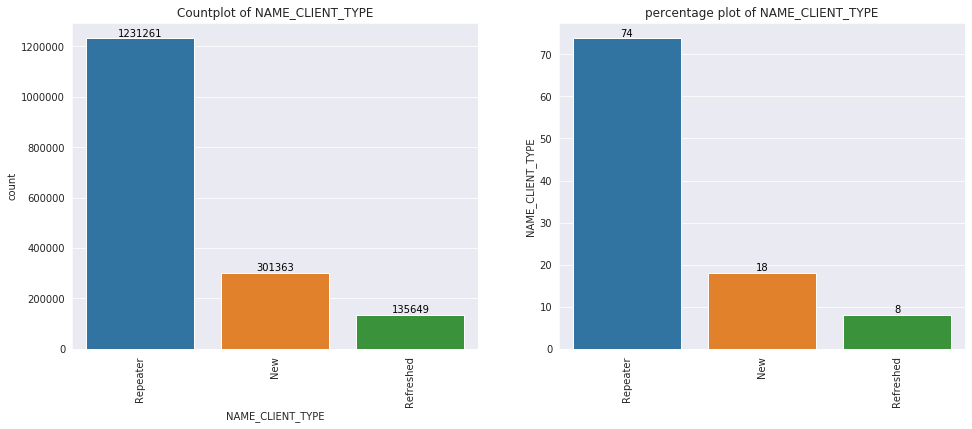

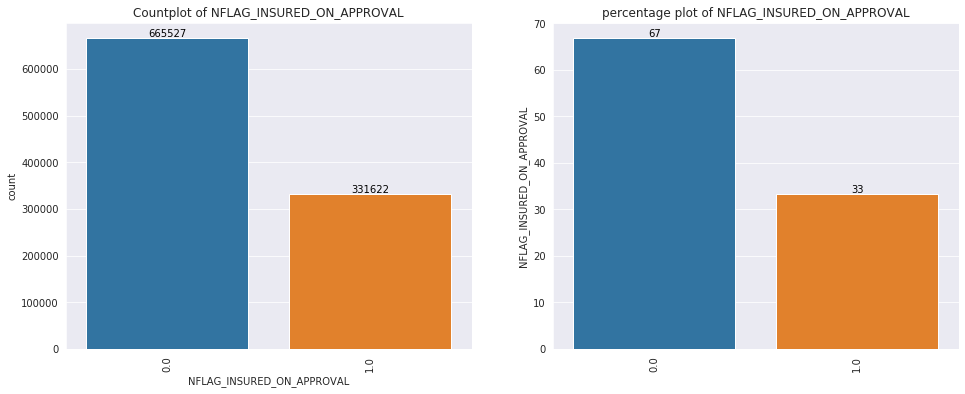

In [74]:
# creating categorical plots for univar_cat_col
for i in range(len(univar_cat_col)):
    countplot(df_pre, i, x =16, y =6)

**Inferences**
1. **Name_Contract_Type**: Cash loans and consumer loans are approx. 45% of total loans where as revolving loans are much lower (12%)
2. **Cash Loan Purpose**: Most of the loan purposes are Repairs(34%), Other(22%) and Urgent needs(12%)
3. **Contract Stauts**: Most of the loans are approved. 62% of the loans are approved, 19% of the loans were cancelled (by customer), 17% of the loan are refused and only 2% of loans are unused offers
4. **Name Payment Type**: Almost all of the applicants (99%) choose the payment method of cash through bank
5. **Rejection Reason**: The main reason for rejection of loans are HC(56%), LIMIT(18%), SCO(12%) and Client(8%)
6. **Name Client Type**:74% of applicants are repeaters, 18% are new applicants and 8% are refreshed
7. **Insurance on Approval**: Around 67% of customers has taken insurance for the loan

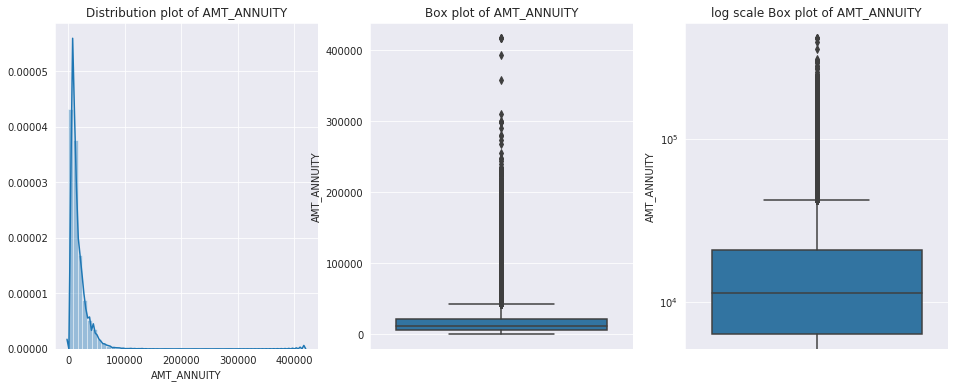

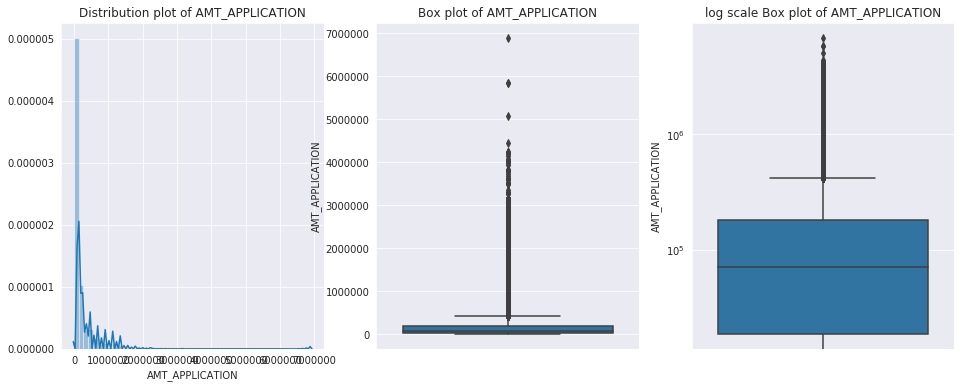

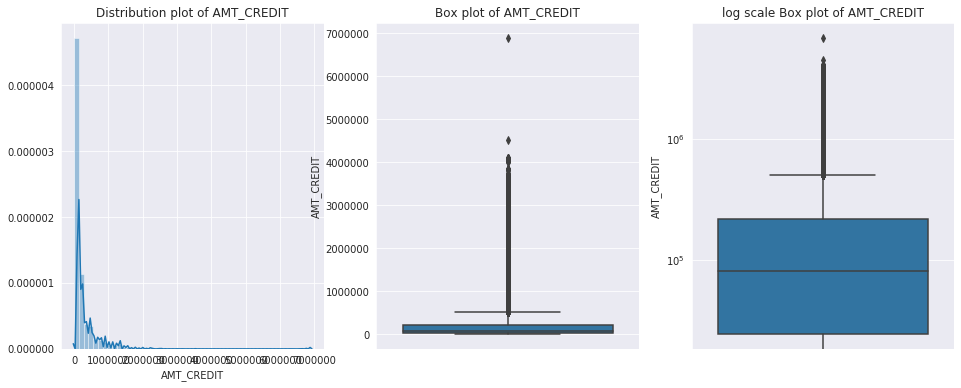

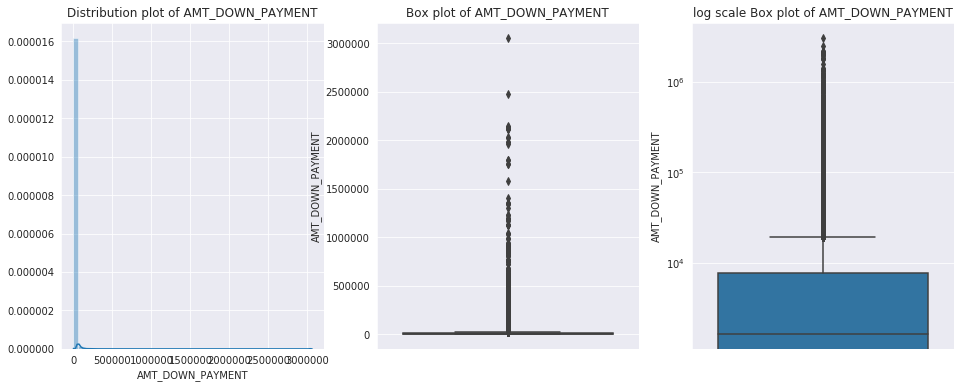

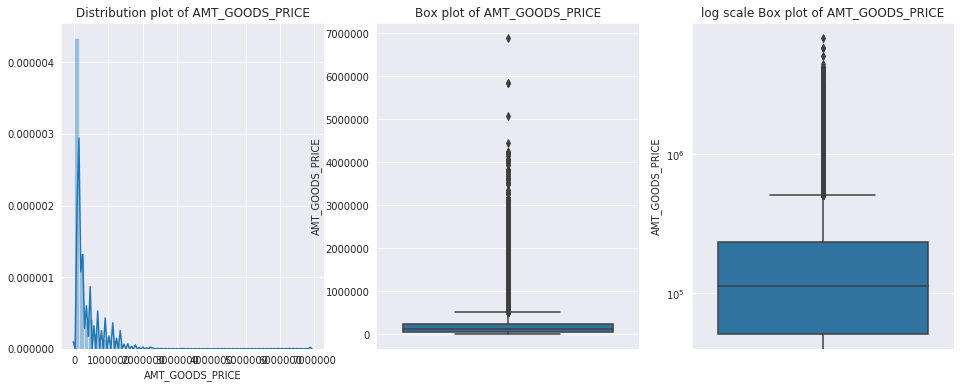

/home/taherkd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


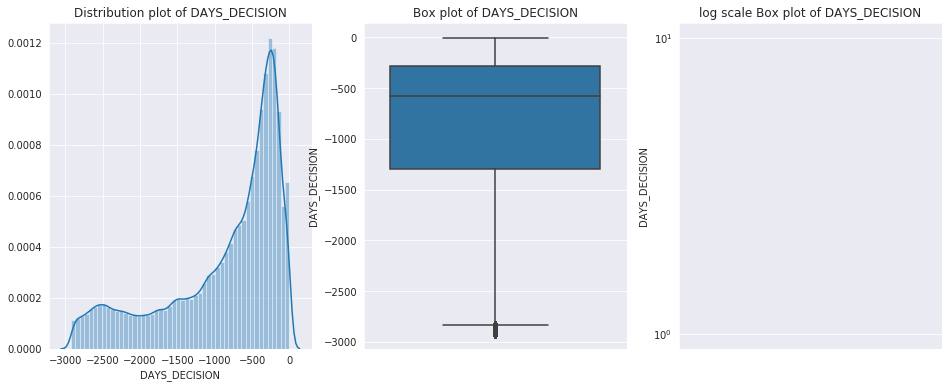

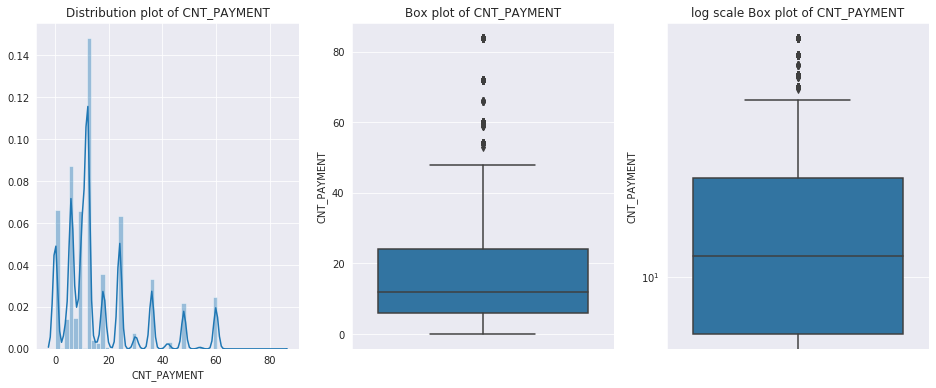

/home/taherkd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


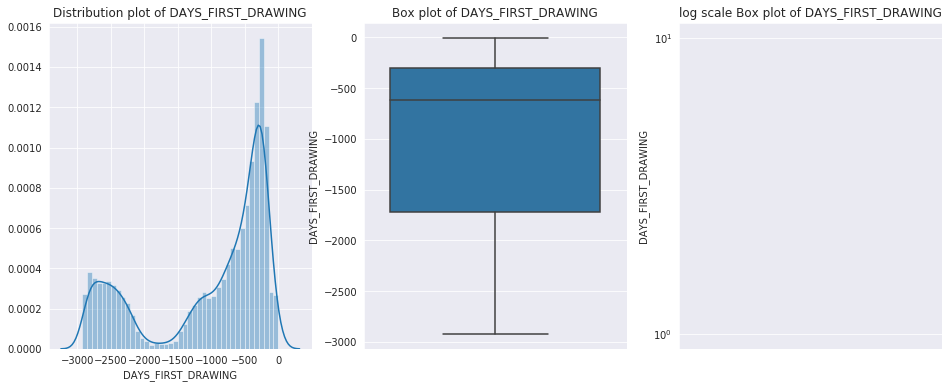

/home/taherkd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


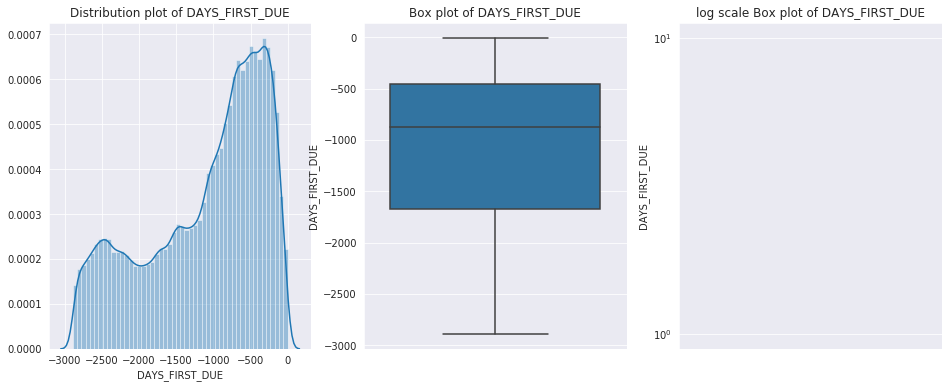

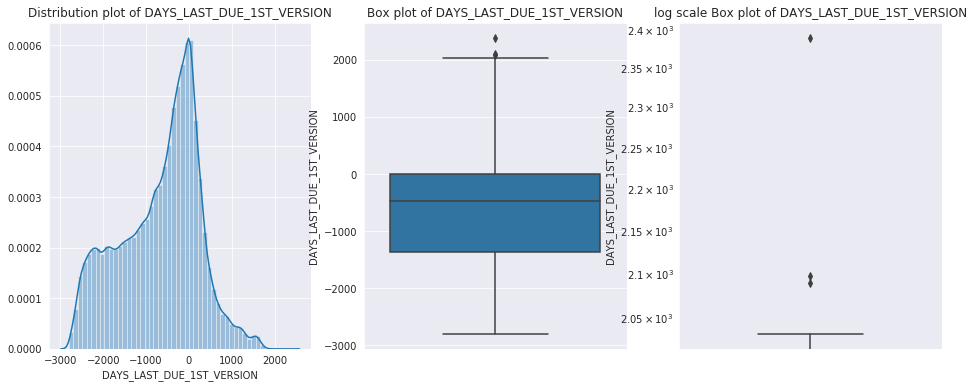

/home/taherkd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


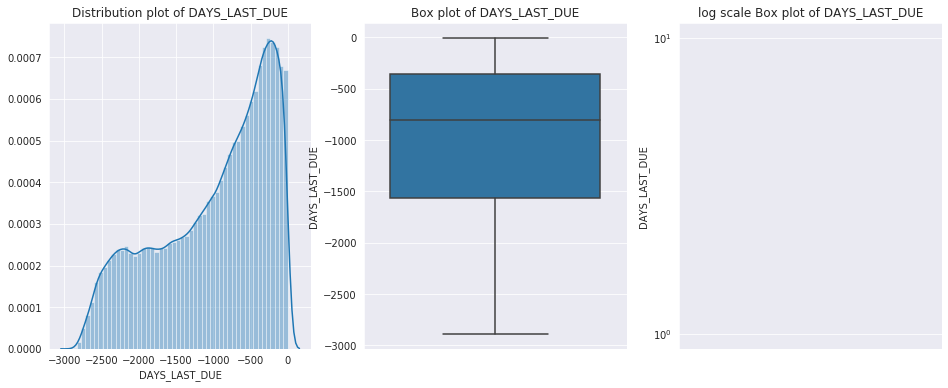

/home/taherkd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


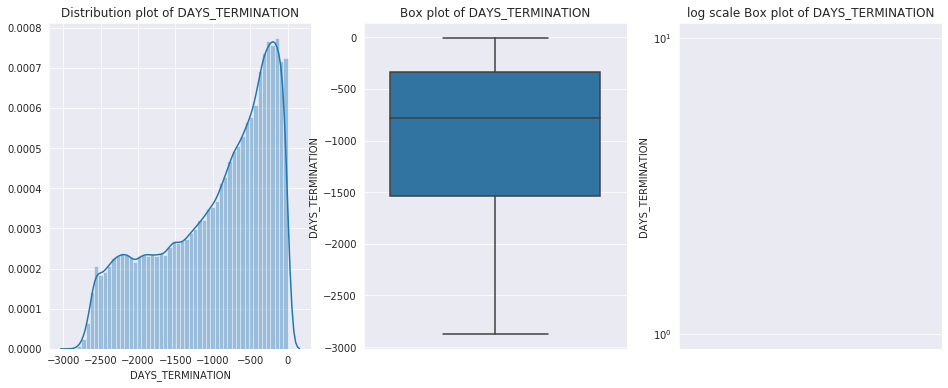

In [75]:
univar_num_col = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','DAYS_DECISION',
                  'CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
                  'DAYS_TERMINATION']
for col in univar_num_col:
    dist_numplot(df_pre, col)

**Inferences**
1. **Amount Annuity**: we observed that the distribution is right skewed and therefore outliers to be removed from this column. we plotted a log scale and it shows the distribution well.
2. **Amount Application**: we observed that the distribution is right skewed and therefore outliers to be removed from this column. we plotted a log scale and it shows the distribution well.
3. **Amount Credit**:  we observed that the distribution is right skewed and therefore outliers to be removed from this column. we plotted a log scale and it shows the distribution well.
4. **Amount Down Payment**: Most of the Applicants have zero Down payment and the distribution indicates the same
5. **Amount Goods Price**:we observed that the distribution is right skewed and therefore outliers to be removed from this column. we plotted a log scale and it shows the distribution well.
6. **Days Decision**:The median value for days_decision column is close to 600.
7. **CNT Payment (loan Tenure)**: The loan tenure is based on years thats why we see spikes in frequency at 12 months, 24 months, 36 months and 60 months
8. **Days first drawing**: The median value is close to 600.
9. **Days last due , days last due 1st version (supposed), days termination**: we observe that almost all the applicants in the previous application has completed loans as there are no positive values for days last due and days termination. Also there are some positive values for days last due first version which means applicants have cleared the loan early

**Step no 4: deriving new variables from the previous application and utilizing them to analyze default rates**


In [76]:
# deriving new columns from previous application

# ratio of credit/goods_price indicates how much loan amount greater than acutal price of goods
df_pre['credit/goods_price'] = df_pre['AMT_CREDIT']/df_pre['AMT_GOODS_PRICE']

# this indicates how many days the loan terminal is delayed than acutal, +ve means delay, -ve means early
df_pre['delayed termination'] =  df_pre['DAYS_LAST_DUE'] - df_pre['DAYS_LAST_DUE_1ST_VERSION']

In [77]:
#function for plotting numerical columns in previous application and combined with target variable
def numdist_plots2(col, df):
    df_def = df.loc[df['TARGET'] == 1, [col]]
    df_def = df_def[df_def[col].notnull()]
    df_ndef = df.loc[df['TARGET'] == 0, [col]]
    df_ndef = df_ndef[df_ndef[col].notnull()]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
    
    # creating distplots for defaults and non defaults
    sns.distplot(df_def[col], ax = ax1, hist = False, kde_kws={"color": "r"},hist_kws={"color": "r"}, label = 'Default')
    sns.distplot(df_ndef[col], ax = ax1, hist = False, kde_kws={"color": "g"},hist_kws={"color": "g"}, label = 'Not Default')
    ax1.set_title('Distribution of {}'.format(col))
    
    sns.boxplot(x="TARGET", y=col, data=df, ax = ax2)
    ax2.set_title('Box plot for TARGET for {}'.format(col))
    ax2.set_xticklabels(('Not Default', 'Default'))
    sns.boxplot(x="TARGET", y=col, data=df, ax = ax3)
    ax3.set_title('log scale Box plot for TARGET for {}'.format(col))
    ax3.set_yscale('log')
    ax3.set_xticklabels(('Not Default', 'Default'))
    plt.show()
    df_q = df_def.quantile([0.25, 0.5, 0.75,0.95])
    df_q.rename(columns = {col: 'default'}, inplace = True)
    df_q ['not default'] = df_ndef.quantile([0.25, 0.5, 0.75,0.95])
    df_q.index.name = 'quartile'
    return df_q

# remove outliers
def remove_outliers(column_trt, QA=0.05, QB = 0.95,df = df_app):
    Q5 = df[column_trt].quantile(QA)
    Q95 = df[column_trt].quantile(QB)
    IQR = Q95 - Q5 
    limit = Q95+2*IQR
    df_mod= df[(df[column_trt] <= limit)]
    df_mod = df_mod[[column_trt,'TARGET']]
    return df_mod

# creating a function for combining mean of previous aplication columns with target variable
def prev_target(col, df_pre, name_col):
    df_temp = round(df_pre.groupby('SK_ID_CURR').mean()[col].to_frame(),2)
    df_temp.reset_index(inplace = True)
    df_temp.rename(columns = {col:name_col}, inplace = True)
    df_target = df_app[['SK_ID_CURR', 'TARGET']]
    df_target = df_target.merge(df_temp, how = 'left', on = 'SK_ID_CURR')
    return df_target

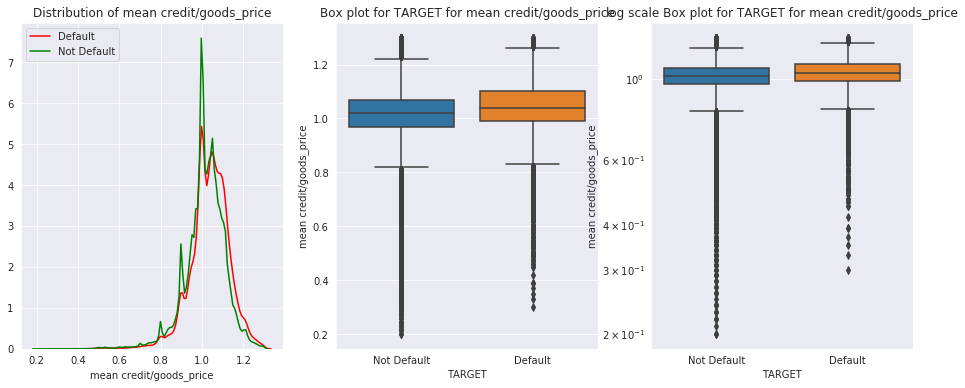

default  not default
quartile                      
0.25         0.99         0.97
0.50         1.04         1.02
0.75         1.10         1.07
0.95         1.18         1.16

In [78]:
# This indicates how much loan is more than actual goods price
col = 'credit/goods_price'
name_col = 'mean credit/goods_price'
df_target = prev_target(col, df_pre, name_col)
df_mod = remove_outliers(name_col, QA=0.25, QB = 0.75,df = df_target)
numdist_plots2(name_col, df_mod)

**Inferences**
1. From the distribution it is evident the q2, q3 and q4 of default are occuring at higher credit/goods_price ratio
2. This indicates as the credit/goods_price ratio increases the default rate increases

/home/taherkd/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


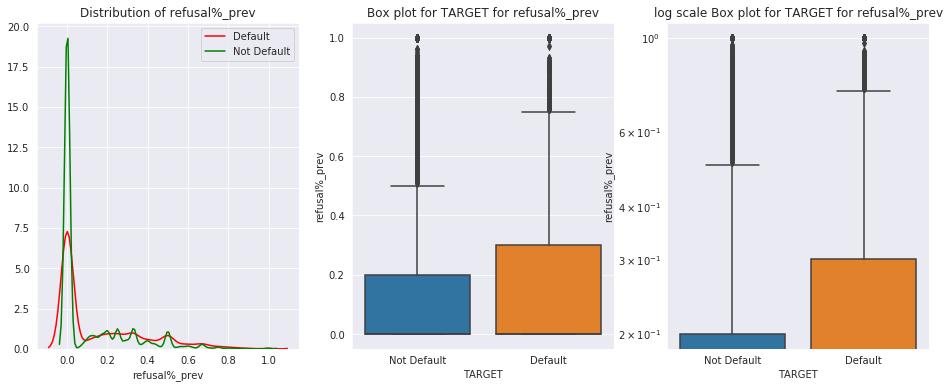

The default rate for applicants who are refused atleast 50% on prev applicatons is 15.93%
The default rate for applicants who are refused atleast 75% on prev applicatons is 17.79%


In [79]:
df_refusal = df_pre[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]
df_refusal.loc[df_refusal['NAME_CONTRACT_STATUS'] != 'Refused', 'NAME_CONTRACT_STATUS'] = 0
df_refusal.loc[df_refusal['NAME_CONTRACT_STATUS'] == 'Refused', 'NAME_CONTRACT_STATUS'] = 1

df_refusal = round(df_refusal.groupby('SK_ID_CURR').mean()['NAME_CONTRACT_STATUS'].to_frame(),2)
df_refusal.rename(columns = {'NAME_CONTRACT_STATUS': 'refusal%_prev'}, inplace = True)
df_refusal.reset_index(inplace = True)
df_target = df_app[['SK_ID_CURR', 'TARGET']]
df_target = df_target.merge(df_refusal, how = 'left', on = 'SK_ID_CURR')

numdist_plots2('refusal%_prev', df_target)

# lets calculate default rate for refusal applicants whose refusal percentage in previous application is greater than 50%

def_50per = df_target.loc[df_target['refusal%_prev'] > 0.5,:]
def_50per = def_50per['TARGET'].sum()/len(def_50per)
print('The default rate for applicants who are refused atleast 50% on prev applicatons is {}%'.format(round(def_50per,4)*100))

def_75per = df_target.loc[df_target['refusal%_prev'] > 0.75,:]
def_75per = def_75per['TARGET'].sum()/len(def_75per)
print('The default rate for applicants who are refused atleast 75% on prev applicatons is {}%'.format(round(def_75per,4)*100))

**Inferences**
1. From the distribution it is evident that applicants who has high rejection % in the previous application are likely to default
2. The default rate for applicants who are refused atleast 50% on prev applicatons is 15.93%
3. The default rate for applicants who are refused atleast 75% on prev applicatons is 17.79%

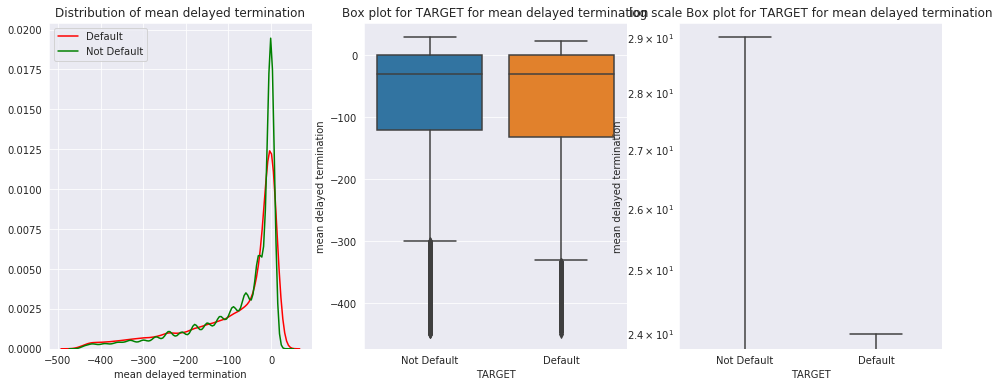

default  not default
quartile                      
0.25       -132.0       -120.0
0.50        -30.0        -30.0
0.75          0.0          0.0
0.95          0.0          0.0

In [80]:
# positive value of delayed_termination means actual got delayed
col = 'delayed termination'
name_col = 'mean delayed termination'
df_target = prev_target(col, df_pre, name_col)
Q25 = df_target[name_col].quantile(0.25)
Q95 = df_target[name_col].quantile(0.75)
IQR = Q95 - Q25 
limit1 = Q95+2*IQR
limit2 = Q25-2*IQR
df_target = df_target[(df_target[name_col] < limit1)]
df_mod = df_target[(df_target[name_col] > limit2)]
numdist_plots2(name_col, df_mod)

**Inferences**
1. Almost all of the applicants are paying the loan amounts before 1st version of due date
2. No impact of default rates and earlier loan completion in previous application

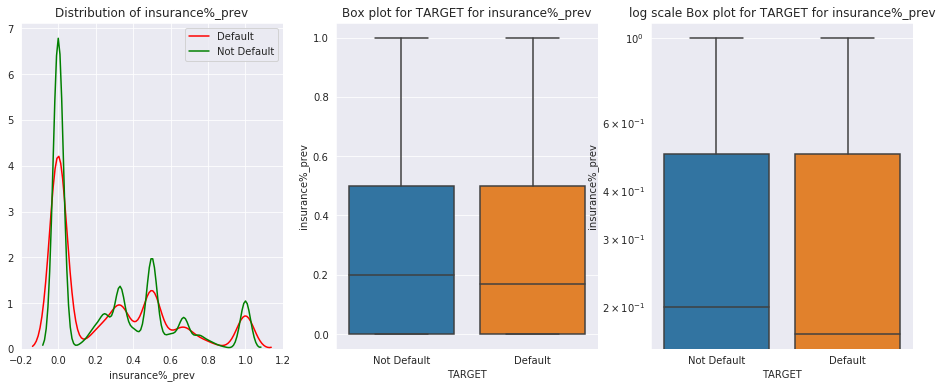

default  not default
quartile                      
0.25         0.00          0.0
0.50         0.17          0.2
0.75         0.50          0.5
0.95         1.00          1.0

In [81]:
col = 'NFLAG_INSURED_ON_APPROVAL'
name_col = 'insurance%_prev'
df_target = prev_target(col, df_pre, name_col)
numdist_plots2(name_col, df_target)

**Inferences**
1. Those who not opted for insurance or who opted for insurance only very few times in the previous application are likely to default more

### V. Statistical evidence using Random Forest Classifier<a id='V'></a>

This case study being an inherent classification problem, it is only intutive to use a classifier to provide statistical evidence of our findings.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [82]:
#lets make a copy of our original dataset
application_data_rf = df_app.copy()

In [83]:
#convert object datatype to str and then use label encoder to convert them into numerical categories

categorical_feats = [
    f for f in application_data_rf.columns if application_data_rf[f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_data_rf[col].values.astype('str')))
    application_data_rf[col] = lb.transform(list(application_data_rf[col].values.astype('str')))
    
application_data_rf.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           0       1                   0            1             0   
1           1       0                   0            0             0   
2           2       0                   1            1             1   
3           3       0                   0            0             0   
4           4       0                   0            1             0   

   FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1          202500.0    406597.5      24700.5   
1                0          270000.0   1293502.5      35698.5   
2                1           67500.0    135000.0       6750.0   
3                1          135000.0    312682.5      29686.5   
4                1          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  ...  AMT_REQ_CREDIT_BUREAU_HOUR  \
0         351000.0  ...                           0   
1        1129500.0  ...                           0   
2         135000.0  ...                           0   
3         297000.0  ...                           5   
4         513000.0  ...                           0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          9                           9   
4                          0                           0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                         24                         11   
4                          0                          0   

   AMT_REQ_CREDIT_BUREAU_YEAR  ANNUITY/INCOME  CREDIT/GOODS_PRICE  \
0                           1        0.121978            1.158397   
1                           0        0.132217            1.145199   
2                           0        0.100000            1.000000   
3                          25        0.219900            1.052803   
4                           0        0.179963            1.000000   

   ANNUITY/GOODS_PRICE  CREDIT/ANNUITY  
0             0.070372       16.461104  
1             0.031606       36.234085  
2             0.050000       20.000000  
3             0.099955       10.532818  
4             0.042623       23.461618  

[5 rows x 94 columns]

Random forest classifier doesnot accept nan values but as it a random forest ensemble approach, it is highly robust towards outliers i.e. it is not effected very much by the presence of outliers. Hence, nan value can be imputed as follows.

In [84]:
application_data_rf.fillna(-999, inplace = True)

In [85]:
# lets fit the features(variables) and labels(target) of our dataset to the random forest classifier model 
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2019)
rf.fit(application_data_rf.drop(['SK_ID_CURR', 'TARGET'],axis=1), application_data_rf.TARGET)
features = application_data_rf.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

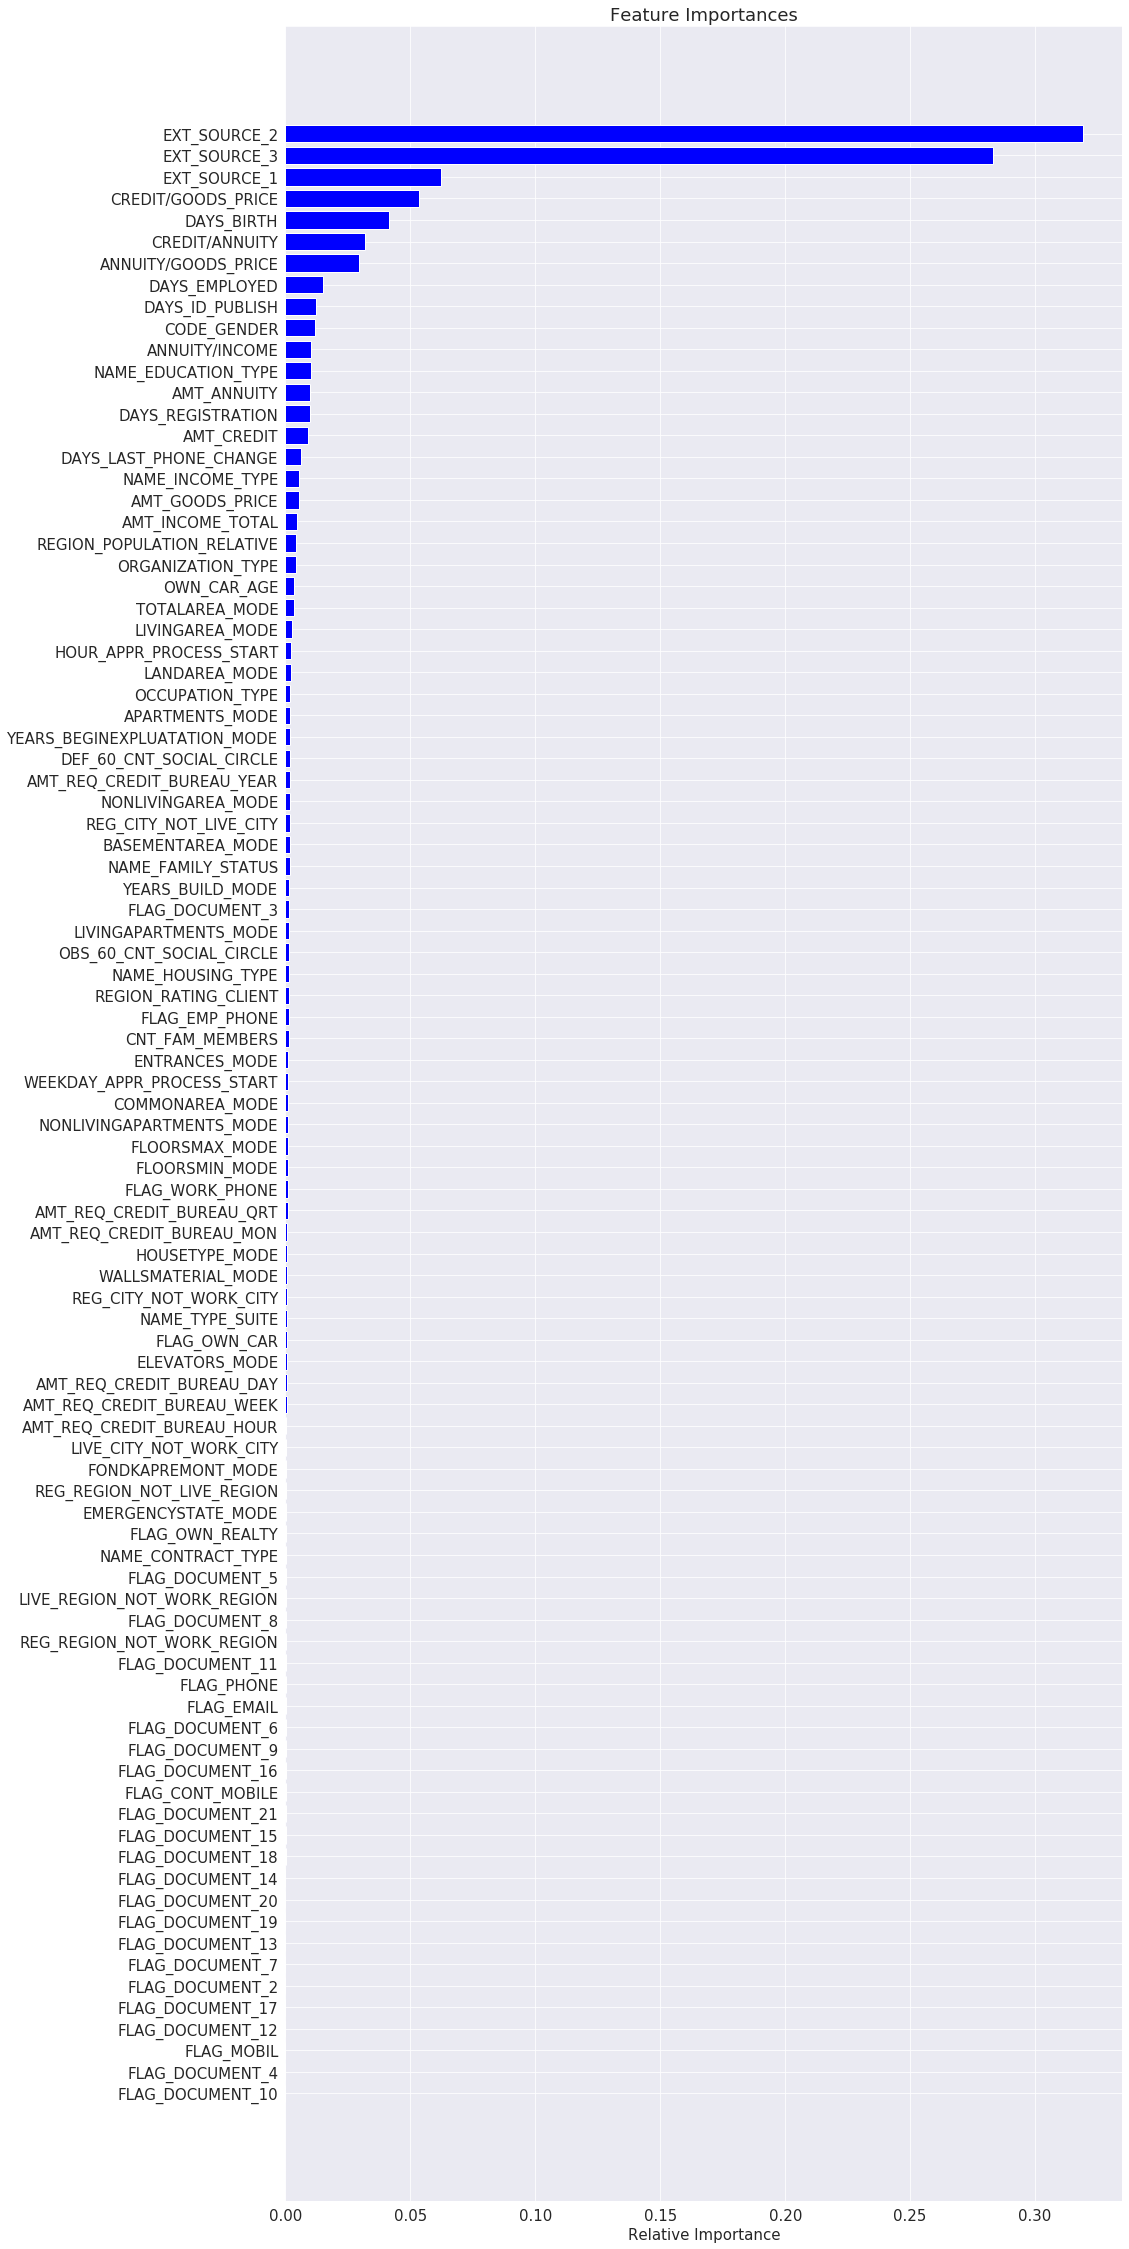

In [86]:
# lets plot the relative importance of each variable as statistically identified by the random forest classifier
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 40))
matplotlib.rcParams.update({'font.size': 15})
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **VI Conclusion: Top Numerical and Categorical columns that can impact default rates**<a id='VI'></a>

**Important Numerical Varibales that Can Effect defaults rate are**
1. EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1: Applicants having low Ext source 2 score are defaulting more and the applicants having high external score are not defaulting more
2. DAYS_BIRTH: Applicants with age less than approx. 15000 days (40 years) are defaulting more where as applicants with age greater than age 40 are defaulting less
3. DAYS_EMPLOYED: Applicants who joined the job recently or having joined the job less than 3 years are defaulting more and the applicants who had joined the job more than 3 years
4. DAYS_PUBLISHED: Default rates are high close for the for applicants who changed the ID below 10 years back
5. CREDIT /ANNUITY(TENURE): Majority of the defaults occurring in low loan tenures
6. CREIDT/GOODS_PRICE: Loans having high credit/Goods price may lead to high defaults
7. REFUSAL%_PREV: The default rate for applicants who are refused at least 50% on prev applications is 16% The default rate for applicants who are refused at least 75% on prev applications is 17.79%

**Important Categorical Varibales that Can Effect defaults rate are**
1. OCCUPATION TYPE: Applicants having low income occupations such as low-skilled laborers, Drivers, barmen staff etc. are having high default rates. High and consistent occupations such as Government staff, Managers, Accountants have low default rates
2. EDUCATION TYPE: As the education of the applicant increases the default rate decreases Lower secondary (10.9%), Secondary(8.9%), Higher Education (5.4%), Academic degree (1.8%)
3. ORGANIZATION TYPE: Industry types of applicants with high default rates (more than 10%)  are Transport (type 3), Industries (type - 8,13,1,3), Restaurant, construction, cleaning, self employed. Industry types of applicants with low default rates are military, security ministries, police, university etc.
4. INCOME TYPE: Maternity leave and unemployed default rates are more than 35% default rate. Out of the income types having good count, pensioners and state servant are having low default rate of 5.5% 
5. GENDER TYPE: Male applicants have high chance to default (default rate - 10%) when compared to female applicants whose default rate is 7%
6. REGION RATING CLIENT: The default rate is directly proportional to rating client i.e as the rating increases default rate increases

**End of Document**